In [1]:
# Here is the function to fetch the data from the github repository. It is useful in particular if 
# data changes regularly, as it allows you to write a small script that you can run whenever you need 
# to fetch the latest data
import os
import tarfile
from six.moves import urllib

In [2]:
# DOWNLOAD_ROOT is the which contains the .tgz file of data (write it as it is)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/" 
# HOUSING_PATH is the path where .tgz file will be downloaded in your system (it can be changed)
HOUSING_PATH = "/home/cipher/aston/datum/O'reilly_handson_ml/chapter_2"
# HOUSING_URL is the download path of the .tgz file (write it as it is)
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [5]:
# Load the data using pandas
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# info() method is useful to get a quick description of data
housing.info()

# Here we can clearly see there are 20640 instances in the dataset, of which total_bedrooms attribute has
# only 20,433 instances meaning 207 instances are missing this feature. Also ocean_proximity attribute type is 
# object & when you look at the top five rows, you probably noticed that the values in ocean_proximity column 
# were repetitive which means that it is a categorical attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Now to find out what categories exist you can use
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Another method describe() shows a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


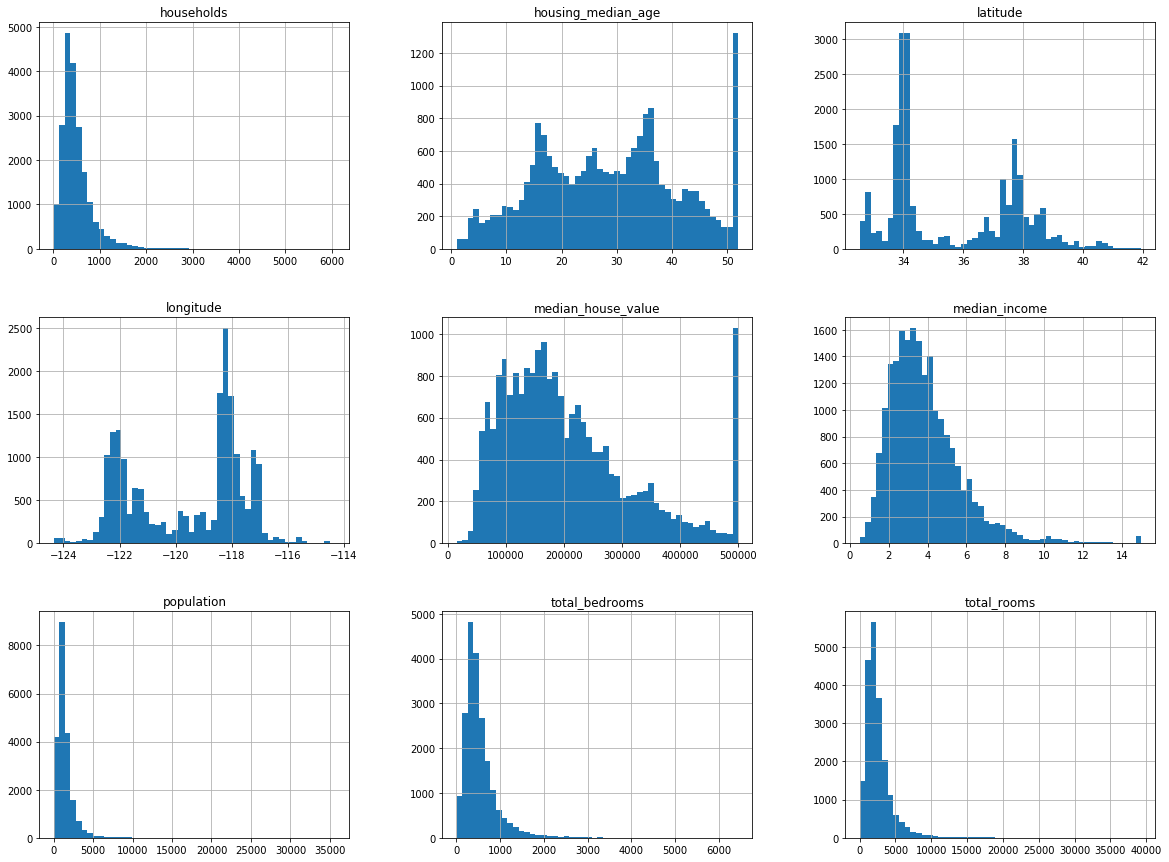

In [11]:
# Another way to get a feel of the type of data you are dealing with is to plot a histogram for each 
# numerical attribute
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# The given dataset should be split into train_set and test_set which are used to train the model and test 
# the model respectively. Scikit-Learn provides train_test_split function to do so.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Here test_size ensures 20% of the dataset is picked up randomly as test_set
# The test_set should be representative of the whole dataset, which is ensured by Scikit-Learn. This is called 
# stratified sampling.

In [13]:
# median_income is a very important attribute to predict median housing prices. We need to ensure that the 
# test_set is representative of the various categories of income in whole dataset. Since median_income is a 
# continuos numerical attribute, you first need to create and income attribute.
# Looking at the median_income histogram we see most median_income values are clustered around $20,000-$50,000,
# but some median_income go far beyond $60,000.
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# This creates an income category attribute by dividing the median_income by 1.5 (to limit the number of 
# income categories), and rounding up using ceil (to have discrete categories), and then merging all the 
# categories greater than 5 into category 5.

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [14]:
# Now to do stratified sampling based on income category is to use Scikit_Learn's StratifiedShuffleSplit class.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# For more information, see Readme.md 
# To see if it worked as expected, you can start by lookig at the income category proportions in full dataset
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [15]:
# Now to remove the income_cat attribute so the data is back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
# Our train data looks like
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


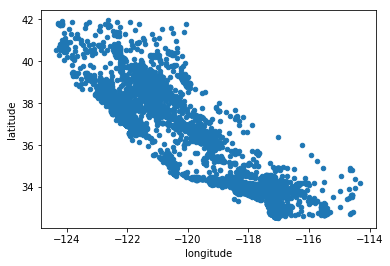

In [17]:
# Let's get into more detail of the dataset but first make a copy of the train dataset.
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

# This looks like California but it is hard to see any pattern.

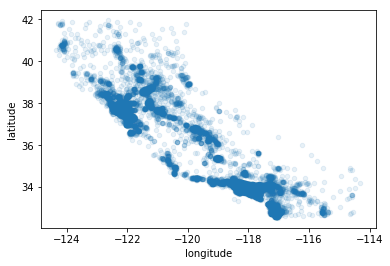

In [18]:
# Setting the alpha option makes it easier to visualize the places where there is high density.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# The alpha blending value, between 0 (transparent) and 1 (opaque).
# You can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego,
# plus a long line of fairly high density in the Central Valley.

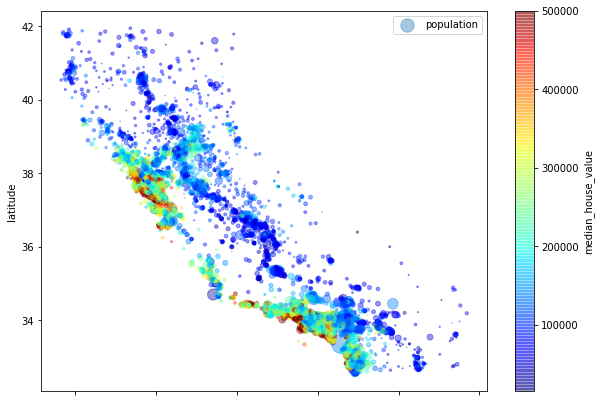

In [19]:
# The radius of each circle represents the district's population (option s), and the color represents the price
# (option c). Here we will use a predefined color map (option cmap) called jet, which ranges from 
# blue (low values) to red (high values).
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, 
              label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
              colorbar=True
             )
plt.legend()

# This image tell you that the housing prices are very much related to the location ad the population density.

In [20]:
# To find out the standard correation coefficient (also called Pearson's r) use
corr_matrix = housing.corr()
corr_matrix["median_house_value"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAGSCAYAAAA//b+TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xd4XNW56P/v2lM1Mxr1ZhXLRXLvFRsbsI0pNqHGhITQQgk5JCEJab97z5Ocdk/uvXnSzskNISHBEDqBmGIwYDA2Nsa44IKrbKtbltU1Gk3d6/fHkm3ZVhnZI1mg9XmeeTTas/dee0Yjzav1rvUuIaVE0zRN0zRNix/jYl+ApmmapmnaF40OsDRN0zRN0+JMB1iapmmapmlxpgMsTdM0TdO0ONMBlqZpmqZpWpzpAEvTNE3TNC3OdIClaZqmadqAEkKUCiF2CyE+FUJs7diWKoR4RwhxqONrSsd2IYT4nRCiRAixSwgxvdN57uzY/5AQ4s5O22d0nL+k41jRUxv9QQdYmqZpmqZdDFdIKadKKWd2fP8TYK2UsghY2/E9wDVAUcftfuAPoIIl4GfAHGA28LNOAdMfOvY9edzVvbQRdzrA0jRN0zRtMLgeWNlxfyVwQ6ftT0plM5AshMgBrgLekVI2SCkbgXeAqzse80opP5KqmvqTZ52rqzbiTgdYmqZpmqYNNAm8LYTYJoS4v2NblpTyGEDH18yO7blARadjKzu29bS9sovtPbURd9b+OnE8paeny8LCwot9GZqmaZo2ILZt21YnpcwYqPbmTZggm3y+uJxrX3n5Z0Cg06bHpJSPnbXbfClltRAiE3hHCLG/h1OKLrbJ89g+oD4XAVZhYSFbt2692JehaZqmaQNCCFE2kO3V1tTwf6+5Ji7nuunppwOdxlV1SUpZ3fG1VgjxCmoM1XEhRI6U8lhHmq+2Y/dKIL/T4XlAdcf2y8/avq5je14X+9NDG3GnU4SapmmapmGJ0603Qgi3ECLx5H1gKbAHeBU4ORPwTmBVx/1XgTs6ZhPOBZo70ntrgKVCiJSOwe1LgTUdj7UKIeZ2zB6846xzddVG3H0uerA0TdM0Tes/do+HgoUL43Oyp5/ubY8s4JWOyglW4Bkp5VtCiE+AF4QQ3wDKgS937L8auBYoAfzA3QBSygYhxL8Bn3Ts969SyoaO+w8CTwAJwJsdN4BfdNNG3OkAS9M0TdOGuLDPR9X69QPSlpTyCDCli+31wOIutkvgn7o511+Av3SxfSswMdY2+oMOsDRN07RuhcNhKisrCQQCve+s9ZnT6SQvLw+bzXZRr0MQW3pPi50OsDRN07RuVVZWkpiYSGFhIR0pHS1OpJTU19dTWVnJiBEjLuq12Dwe8gYuRTgk6ABL0zRN61YgEIg5uIqakooGP2X1bQTCJk6bwfA0N/mpLiyGDs7OJoQgLS2NEydOXOxLIezzcWyAUoRDhQ6wNE3TtB71FlxJKdld2czGw3W0BiLYLAZWQxAxJVuONuBx2pg/Ko3J+ckDdMWfH4OlV1CnCONPB1iapmnaBdlwqI5Nh+vI8DjJS7Gf83h7KMrqPcdoag+zsHjAamfGrLS0lOXLl7Nnz54e99m0aRNf/epXAdi6dStPPvkkv/vd7wbqMvuVzeNhmE4RxpUOsDRN07TztquiiU2H68hN7j4NmGC3kJvsYtPhOlJcNiblff56skpLS3nmmWdOBVgzZ85k5swea2l+roR9Pmp0ijCudKFRTdM07bxETcnGw/VkeJy9jrGyGIIMj5MPS+qJmn1btaS0tJSxY8dy5513MnnyZG655Rb8fj9r165l2rRpTJo0iXvuuYdgMAio1T9+/OMfM3v2bGbPnk1JSQkAd911Fy+99NKp83o8ni7bWrBgAdOnT2f69Ols2rQJgJ/85Cds2LCBqVOn8utf/5p169axfPlyABoaGrjhhhuYPHkyc+fOZdeuXQD8/Oc/55577uHyyy9n5MiRg7q362SKcCAKjQ4V/d6DJYSwAFuBKinlciHE08BMIAxsAR6QUob7+zo0TdO0+Kpo8OMLhMlNccW0f4LdQkNjkIoGP4Xp7j61deDAAR5//HHmz5/PPffcw69+9Sv++Mc/snbtWoqLi7njjjv4wx/+wMMPPwyA1+tly5YtPPnkkzz88MO8/vrrMbWTmZnJO++8g9Pp5NChQ9x2221s3bqVX/ziF/zyl788dZ5169adOuZnP/sZ06ZN4x//+Afvvfced9xxB59++ikA+/fv5/3336e1tZUxY8bw4IMPXvSSDF2xeTxk6xRhXA1EivC7wD7A2/H908DtHfefAe4F/jAA16FpmqbFUVl9G1ZL3xIhVotBWX3fA6z8/Hzmz58PwO23386//du/MWLECIqLiwG48847+f3vf38qwLrttttOff3e974XczvhcJiHHnqITz/9FIvFwsGDB3s95sMPP+Tvf/87AIsWLaK+vp7m5mYAli1bhsPhwOFwkJmZyfHjx8nLy+vpdBdF2OfjhE4RxlW/BlhCiDxgGfAfwPcBpJSrOz2+hTMXZNQ0TdM+JwJhE2sfyy9YDUEgEu1zW32dbdd5/5P3rVYrpmkCauZjKBQ657hf//rXZGVlsXPnTkzTxOl09tqWKjTedfsOh+PUNovFQiQS6dPzGCh6FmH89XcP1m+AHwGJZz8ghLABX0f1cJ1DCHE/cD9AQUFBP17i0Gaaki1bAtTURJg1K4HcXD3vQdO02DhtBpE+jqeKmBKnte8f5eXl5Xz00UdccsklPPvssyxZsoQ//vGPlJSUMHr0aJ566ikuu+yyU/s///zz/OQnP+H555/nkksuAdTYrG3btrFixQpWrVpFOHzu6JTm5mby8vIwDIOVK1cSjapgMDExkdbW1i6vbeHChTz99NP88z//M+vWrSM9PR2v19vlvoOV1eMhU6cI46rfPk2FEMuBWinlNiHE5V3s8v+A9VLKDV0dL6V8DHgMYObMmX37DT5Pra2wdSs4nTBzJgzCNHnc7doV5OWXfXg8Brt3h3jkkRQSEvTcB03Tejc8zc2Wow2979hJJGoyPC22MVudjRs3jpUrV/LAAw9QVFTEb3/7W+bOncuXv/xlIpEIs2bN4pvf/Oap/YPBIHPmzME0TZ599lkA7rvvPq6//npmz57N4sWLcbvPTVN+61vf4uabb+bFF1/kiiuuOLXP5MmTsVqtTJkyhbvuuotp06adOubnP/85d999N5MnT8blcrFy5co+P7+LLerzUa9ThHEluurajMuJhfhPVA9VBHCixmC9LKW8XQjxM2AacJOU0uztXDNnzpRbt27tl+vs7Pe/h+pqiERg4UJYtqzfm7zo3n+/jbVr28nLs1JeHuGRR1JITe3/juK2tihCgMulO6U1bTDbt28f48aN6/KxqCl5bP0R7BaDBHvvv8vtoSihqMn9C0f2qbJ7LHWqOissLGTr1q2kp6fH3MbF1NVrLITYJqUcsDoQ49PS5NPXXBOXc01/+ukBvfbBqt96sKSUPwV+CtDRg/VIR3B1L3AVsDiW4GqgRKNw7Bjk5EBzC5SXx3ZcWwCe+RBqGuH6WTC5MH7XFIlItm41aWqCKVMMcnLiX/F32jQnO3aEqKiIMG+ek5SUnnuvpJR88EGYjz4K43YLbrjBQUFB7EFSNCpZtaqebdt8CCGYPdvD8uWpGHoZDU373LEYgvmj0li951iPdbBABWMnfAGWTcrRy+YMQlaPhzSdIoyrizHg5lGgDPioYxDgy1LKfx3ICzjeAM+9C/XNsHAqLJ4JUoInC55/U92/dDEcrYYRw3o+155yOFwDOSnwypb4Blhr1kRZv94kIUGwebPJd75jJTU1vn+YkpMtfPe7yQSDEper99Tg7t0R3nwzSF6eQXu7yRNPtPP977vweGJLK27d6mPLllYKC9XA0U2bWsnLczB9+rn1aDRNG/wm5yfT1B4+Vcm9q56s9lCUE74A80aln1eR0cLCwph7r0D1eGl9E/X5aNIpwrgakABLSrkOWNdx/6KPon56DRytALsFVn0Aw7PhSDUc9cPESyEjBRI98JfX4aFbICu1+3Mlu0ECxxphRNaFXVdTU5SGBpPsbAsul8G+fZLcXIHTKSgvN6mtlXEPsAAsFoHLFdt5KyqiuN0Ch0PdKiqiNDVJuqjX16WqqhCJidZTPVZut0F1dVAHWJr2ObawOIPkBBsbD9fT0BjE2mktwkjUxOO0sWxSzueygvtQogdsxNdFD3YGmpTw0Q5oagCbBVoDsMojefQlaGiGJK+goBgWzwKrAZ/sheWXdn++Mblw9xXQ6INJFzDZsaoqwp/+1EwkIvF6DR58MJniYsGmTSYulwqCMjIufrd6bq6F9evDhMOS9naJxSJITo79unJybGzZEiUtTb312tpMsrPPXbusM78/ymuvNXD4cICRI5186UupQ2bsVigkKSkJk55uITNzaDxnbfCRUvZaJmFyfjITcpOoaPBTVt9GIGLitFoYnuYiP7Xn9OFQ1l/joPvK6vGQolOEcTXkAizTBEsIDBtIAU2Nkv/zv0waPQLhhLYWSfNngmEZgmlFUNfU+znH5l74dW3fHkAIKCiwUVoa5ujRMNdcYyc1VdDQIJk+3UJaWnz+QO3Yq4LMghxYeikEApIPPgji80XIz7cyd64Dq7XrtiZPtlJXZ2fjRjUG6847nTGnBwFmzUqkoiLEzp1tAMye7WHatJ57r1avbmT3bj85OTZ27/ZjGIIVKz4fg1cv1OrVfjZtCuJ2C773vSS8Xj3DUxtYTqeT+vp60tLSeg2yLIagMN3d5yKiQ5WUkvr6+phqbfW3qM9Hi04RxtWQC7AsFpg2Ck40g2GBbW+btNQJookgo2AEoTUCO3dDYQ7Mmzww15WRYcHvN2lujiIleL0GNpvg0kvPr9ciGJQIAXb7mX8Qa07Ai29CahJs2CrZ+nGI559uo7kpypgxBrNmhKiqinDrrV0HPYYhWLLEwZIlji4f743VqoKjq65KRgjwent/C5aVBcnIsGGzGWRl2SgtDZxX259Hfr/EMCAUUpMeNG2g5eXlUVlZyYkTJy72pXwhOZ3OQVHZXRcajb8hF2AB3PFlePZlqKyGiA8cdoi2Q8QDpgE2qyQYFlgkTCsemGuaNcuJ329SWhrhiitcFBaeXxEuKSXvvhvmgw8iCAGXX25j8eLT5/K3AxK8Hig5GObVNWFqjkWw2wW798DkSYKNG8MsXmySnt5/vSVJSbG/9YqKnGze7CMjw8qJE2Fmzz6nbu0X1vLlLrKyDPLyrANSPkPTzmaz2RgxYsTFvgytn1k8HpJ0ijCuhmSAlZMN3/8WtLXBGy/BiVqwNkPEAMMJWRmC8Vnw9aXgThiYa7JYBIsWXXi3ekmJybvvRigsVD1X77wTprDQYNQo9eGcnwOjh8PhCmhpjJCSJDheBU6noLkFPv5YYjHg0UfhoYcguZcxqaYpaW2VuFwCm61/xlhcfXUKFovgyJEA8+d7WbJk8A+UDYclFgsXXH7C6zVYvLjvRRk1TdP6Iurz4dMpwrgakgHWSW43PPywwa9+bdLeBu1+yMuEBWMFl10CRSMv9hX2XXOzxGqVWDoWYLVYJC0tp1NLNhvceRM0NsMnWwxeey1IzTE79fUhnA6Tdr+Vyy930d5usG8fdKww0aVIRPLMM0EOHDBJShLcc4+jX3q97HaDZct6mMo5iBw9GuStt1qorAzjcMC8eR4WLvRgt+uxU5qmDV4C0H+l4mtIB1gA990rGDfO4LPPID8Pxo5VvTl5eWB8Dt9t2dkGUgpaWyUnJ6dkZZ35RCwWSE+FKy53sHt/lNxaQWKjlZwUk5xEJ7m5NurrISmp57bKykz27TMZMcKgqspk8+YIy5f3PCPwi6y0NMif/lRHUpKF4cPthEIm773XyrFjYW6/PbXPi9VqmqYNFMPjIVGnCONqyAdYVitcfpng8st637e/RCKSjRtNGhokCxZYSE8//w/ivDyDr33Nztq1ahHTr3/dzrBhXUeKTqcgKc/FwgWStCSobTaYNhza6mH+fOhmdYxTHA4BSPx+SShEzLW0vqjefrsFr9dCSor6tbLbDYYPt7N3b4CqqjB5eUM3+NQ0bXAzfT78OkUYV0M+wDpfoZBKt8WjU2LHDpM33oiSkCCoqIjwne9c2CrTEyZYmTAhth+tzaaKjLrdIJph6hQYUxhbO3l5BtddZ+ejjyLMmGFh3ryh+3YyTUlZWYiCgjODKCEEhgG1tREdYGmaNmjpWYTxN3Q/Ec+T3w/PPQeHD0NGBtx+O1zoeqLhsArUHA4IDHAFgmvnw8rXoLwGpo6F0fl9O37ePBvz5l1YQDiYBQJR9u9vxeOxMnp09/W6DEPgchkEgxKn88yoW0pISBjavXuapg1+OsCKLx1g9dEHH8CRIzB8OBw/Dq+8Avfdd2HnnD7d4NgxSV2d5NprL/wtbpoqEExIUOOtepKdDo/cAcEQuAZoxuTnyQsvVLJnTwtCwN13D2fsWG+3+y5c6GH16maGD3ecmj3Y3BzF7TYYOfL86oZpmqYNBIvHg0uPwYorHWD1UV0dp9bdS05W318op1Nw883x+VHU18NTz6rrcrng9tugoJdeKYtlcAVX9fVBEhIsuFwX/+1ZUdFObm4Cx48HqKsL9bjvJZd4qKmJsGOHHyE6FhD3GNx5ZxoOx+dwxoSmaUOG6fMR1GOw4urif4J9zkyfDp99plJ57e2wdOnFvqIzPf8S+HyQky0pORzlN/8l+MW/W7Cfx/CfSEQ9T5dr4GZU+nwRfvObEgoL3XzjG4UD02gPli3L5uWXq8nKcjJpUs/TKq1WwZe/nMLChR6OHw/jdBoUFtp1iQZN0wY9PQYr/nSA1UcTJsC996o0YXY2TJx4sa/oNNOE6mOq3MQnW0JUlEdpbZXs3u1kxoy+/eqUl8NTT6kgMi9PjTXz9LxkYFwkJFiYPTuFYcMGR5fa1KnJTJ6chBDEXGYhK8tGVtYXd1yapmlfPMLjwaFThHGlA6zzMHq0ug02hqGCq+PHobnZxLCA1SYwzb6tYWea8Le/qUH3GRlQUQHvvAPTZ0T56xNtCBlm2TI3aXlO9leA3QYzRkNyHAIwi0Vw3XXDLvxEcXSh1djPRzBo8sknAQIBk1mzEkhK0v9baprWf6TPR2SDThHGkw6wvmBW3AzPPA/pWTba28PccpPBpEl9+3AOhaDNf3p2ZFIS1NbC//xZmMNHrBSPNnjsmXY8xXaSEw1CUdhyEB68Nj5BlgarVrWyfXsAq1Wwe3eQb387FatVz0TUNK1/CNH7pCitb3SA1Y1IRPLBBxFaW2HRIite7+fjwy0lBf7pmxAMWrHbredVp8vphOIiOHgQvF5oaFSFR9euB0MIJILDLTau8EJmijqm/ATsOAJXTD59nmBQrVPo8YhzShd80ZkmfPSR6v2bMQOKivp2fElJmLw8G3a7oKwsjN9v4vXqv36apvUP4fFgWxCnFOFKnSIEHWB1a/9+kzVrolgs6sPyppu6HlMTjUp8vgher3VQLYXiuMCqALfeqkpS1NbCokUwcyb8S4qVx/7Uht0apjHk5Y3XDZAw/xJITINg+PTxlZUmTz4Zor1dXcsdd9gpKLj4g70DAUlbm0lKitGvqb/t2+HVV1Xv32efwcMPQ1pa7MdPn+7k/ffbEEJQVGTD47n4r52maV9gPh/mRp0ijCcdYHXD6RQIIYlEuh/cLaXkqacqOHCgjQULUrn22qwzHg8GJevXRwgEYOFCK0lJgycA643TCVddBVETyhqhtAHGFFv51S+9HC6DxbcIWpohLRdeeQ0WXwVjl5w+/rnnwthsgvR0QUuL5JlnQvz4x46LGoQePx7l8cfb8PkkU6fauOWWhH4LshoaVGCZng6lpWpmZ18CrKVL3YwcaSMchqIi+0UZB6Zp2hAiwKL/j4srHWB1Y/Rog/vuc+D3S8aP7/pdFwyaHDrURlKSlV27Ws4JsDZsiLB2bQSrVVBfL7nrrvgulVJeblJebpKbazBiRPx/M0wTntsOe2rU99Py4MtTBB9vhYgPUj0QbAJrOkzOg8KOpx+NShobJQUFKijwegVlZWq9wgvtWbsQ27eHCAYlw4cbfPppmMWLHaSl9U/abepU2LoVyspg1CjIze3b8YYhKC7WxUk1TRsYwuPBcmmcUoSP6xQh6ACrR6NH9xy0OJ0Wrr02i23bmliyJOOcxwMBVRspIQH8/r7N5OtNaanJY4+FsFhUvap77rFRVBTfYKHeD3uPQ2EqSGBnFSwdA4XDVW2sSBDSMiSp2TBn4ukeFotFUFxsUFJikpkJJ05IRowwOhaHvngyMw0CAUl1tYnHI3C7++/ftcxM+N73oLVV9VzpwaOapg1qPh98pFOE8aQDrAs0f34q8+endvnYwoVW6uslfj/ccEN8X+ojR6LYbJCba1BTY1JSYsY9wHJY1cySYFRVJbcYYLfA3Onwwx/BS6+G2berjUCzyeq/25g21nNqptstt9h4440IpaUm48dbWL784r/Vpk1TPYi1tSbTp9v7feB9QoK6aZqmDXpi4ApKDxUX/1PvC8zrFdx5Z3zTgifl5RkEg1Fqa03a2iAvL/7BgtcJt0yBVXvAEPCVaeCyq4HiEwtCvCt9FKQKhmUL1qwJMnOmwbJlbgDcbsGKFYOr2KZhCGbM0Gk3TdO0c7g9cEmcUoSP6hQh6ACrV1JyXqUO+ltxsYXbb5eUlEhGjhRMnNhPY4lyYUpH3c+Tr0NpaYSnn27DaZN43QatLZCfb2HPnjDLlvXLZWiapmn9qc0HH+sUYTzpAKsHmw/BW7vBZoEbZ8D4vPM/l2nKuM8EmzjRekFL9bT5YdM2KCqEwh4WhD47wCwutnLnnW5eeaWNMWMMAgGB3W7i9Q58//LxE1BdA+mpkN/HgeSapmlaB70YYdzpAKsbVQ2wagfkpqhSBc9uhkeuhSRX78f6fFGqqyN4vQYOh4Wnnw5QUxNl3jw711xjHzT1snbvh5fegKIR8MgDsR9nGIKZM+0cORJm584QFosgGoXly2N4ceKoshr++JT6+SDh9ltgfPGFnVNKyYYNYerqTK680k5ioh6UoGnaEOD2wNw4pQj/S6cIQQdY3WoNqHFH9o5XSAK+QO8BVnNzlEcfrae1NYppQmqqG59PkJtrsGFDiHHjrIwYMTj+TRhdCLOmwJTxfT/WMAQrVriZNctBICAZNsxCSsrAPq+9B9XsvPxcVW1+266+BVjHj4cJhSR5ebZTQW9Njcnq1UFMU5KcLFi0SI/Z0jRtCGjzwRadIownHWB1wykg0AZlUs2sSHFBemLvxx06FKSpKcqIEXZaWqLs3h2gqMh1anZGNBrfcg0XIj0V7r3t/I83DMGoURdvIHtqCrQHoK4eyithfB+Wo9m928+zzzYiJSxY4OHaa5MASE42yMoyOup46d4rTdOGEP0nL650gNVJTQ2sXw++djhQB6aERuDaRbBgLDhiiCVcLoNo9OQSOiazZ9tpaRGUl5tMnGilsHBw9F59EUybCPsOwJPPQpIb9u2ExQvA7e792E8/bcfrtZCYaOGTT9pOBVgJCYJvf9tFKAQu1+BI5WqapvU7twdmxylFiE4Rgg6wTgkE4C9/gWgU9hyEE+2QMh7qmmFRK3hjrGc0dqyDyy5z8fHH7eTm2rj11iTcboP2dkliokAIQWk5rHoTCnLhuqvBqn8K58ViUb2Kl06FnBwoL4eqKiiOIU04bpyTvXsDNDdHmT37zIjMahX6Z6Jp2tDi98E2nSKMJ/0x0qG1FdraYPhwaGyHD9fAiCxwOWDjfpg4Esb2MNPuJMMQLFuWxLJlSWdst9lO94a8vkaluzdvhckTYNSI0/tJKSkvlwwbJs445ouovd2krCxMdraV5OTz69kbNgz8ftX7KAxI7brm6zlmznSTmWkjFDIZMWLgxlm1tkbYu7eNESMSyMzsnxppmqZpfaZnEcadDrA6pKRAXh4cPQr79kJdHTS+DcMnQHouVDfEFmDFoiAPPtoCrgRIPjMOo7ERnn46yg03WBg/Pr4B1mCr6bVyZROlpWGSkiw8/HAqCQl9HwAwebJaM7G6GiZOVIsrx6qgYOADnDffrGPz5hZycuz88IeFA96+pmlal1wemKlThPGkA6wOVivcfTds3w5/fg5CYRB+OLAZasOQVQjHj8Elk6FwGARD8MI6OFYPt1wGI4fF3taypTBxnAquUlPOfCw1VXDXXVYyM+P33ExTlWPYuQ8umwtL4/U7dAGklNTURElJsdDcbNLeLrtdVubECZOXXzbx+yXXX28wcuTpf7OEgGnT1O3zID3dhs0myMrSvVeapg0ifh9s1ynCeNJzBjqxWiWHSoL4fQEsbSYS1evTVgHvfADbP4NfPgGtPjhyDD4rhYgJb2/tWztVVdDSpMpAdGXYMHFqTb94OH4CPt0Ledmw7iNVYDQe/H71+pwPIQRf+YqXpCQLy5Z5SE09t286EJD8/vc+lixp5Xe/a2f37ghPPRXFNAfPTMy+uuKKVH74w+F89avZF/tSNE3TzmTE6aYBugfrDGvWBPhkSxCv06DGb0CiFVINwk6o3AsfHldB0TMvwU03gMsJrX6YMzb2Ng4cgCeeUD0viYnw7W+Dx9O36zRNaGmFRI8a6N2bJC94E6GiGoZlg7MPQ46khPLj6nrzM0+nGHfugueeh9mz4MYb+nb9J40d62Ds2O4vZv36AI8+GuZ4rQVDmOzcGQXEeQd1g4EQgvR03Xuladog4/bAdJ0ijCcdYHWyf3+YoiILt9wo+O9VQAJggmmFIOr2pVmq5pLHAd+9SZV0GNaHcT8HD4LLBVlZUFEBtbV9C7DCYXjyOThcCiOHw523ga2X8hGuBPjW1+F4HeTlxBaUnbT6Y/hwt7q/eDosmaHuNzaqmZe1tbGfq68OHJA0NUHuMElFhSAYlIwdK7FYuu7dq61TXzP78PPY/Rn8/RUYUQi3rQC7jn00TRuK/D74VKcI42nIB1imKdm5s51wGKQ0+PXvJC0+AalSvToGUASEwTChvRWKR4HTCQkCkvrY+zRqFGzcqAbTezyQkdG342tPqOCqMB+OlMHxWsg7aw26OOlcAAAgAElEQVS+5haoa4SkRFVMFFQPljeGQqln27wXCrJU+YrNe08HWPPnQXaWmsXXX+bOtWO1BWlujpKcIpgzx8a8eV2/Zd/fBO9sUPevvgwWzo2tjXfXqp/D/gNQVa0CLU3TtCFJzyKMqyEfYH36aTvPPtvEe+852f6pC4QVkNBmwCgDpoKwQ4IBBZNh/CT4yoLzn403fjw88AA0NKgU4aFDMG4c3Q7wPltKskr5lVaogOnsQfKfHYQ/Pa/Sl0LAzVfD9E4LQpsmp6rKx2LUMDhQoVKFU0ad3m6zwdg+pEa709IiOXDAxOUSjBsnzlgQe9YsK7/9bSIrVwZJSxVcf72VuXPPfctKqQKsvGx1/71NsQdYE8bDuvVqFmlGH3q+NE3TvlBcHpiqU4TxNOQDrEBAcviwhe3bHZBgBZeAdsAU0Ao5AYi6YO5kmDUR8ILjAssmjRihbv/3l6rX5MolsOzac/fbtw82fQRLFqv6XKDSiw/eDdU1ajyVq9PaiA1N8KP/rVJ32ZkwYTT89e8wsVil8p55BlpaYM4cWLas60ArGIRjx1QKMyEBbr0Cth9SwdqMTkvRRCKqNEJaWmyV07sSCEj+9KcIdXWSaBSWLLGwdOmZ/0J96TorX7qu57epEJCTBceOqzUj83Niv4YrF8O0KaoXK9YgV9M07Qun3Qe7dIownoZ8gDVmbAIHjoTAbsJUVEowbMBBIAqTx8PhANT54a3t8MOr4td2Xp5apLi7kgxvvKmCHSHgnrtPb/d61e1s5dXQ2gbJiVBzAupboakVdh6Eta+rsVd5efDhhyrAmzjxzONNU1Wzr6iA7Gz41rcgwQHzJ6oU4dEyFRS5EiRPPCsoOSQYXQj/349VyrSv6uvVWK4RI1Sl+927zXMCrFh99XpY/7EKGhfMjv04IfqeptU0TftC0jMA42rIBlimCVu2wPpNBobFii3HIOwGWiS4BaQYOD0wIhdG2QGrSk/vK4NlE+JTsPPWFbB8mUoVduWyhfDBergkxnRXRipEwrBttwqM0tIhOwfcCapSfUGBum6bDZqazj0+EoHKShVw1NRAe7u6NinhxX/Aex9E+GRLmDaLpK3ZyrBhFsprLawog4lj+v78U1JUD1xVlcTvl1xyyfn/did54borz/twTdO0oc3lgSk6RRhPQzbA+mgzrHoV2oNgWJ0UZgUoMUxkqhXsBs48GDMSWgIwvxCsHR0rZXUQjoK9m1cuEIaSBnBYYXRqz4GYYXQfXAHMmqlusRLA7AkwsQiaWyEzDf7HdyA7HSZNgk8/VelNw4DRo8893m6HL30JNmyAq646fW2Hy+DlNVE+eLOd+uMhokYEm0sQiroZNzuB5z802FkJCyepUg6xcrkE991nZe37Ju9vgt1HDeZ2pD41TdO0AdTugz06RRhPQzbAKilR44ecTthz0EZhoZUrCwVv7oHWRigYAysug/yRsKcSspOhrhUK07sPrqImPLEDyprBlLB0FCwe1fW+/cGVAF4P5LjVTMIZk1VwBXDzzTBypOrJGj9epQC7MmeOup3U1AIrX4bN26G2XoAZBYdB2CFolgEOGk4STqjxS3+uhO/eCKldpC+7k5EhyCu0kFqiSlDsOzT4A6zyOnA7IO08ZmVqmqYNWjpFGFdDNsAqKoK9+1RqqWg4OJIEkRZIC0KwDUKtsHQ6jBsNThuU1MK4YbB8avfnbA5AZQuMSIFABLZVD2yAlZwEX79FVWsvHgFXXX76MZsNZvdhbNJJ1cdh0zZJdYsEu4AQICRIg3DAwGwTlPngtYPgAZbX9C3AAigeCR8mqgB1fPGZj9XVQfUxVYoi1oWc+9PBY/CXdSrA+sEytRj4+WjDxIHAyiBaHFLTtKErwQOTdIownoZsgDV3DpjAx3tg+WwYNQJ+8yyU7pK0tEqi1fBfjwqWLxdU1cKiqTBzohqnFI12XazTYwevAyqaVRpxZow1okxT8o9/+KmsjHDbbR4yMnof6F1eblJeLpk2zcDtPv0hXTRS3eKl7ESUDza3EQ1L1U3l8IA9AoaEFBetGDQdVEGo1wtlLTCrj21kpsMPv6Xud35dGxrg/z0GgSAkOOHbD0Jyctye2nmxGqqav83S/VJHvYkgeZwWJmBnMa7eD9A0TetvAR/s1SnCeBqyARbA/maos0LVYahuh4M7JHUNEmxwvA2efVHSGBXMnQYvv6vW8Ht/kxrDdNt1UDTizPPZrXDvDNhaBQk2mJMX23X4fJItW4IEg5LDh8O9BliRiOSvf43S0iJpaZFce233P8ZQSAUqmZl9q3910p/fixC1mVBnqNHuY5wQ7XiwEQLVkoSRgpAfwlZIOav3asd++PSg2r54FiR2U9Khq4C19oQqG1FYAGUVcKLu4gdYI7Pg4WsgwQ7O86z6bkVwOU4yh/avn6Zpg41OEcbVkPoL3+aHV96F2gZYMBOOHgck7DoMe45Aywk1KF1aARMCIThYqma7ZafBqrdheK7qwfrHO/DD+89tI9UFS4vO3d4Tr9fg6qsTOHYsyvjx535qHzwYYNWqFhITDVasSMbpNGhuVvWjelrXzjTh8ZVQVg6zZ6j1E892oB0qQ5Bvh+Kz6kC1BWBv1IbhDmEmCDXSX0hoF3AyUKqSOHIFqcMgFID8pNPH7ymB596BNC8cqYLqE/DNm1UpidUb4Xg9FA+HJXPA3sVyP7nDIClJXX9qCgzrQ32r/pTZ6Tk2NMLRcrBZYfSIM+uS9WQy51HXQtM0rb8keGCCThHG05AKsD7cDnuPQHoSvPY+pObAyxtVSYNxBWA/ISj5TOKzAVL1SAkzyv6jFhZMVz0obX41Vig1qdfm+uTyy7uuchmNSp59tonERIOamghvvdVKUpIbwzBJTgartfuVj0MhqKoCtwuOlJ77+Cc+eKkenBYImHBrGkzv1MNUH4Rmr4FtYSLBlih8AISFWqNRAgHABUEDqlogzwqpncYkHSwHr0vV5UpOVItGN7XC31ZDQ7PatmEHBENw46Jzry8xER76pnrdM9JjD17ORzSqli9KSVGTH2Jx8DD87UWVNkaoCQb3fR3SBsFYMU3TtD4J+GC/ThHG05DrEDw5bEYI+NoVMDYX5hRDcS6Mnwn3f8Mg2S4xhCQxJUrT8SiTRka48wb4+g2QngI5mbBiWdfnN03Ytg3efAtOnIjfdR88GGT9eh8tLVGkBItF9FpR3umEm2+E/Fy45cZzH/+kDTLskGuHDJsKuDqr9EN+MlAOVAhIE+AHaoEjEpqiCH8IUR8m1SZJkFDa6TlnpkKrX82obGlTabVgSPUgDstQy/kUZMOOA90/B5cLhhecDq5MEz7eAn//O5SX9/66xWrte/Cnx+H3fwCfr/f9TRP+sVpNLCgsUGtDBoKwbmP8rknTNG1AiTjdNGCI9WBdOl19uJ+oh1uvVmm/B5bBax9BdR0snglL7odPPmrnQLVBWFjwNUsK3CZNTVZyMuH+r/bcxu7d8MILKrjZtRN+8AOwXsCrbLEIbrstmX/91xpsNpg/383o0TYSEgQJCTBlSs8nnzZF3bqSboW97eC1QEsECs/qIXJbILQbHAEIRg2QpvrliUYhFIGoiWyWBHdHERZB/jQrolPIPmciHKtTY7ASXfD1ZWoMlhAQjqi0ms8PyX1YMPuzz+Dlv6ulbfbsUa+vp48LbnelrU0NMQuF1K037e3Q0goFncbZpSSrNSLb2yV79kg2b5YdlerhiisM8vLUXx4p1fH92SOnaZrWJwkeGK9ThPE0pAIstwu+/qUzt80eB+MLVY+EtyM9lpUVYedOOxaLSTRs8uEHNvytsGIFTOkmWDmppUUFVFlZap3BcPj8AiwpJaKjSmlxsZO//nU4bW1RkpPVyRYv7mLQUh9dnQT1ESgLQL4Dlp6V9kwIgrVVVbOXUdi/wyBER5AlDMCEiEG0zSRSG2bBDCvjOgUcNit8eQnceLkaxH6y6OryS+G1Dep7qwXuui72a25pVefKyIDyChWoxCPAWnqlKgORnRVbOYiEBBVQNTZJdnwS5ehhE2+SYOZMK/feKykthblzYdQo1dP2hz9Euf9+C8OHC154QRV9vfpquOyyC792TdO0CxbwwQGdIoynIRVgdcdz1vCnG290sm1bGIvFxOGwEAqpl6m0tPcAa8oU2PGpqt101dLzW0DY7zf5/e99jB5t5cYbVTeHzSZOBVfnyzThvf1woAamFsC8UfBgFoRMsHeRLLZZoCANAm2QkgR1h6E+JAiG5eloySLBEIT9krK90LIQXGet7Xd2gDlnMozMV4Pd05PV2KVYTZoIWz9RwdXsWZCe3rfXoDtut1qaKFaGATcvhwcfivLhuigWCzicksYTUZxOSWqq4MABg9GjVTDY2AhvvmnywAMWPvtMBYkHDugAS9O0QWTIDRrqXzrA6sLixQ7WrbNimlHsdispKQajRsGll/Z+rNcL335IZdHONzVomipNFQj0vF9ZmZ8XXqjmhhuyKSrqPUrZewze3gvZXnh9J+QkwciMroMrgIIsuG4hvLAG9h8FmxOKcwXlfkFzwISoVO8gw8SwGJQfkzz3puDhO3p/jhkp6tZXXi98+9vqtYlXiq2tzWTjxjYaGiKMGuVgxowEjBiKXBUWgMWUJHkhNU1wolZy9KhJUpJJQ4MgJQVO/sWSQvDCa5LGgGTREsGxKh1caZo2iDg9MFanCONJB1hdyMoS/OAHVjZvtpKZCYsW0euA8s6EuLBxVx6PwQ9/mNjrORoawhw7FqS+PkRRDKUh2kNgEeBxwolWCEZ63t9igTuuhiUz4ePdsHmXWh5m1etWDh0O09hgYG0LIJOdWByCgnQTn7/3IqkXyjDiF1yFQiZ//WsDNTUR3G7Bjh0BmpqiXHllbOvgzJwp2LkT/G2SUMgkP9+gtdUCSKQMY5p2LBbBjs9AGALTVKU/7o8hCNU0TRswQR8c0inCeNIBVjfGjFG3/rR1a5SPPza56SYrOTln9pjY7b33oEyd6iU/fzSpqbFVvBw/DLYchfJ6GJ0FozJ6P8YwwGWDvTvh402qLlWCV5CcbiMYMnA5TCwyiqXdzqE9BjctielSBpSUcPCIGqM/esSZwW9VVYRjxyIMH67GtCUnS9av97F4sSemXqxHHrEgJWzdKvH7Ta6/3mTtWpNwFEJhk5JS1V5ziyQjQ+BvF3i6KbaqaZp2UQ1wilAIYQG2AlVSyuVCiBHAc0AqsB34upQyJIRwAE8CM4B64FYpZWnHOX4KfANVAvs7Uso1HduvBn4LWIA/Syl/0bG9yzb64/npAOsCNTSomW0ulxp/1Zeeq61bTXbtkkyebJKTE1vPT2trELvdgsNhRQhBenrsXWtuBzx4OfhD4LLHXtn99TUQDcHIPHh3A4ybDLOmCYq/ZGHnrgTsIUnxWAMDwcG9sDRevcxx8uiT8NTfVe/d0rnw/e9AW1gVkn19CxyskgzLU2POZPdlxbrk8Qj+5V+sSCl5/PEoZWUmabkW1n0sCIQslDZBVhIMyxZ86VqB2w2LF/TP89Q0TTtvTg8UD3iK8LvAPuDkGiD/G/i1lPI5IcSjqMDpDx1fG6WUo4UQX+nY71YhxHjgK8AEYBjwrhDi5Iq2vweuBCqBT4QQr0op9/bQRtwN6QArEoEXX4QjR9QMwVjSbJ35/fDYY6puUjisZovd2EW9qe7ceKOVSZNMpk2L/d+GzZurSEtLYPr08ytrbhgqRdgXwSA4Harq+v4DMH2MmmmX7BG0jrRgaVfFOXdVQ2kZnGiDjEHSSxMIwCtvQFa6qiyx/wi8sBr2+6CyDlI9NhqjdrbvDjEy16ClJUp6egLPPRdm+XIbXm9sRV2EENx2m4PnXgyxab/BFQugvMZCS5tg+iRVVPWqRaLHIqTl5SHWrm3B7Ta46qokkpL6P92qaZoGqBTh4YFLEQoh8oBlwH8A3xdq2vwi4GQxpJXAz1HBz/Ud9wFeAv67Y//rgeeklEHgqBCiBJjdsV+JlPJIR1vPAdcLIfb10EbcDekAq7YWdu5UFcM//LDnACsSUbWSvN7TE+hOnFDBVUGBCrD27DkdYLW0RHn+eR/V1RGuuCKBhQvPHTSUlSXIyurbh+jChQVYrQPbj3vNEnjiWVXFPicfNu4BuwOyk+G6yyDdDb95EVrDMHUxPLETvj8XLINgRkooBGkeyYEKSU62IDtd8O4JKEGtWe0xBVMWpjAtxY/LiJCRYef11wVVVVGKigxmzYr9V8TtFlx1lYMjdWpJpeRDsHk7NLfC+CJI8nZ/rN9v8sQT9djtAr/fpKXF5N574zRFUtM0LRbx+5udLoTY2un7x6SUj521z2+AHwEnB7ymAU1SypOjgyuB3I77uUAFgJQyIoRo7tg/F9jc6Zydj6k4a/ucXtqIuyEdYKWnqyKQFZUwY0b3+zU3w5//rNKBkyap3i7DUL04DgfU1Kh6TJ1LOGzY0E55eZjsbCtr1vgZO9ZOZmbXL7dpSlpaIDm5994Sh2Pgf2R5ufCTh2HbLviXv4AtDCmJYHXBNZdJao9LIgngqzL4cCVkjIHbiyAnhjFe/S0xEZbMh+BbMHy4yb6JQWSKjUuiVhojgnsmQk6iQUGGmoVpmpITJyIcO2YyalTfe5Cy0mFYJpRWgtsDMyfDTUthzvSe08dtbVGCQUl2tg2Px+TYsfD5PmVN07S+c3hgdNxShHVSypndPSqEWA7USim3CSEuP7m5i11lL491t72rULGn/fvFkA6w7Ha47z7VO2XvYZz43r1QXw/Dh8OuXWp6fU6O+vC+917YuFGN3VnUaT0901Q9XYahHutpbM/WrZJXXjF56CELubmDc52BymPwyluq6nqLH5oCsHiB5H/+jwB/eyZEc4sBVjv2BDvevYJ/l/CrX/Zt9mV/EALuuEMwZYpgXyhCoDjC4aMGlpCFyQmCqQXQuUPQMAQ33WSLqZp7V2w2uPvLsH2PWjpn0hjIiiHQTEuzUlRk5+DBIFLC1Vf30N2laZoWbyEfHBmwFOF84EtCiGsBJ2oM1m+AZCGEtaOHKQ+o7ti/EsgHKoUQViAJaOi0/aTOx3S1va6HNuJuSAdYoAKgnoIrgORkVdfq+HG1r7vT+KLERKiuVunGffvg7rshPx8WLkygvDxMdXWExYsTyMrq/qUuKBDMm3eybtLgVFunUn7zx0JeOtTUgrs9wosvBmhubAOsEG0nIrxYEx0cOij4ZBtMn3rxl4Sx2WDmTJgiLQw3HVg9gvR2g2Fu2HsC3iyBh2aDtyMYPFoOK19S7427V0D+sL6150qAS2d1/ZjPB88/r+6vWKHeP6ACu9tvT6OsLITdLsjPj21mqKZpWtwM0LBPKeVPgZ8CdPRgPSKl/JoQ4kXgFtQsvzuBVR2HvNrx/Ucdj78npZRCiFeBZ4QQv0INci8CtqB6qoo6ZgxWoQbCf7XjmPe7aSPuhnyAFYuxY+HWW6GyEqZNU+OwTtq9W6UICwtVCvGN1bDiK+B1W/inf0o5Y8mb7mRnC667bnAPaM7KgKgJ/nZwC5hRDIaUNDW1o3pjDUBgBkK0ttipb4LX3xJ8vA0e/MbFD7IAbEKw0OJQf0Q6Bvqnu2BMGjg6vfwf71DL/ESjKi3aXYAVCECLDzL7MFSqpAT271c9ayUl6v10ktUqGDXqInf5aZo2NDk8MPKiFxr9MfCcEOLfgR3A4x3bHwee6hjE3oAKmJBSfiaEeAHYC0SAf5JSRgGEEA8Ba1B/8f8ipfyslzbiTgdYMRACpk9Xt7NZOk3t9wdg1z6oegaGZcDd14HTMThTfn01PA9uvwk2fQIFw2DpZXCs2oLbbRAKRVDvbQtYo6Smh8kZBilpdrbsEqS8BiuWE1P9pyafCmzSknrfNx7yk9StszGjYNd+db9oZNfHmSY89gxUH4ev3gCTx8XWXl6emnEppbqvaZo2KIR8UDrwhUallOuAdR33j3B6FmDnfQLAl7s5/j9QMxHP3r4aWN3F9i7b6A86wLpAkyerhXvLy6EpBGk5kJ8FR6vhSBWM7+YD+vNo4lh1Oyk5yeAnP/Hwn//ZTCAIwhIlZ1iQ3Jw2dnwaoeREGqlpbnYdMmh/BR78au+1tz7crepT3XIRl5GZNhFSk2Dtu7B+LSS5ug6GAkHVqxfsw3it9HR45BF1/0Kq/WuapsXdIJj5/UXS73/iY63U2t/X0VeRKLx2QA3mvnEcJHezaLPTqQa6VxyDP70K729V5WST3ODqY72pzxshBD/6kYfZsw3eequNd94J0tbWTnlpEK83keaWCKOHtzEyz82xWgN/e++9WEtmqN6h3rS0SNxusFj6p4ewphr271Pj755/Hn7wgzMfNwy4/6tQ3wgjCvp2bh1YaZo26AgGbAzWUDEQf+pjrdQ6qJQ3w+ZK9Z7bfgwW9dATZRiw45Dad/YEOFQB3/8aFPZxcPTn1eWXu8jLs1Fb28r69WFaWgQ5ueD3C/YfklRUh1kwz4bT0fu/R84YxnaHQpJHHzW57DLBnDn9E2A5nSpV6fOpXqeuJCepm6Zp2uee3QOFF30M1hdKvwZYfazUOqhkutWtNQijeqi+3ZkQMCpX9VxNK+59/y+SzEwr9fU2srJchMNR9u+1k5oRxpniItIWpqXK4MABgwkTLrwtu11www0G2dmxH7NjBxw6BNdcc3rmXk8yhkGLE5KcaoKDpmnaF1rIB+V6sed46u8erL5Uah1UPA747lyISoiltucVM+F4PdQ0wHULIGUIlTEyTaipFYwc7eGSSxJ4440Edu8O4XZa8NqiOBwSj8sgGIxfm1lZgjffVGUzrrqq91mKq1erWaDFxTB1au/nD0UgPRey09QC15qmaV94egxWXPVbgHUelVrPPv5+4H6AgoI+DnKJE6sl9hcoyQMP3NyvlzMgpJRIqeoyxeofq2HrTth5IEzJKy34W6J4vTba2mDqVElyspNLL7XEpffqpLffVkVfo1FVl2zp0p73v/FGOHo09vUmh6XBKC+UHoS//g1uuu7iBFqNjSatrZLsbAO7/YsxI1XTtEHI7oECnSKMp/7sweprpdYzdKxb9BjAzJkz+62UvXbarl1BVq1qJxSSzJ/vYOnShF4DLb8ftu0EGQnz2Z42WlsEpj9IYqJk4UIXv/lNIklJ8Q8M7HZVgV/K3gvFAowfr26xWrcBDpdAfi6UlsPLr8Hdt5//9Z6PI0eiPPFEkGgUcnIE997rxOnUQZamaf0g7IMqnSKMp34LsM6jUqt2ER0/HuX559vIyrJis8H77wfIyLAwY0bPhS8dDkhPhbfWRAiELNgsUaxug+bmKEuXWvocXNU1wvNvqq+XzoBFc04vrt3Z0qXg8agZeZdc0qcmYlJ9DFKS1fmzMqCy6vRjbX74298hGITbb4bUfqrA/+GHERISIC3NoLTUpKzMZMwYPc1H07R+oGcRxt3FmDA+YFVUtdg1NEQRQpzqIUlMNKioiPQaYFksMG40vPiCidcRoskXJIxk1CgLy5b1XKciKuFIGzSGIdsB+QnwwlvQ0AzpyfD2RhieA6OHq/0/2AHPvQ/5GXDXVbB48Xk+10Z4+wNwu+DKhWrG4NmKR8O+g+p+UxPM6DRuq7wKDpeq3Pbhst4DrJoaaGmBrKy+pRnT0gT794PDIQGJ2617rzRN6yc2D+TpFGE8DUiAFUul1s+rQAR2N0CSHYqT+6eN8xkX1VcpKQZSSgIBic0GPp9JXl7vb4+WFvhwI9y43MmGDSFqjlmZNFHw05+m4PV2/+9QxIT/LoH3y6G9FRKA60ernqvUJLV+oMVQ1fEB3tkID/wvlRYE2PcZXDoBWn0wbybM62btv66sWgNHyiEUUnW5rph/7j5zZ6ueswOHYOokuHzB6cfyh6naV4EAjBrec1sffwyrXlWlPGxW+MY3wOOFRLcKTnuyaJGNQEBSXW1y44128vL0CFRN0/pJ2AfVOkUYT7rk4QV6sww+Og6GgAcmwIg+zB4sK4P1G1SdpcWLuh5LVF0dZeXKNsJhuO22BIqKbPG7+E6y/3/23jtKjvLM9/+8VdW5p3umJydpJE1QTgglhMgCjMnGYBuMsVkbr8N19p693v1d373X5+7u3XPtvde72NjGXmyTbMACDCYZBVAOKGtGmpxjT0/nrqr398c7ICFGeRC2tz7n1NGopqq6qrpn6jtP+D5lBnfcEeCZZ5KYJlx6qZfFi09f3JTJQGcHJPJ1Fi3OJ5wv+eqXxEnnL/b0QdsAPNgHz+yH9F7I9QIavFgAy4ugIQ+KQhDOg5pKGEvAP/0MBoZAd4HbA43NMNoHV62E515Rgqe89Myu9fjxRvpJNIumwYplajkRtwfCs8CdA88puhfHxuC550ATWY4eSSOlxvd+4Ce/TGNqBXzmjpObjg4OgdsluP12Zzahg4PDBcL5G25ScQTWeZKywNBUuit3Bg7k7+yXgp//h4rU7N+v/r16gpTXyy+nsW2J3y949tk0X/va+yOwABYu9LBggRvbPjOHdClh7VrAgm3bIBIR/O3fCH79azX8euXKY/VT2azkrX02jz4v2ODWOBqH1H7IpUFmgRRkh2H9CAyXwb9cC8vnQigI//YYrN8G2YSt8nIG5OIahfWqBkzKY5GtM+Hma+GPb4DfB8svOvv71D8GuzvVe94ZhYbjhN1oHP6wCXZuhlwUDhywSJlJIiHByHCOxsEcn/mUh9YuiMZU/dqJHDmqOhe9XvjiZ6HgfarxcnBwcHgHdxAqnBThZOIIrPPkhqkQdEHEA7VnUV+TyagUVWmJEgfR6MTbFRZqHDwoSSS4IAXOQojTpq7eJpOB5mYlpJYvVz5TL7ygIkR796r5fVOnQne3zY9/nObgUWjMGfTN1ZEtOtkkkATSUqmkjIQMHPTp/OsrcPlFylvsv/+78sB7hxxEYzalJRod3UokVZaf+TWGQ3DL9WdxU06gPAyX1an08NQTBNJLm2D7fli/HjKHGZgAACAASURBVC5ZCrG04MiIhyrTJk/mWNhg0d0Hc+sgcpKU8sjo+JxDC+IJR2A5ODhcAHJx6HVShJOJI7DOk7AHbpp29vvl58OqS1T9UjCovp6Ia67xEgwKslnJypUeOjrg0UfVkOnrrju/cz9fPB6oqICODpVSC4VUDdUb26AkoqJyvb3wla+Y9PbqGC7BaJ0g0WNjRwXYmupc0aSammwAQxIrItneaPC/nwQzCcOp8Re0USHsFOAW3HQr3LhMpdniCVi3SW12+UpVwH62ZDKwbiOsWHpqt3ddgxvmjZ+SDZtaoXsUVtSA1wNSQKQUBvvgissFrkYNTzrHnKmSL33JRVWVujcnY8FcVd/l90PVn6QNr4ODw18kThfhpOIIrA+Q66+D1Zeq2quTPXA9HsHllx9rc9u0Cbq71Yy8a6+d2MLgdESjaXp74zQ0FJ60Vupk2LZ8p9heCPjkJ2HjRhVt8efBD34M8QxMy4dIBB57DMbGJOXlkMtJPB6B37DJRnToAdwSxqQST4YAzYacTWxYZ/M+QcQHRgHkhsZf0FLbuhYL3KXHapiefQn2HVIZxEQSPnrT2d8XKdV1yLNwXTvYD8/sVc7/hwfgyyuVi/9tV8CMMpU2TWfdpJMGPp8gEDh9kYPbDZeuPPvzd3BwcDhnXEEoc1KEk4kjsC4Qtg27DkHfMCyoh8oStT4QOLvjXHwxJBLKkfxcxBXAxo3tbNjQxre/vYpIxHfG+x0+bPPoo5LSUrj3Xg2/X5CXp+b7WRZ8959h+cVKINRMUTVE6TSUlWn09loEg4JAWmJXQ9wLWg/YAvAAGSAkYaGAiEBq4CsEcwwKAzAyDRKDAgyBkQ/LboRtGlwrlS6LJ1XER0r19bng9cL1p3GEP5F0TgXhQl4YjIPhglUnjOIJGoKg/9R/Gg4M2PT0SObM0c6o/s3BwcFhUjHj0O+kCCcTR2BdIHYdgideVoOgt+2Hr35CFXCfLfn5cMst53cul146hfr6wrMSVwDr1kl8PmhvVx2Qs2Yd+56mKcuDbE55SC0cT6GtXg3NzQajo6oWa061hX6xm33dGtEYJA+iwtICmAH4JSJr4A0KDukQ7ILL5oEnCLtbwF0DXh3WLIC4gKytRhrdcBU8sVYd50NXvvu8bVuyZ49FOKwxbdrktsnMKYND5dAehVvngfccehByOclXvmLS3Cz4znckN9zg/Fg6ODh8ADhdhJOK85v8AtE3DD4PlBdBW4/qNjsXgTUZhMNewuFTm4BOxIIFgrVrbUIhQVnZu78nBHzyo/DKelX/tOZytX72bPjylwX9/S4KCiQ1NYJnO1ShuUzBUIVgqF0jZkuYDcaghn9McGktDAmor4aLGmAoDgfawcgCxTBkwMogvB0YqiiDr3x24vNubZX8x3/k8PsFf//3nkmd6ed1wSeWnN8xhFDRM8NQdW0ODg4OFxxXEEqdFOFk4gisC8SCehW5auuBKWVQVvhBn9HZs2yZRn29wOdjwpl4ZaVw9x3v3a+qSi1vz/r+cDUEJRxphMQY1NQJ+toFmQ5lwOnPg94sNPiUH5Zpgd8Fi2vgQ5dCSQ0U5kHNGWrE4mJBXZ1Gaal2yuLyDwrDEPzgBy6GhyXV1U560MHB4QPAjMOgkyKcTByBdYGoLFFpwdG4Eld/ig/6M6GgYGIBEE1ARyt0dcG0adBQd/JjaALMdpg7BMtLYDAKd30KfvsSHHRBSxLm+SDcBwtnQ98I+Lzw9TuhICBparIZ0aF0psbRpGBdh4oCXT0FZk4gXPPyBJ//vAoNjUTB7Tp97ZtlSZqaVEq2rOz9Fz2t3YJ1WwXTq2HNqtO7vDs4ODhMOk6KcFJxBNYFJBT84NKC7xdSwu92w0+eg8P7weiBigB877uw7BTja3xesE2wE1AegKULYF69mkP40G/BnYAYsGQWJKMW7e2S117M8tBDKbq6MliWIFIaoPraALOW6ATD8Is43FEJTW+BLeHKVcpn7G327IfHnwKPFz5/HxQXnfz8Nm2SrF0rCQTga1/TyMs7e5FlWZBKq9q0UxFPwOPPK+f6P26G6nKYW3/WL+fg4OBw7hhBKHZShJOJI7AmiawNB2MQMKD2HESUlJDKgMf1wUcvYjHYswcKC99dyD4R7cPw/A5J48s2vc0CIyiRLp11G04tsJYtUOJjJAaXjc/98/vV8ulbYdNbUFMBumXz6KMm69bl2LMnRzo9BkKCJ4/emMmBQ6PsWVjA3MsFU+bBg69B9fj9b2mDrz4AvvFa/qZmFTlMJKC3/9QCC87OruFEsln42dPQ3g1XLoOrHdsFBweHP2WsOAw7KcLJxBFYk0DahL/dBVsHoTQA/7AAZo+7unePwYFBcOmwoATyJ6gb6h+BX72sUmU+D9x1FdRWXdhrOJ5f/EJ5bdk2/NVfQW3tybc1bYj2Qn+TQHPZjI2AW7cpLzl1rNnthjWXvntdLAZ7D8DUarjrQ2rdwYPQ3w+dnTbZrAQkaC7QdBWm0jQGOjL0tnnJALU6lBarfTs6YTSmBFY2CwPdcOgAXLoKZtTAoUPw5G9VNO3jH1OmqW+zYoWguFiQn885Ra+GR6GtC8qKYPOeUwusYADu+jCs2wpXLIdZM8765RwcHBzOHydFOKk4Aus8OdINf/87eP4wZJKgB2GJB+ovhp44/Gg36EIZlW/qgr9eDKHjOsVMEx75A2RyUFIA7T3wfx6D794PRScZpfJ+YtswMABlZUpkjY2devspEVjYAK+4JZkUeLGJhOHyy07+k9rXp0bp1NaqmYVv89SzcOCQimL9zVdVZ11dnWDePNi2TaO/P4ttC7CyYLtBGCBM7FSG4REvsxZAXQC6etTxfD7IHxe6R5vhrX1QHIGVF6vvPfkb5dieTMHzv4e/uv/Yuei6oKHh3O4hQFEBNEyDpjZVmH865tSpxcHBweEDwQhCoZMinEwcgXWevLwTWvoh1oHyc4rDvz4OyWIIj4HPgOLxsS2to3BwCJYdFykZS0E0DkVhFcFoa4GWTlj/Itx1K9x7G1SdxZy980XT4Pbb4bnnVHpw5sxTb+/S4du3Caa7NX75cxuX1PjSlzSqqyfe3rbh4YdVmm79evjGN9SIHVCRJACPG5qbTZ54IkE4rHHnnT5ME156ycNrr6WANKRTgAB3BG+Rl3wPfOEamDcDNm6BLTtgcBB+/ijceSu8sAFaBlVdlOZWKUmXWxmhZjLgnmR7BMOAe29RAvrPtaHBwcHhPxFWHKJOinAycQTWeVJXCfb4Z9LtV5GqeAxyWWg34fgGNIHKah2Pz63Wd/XD3nY4egRkFKID8IofXAZ863Pndm79/SoKtXDh6bc9ngUL1HKmGDp87GbBx24+ffGYlJDLKQGSy727zunmG2DeHLBtm889MEo6bSGlpKXV5r9/N8S997r43OeSvPBCjFzOBUJgeHVWr/ZyyUp4cT1MLYMVS2DTVqifAW0dsGGLSr/edhMMDMPBZlgwB+7+ODz7PJR64MYbzu4enQlCnL+4ymZheERZYDg4ODi8rzguMZOKI7DOkysXwP/S4CP/pKIyLgOKqiGego9VwfMHlegybfC53msj4PXAhy+Bb/8KOhIgvUAVSAu6OqG1Y+LXzeagvQ/ygydPJY6MQE/P2Qus9xNdh/vug+3bVXQsHD72Pa8XSorhn/5V0thkEo2a5GwX+5ty5FySb31R4zvfKaSpKUtraw68HqbNCzF3tkFJIXT1SX740yw3X6Xh87ro6VXHLS5UQm4soTr2IuP3q6oKPn8S8SolPPYktHfA/Z9SBf8XCtOGxiFw67Dtj7BjN3zuU1Dn1GY5ODi8XxhBiDgpwsnEEVjniabBJQuS/PJ/HuaXr+XTmy3n+ou9DFlQ4YfPLoJdfeDSYHkFFExQ5F5TCfNnwUA7HGhT4kpUqELwpfPGOwxNZbYJKgr2L8/A/hYoyYO/uUvVb51IQwPnVUd0LqTTknRapf3eHgrd2GiRSNjMnWvgconjjEffTS4Hh4+ARJDNmmQzOgiNdNrNU8+kiaf8/Ps/ennppWqeeDLH5v0Gut/FtKlq/2RS0tFucfSozf33uNh7AKorYVaDSgdu2Q3LF6muxZ4YJDJQFlKDmo9nMAPbh+CFbsgbhsGhyRVYUkJXHwT94A/AS+2wfkhyKGeh5SS5qEFECCp8MBUI5Z3e6sHBwcHhvLDiMOqkCCcTR2BNAo1sJ1lzhGvuho6eKvSxa2hJp3iEKKvDXm4OF6CdJvYa9MGn7oSH0zA8DHnlyjhz9aXwzY2wuQ9qgvDpWdA0BE/vhIIQtHTAng64egKBdb4kk6oY/EyHSjc1WfzqVzlME2pqNO6+20VXl81Pf5rGsmDNGsmaNe4J943H4Uc/hZZ2GByFYEAnOuoGjw8QxEYFvV0WzW0aeX5BIi65aoVNX0bS1a9OsCBf47N/66WqXGALqJ0N4fH6tyXz1QLwWhO80qgMT30uuG8plITU0OhoFn7UAhkb8pfDSByG8iFnK5E8Gbx1CB77PeQF4crr4R83S7ZKiSkkRmUO905B2Da4vA6WLYHP33bug70dHBwczhini3BScQTWJHCAfuKoJ3CgeIDhmElxRYyZQY09xJlNkBImFhYARUGYXQn7uuBDt6jOs/lF8Jnr4Ole2NyrzDs74/C9zdAWg/IpQD8U5MPI+3BNTz0F27apQvdPfOL03ly2LXnssRzhsCAQEBw9arN9u0VRkUBKNQ4mlTr5/r19KlI0tRLCeYLsMg/9z5lk0UBKbAsGe7K88rIBQZuumCCRsPjcX0u6BwSmDQsaID+kMTwGP3oRkhlAwN2XQUOVivzF0vBqI1Tng67BkSj8ly1QXQurfFCgQ8yEGQHoTsARAQ81wysDMLcAagMwL3RywWPZEEtCnk/Vpk1EOgs5E4bTMDIKyTQE3YLRHg1XUsOHhpWGjn6YU+SIKwcHhwuAHoR8J0U4mTgCaxKwqMXDfjQh0fwN3DtP8ihZhhEYCHyn+bNA0+DOJVBXAp1R+PBSWD0DWmMw0AZLSmBnP2TikMxCXxTyy+GmNTCchEje5F5PMqnE1dSpyitqZASKTmPKaduqG6943IPK7YZEQrJypc7NN7sZG5NceunEFd8jI9DeBtm0Elr3fVIQeSDEUDzBoX0ZpDAIem1Wr3Tx6haLglkGfZbGihmQHxGs3Qv9MehKw0dXws6jyrS1ukiJned3w6u2xQF7lIxpsms0n3m6QZ1XY48NjQbsGoDfSIlflwS8At0UdCUh7AJLgxf6lSvElhG4sxIWT1D3ljPhF+uhZQCqC+G+y5Rx7IksmQO2B54zwRuBywOClAsOpzWa93pJ26pubEE5TCtQ0bRtQ3CkF8oFrG5QkTcHBweHScOOw5iTIpxMHIE1CSxnOuvwIYFLKKUQN7dQQjspavCTdwa32dChthxeGYR4vyp2Lx6v15pdAIdbQcShMAi5EJCGaAqmhGHFBPVM6QzsPwrhINROObvr8flg9mw4cECJrPwz8OMyDMGKFTrr11sYhsQwYP58nc2HBZ4iF1U1EB1VYvJtZ3WAoSF48EEl6rwu1XVXUgzPvKGRC3rw5VvMqJaQhYJCiLbAkjLBqmUGHcPw+gEYjsOUQtjTBgtrwG2oQnGAnAUZw2a/u51WLcGRpgDDaT9H2zSKgJaQhuUCRmyolrhsk3BW4w9CJ4xGSIP2JEzzq25Dt4D9YxMLrJ6osuyYWgxtg9A1DNMn6P4zDFjRABU5qDCgeAU09sKnFwr+72YYHYEksGgW/KYdXk3Aq1ug/zXwJuGaJfD4d87uPXVwcHA4LU6KcFJxBNYkMI0QFQSQgBeVF6rCSxUTVLSfgr4kxLIQ8cKBYbhr3HiyeRS27ILkMOiGzdwlcFOdxl8vh7BX1RKdyNr1sH2/EjSf/whMrXjvNidDCJUWHB5W4so4w0/J9dcbTJ+uMTYmqanRCOVr/OAPcLAJxpqg9SjUFcP3vgcXLVb7bN2qIl9TxwvVe3rgjTegrUdwzWUGT3Ra7D8CVZUaG3aqbeJSsPMQFPjH7bDGicVVk0B1ERSHoH0A/F5YszjLT/Q0nX0BRtojBErHyI0ZdBx1YwWABOCVkIFcRiNRZNOvwcV+jeURaEqBrYElYdSERSfxzCoIgN8DrQPgdUPkFCOThICa8azxvGqor85xmC6WSg9tnUVMCbjYZ8LudpsDGcjs0pC6qtvauV11QzqF7w4ODpOGHoSQkyKcTByBNUl4OLMBgn1D8Np2cLvgqosh/7j0Xk0IpoehJwE3TYOIDy6rgq+sV/VEOWGTteDIcJbFMyUFx4eCTiAahbEhQFM1P2eLpp0+LfjefQSzZh27D+m05Mp66D4A2/cJ0ibsHYCvfgW++U340IdU5+DxXlEul/J+WjkfXt2iU1zvZfCQxYF+0HttyisNfvWgRIgcixcJgtKAIDy1ATw6bDdglwYSWFwLNywF26uzOC3Y2hjETLhIZYJ4SwTmiIBSwESp1IQEL0hdI5OxaMu4SHVBsYAWC9IRWFEIl52kozDPBw9cDR1DUBmB/LMQQLtpoYshqqZrVFcMsULO5SO7U5To65gf8rK36FLyunRKvFBWqcxYHRwcHCYNOw4JJ0U4mTgC6wKSM+Hh55QJqWlDzyB88aPHvu8z4DOzVR0WAkwLZhdBZhQyORtSQNDGF7Zojwyzu6WaohBUTfTAH4WuQ6o4PRW9MNd3tFv5czVUw65dFmvX2uRMaNojiMY1gl4NjwtKS1WUqqQE5s+HzZtVHZYQah7hokVQVwcjw/DCGxqDpgC3hIRG02YbkiYIyWst0LYvx/X3eFhep1EROVYQbtmwvRFCflizxMVKu5wXtBwxX46BkQBlfo3RAoG1C6iUyjvBsjAqLNyGTbLVy4hbue/PdEFIh5n58NHKU9+Dwjy1nC1xUvjx0joQ4Kl9YX6QhF4twfWB9RQZSb7zhTnseKGY4VHlEO+4wzs4OEw6TopwUnEE1gUklVZml1NK1fO8s18Vh2vjH+r+ODyyQxWuA4R9cOscaN0O2IAfSGiYw5Itm3wcaVfrv3idcjA/nr4eEG7Ysg0e+Fv40T8r9/K3SWdh7SYoCsGVi87/2pp74KHfK2GzZoHk9bUWZWUCj0cwox1GwzYBv6CiXLBqFQwN2fzDP2S46y6Nu+92s2mT6ja88Uaor1fHfO0gHOoETKmu35SqqEpaIDXSSZu2FsGmV7J88q/enY4VGgRL4I/74JI5sNAX5v46yfqjkv0+DZcXFiyBjQclPZYFpkBoOm5TI9WmEU5rLK+Ap/ug34SBDFROkPJrHYCsCbWlx97Hc2E2U9hCIzuHwjQlCuh3QdAd5oBcxhSZoz8V4e67YMokj/RxcHBwAEALQtBJEU4mjsC6gOQFYFYN7G9W/79kwbGHspTw+G7ImDB13NNqJAm/3gnSRJkwSRs8YA0LqhMh+pOw5yCIQfj2Z6BwfL/+BOTPhpcfVG/wwCD873+X3LpGEg5Ili3TGBgTbDqgaoUumfPelFM0qoYuu0+SihodVc7rnvEHvmkpsSgltHeqCnOPR4WTDF1QWiRZulQyY4Za199vkkjY7NsnuWaNpH6RwLJgRu2x19jag5rvqKFyfllbjXLQNaXkrBym5uHgbti1W7JwgXgngtUNbNAh4oK2PnhLwN6coHSG4PoIvBmHPAGZYpu9uoUQWeI2DA15MeIaZcD2DogEwJ1WMxeXFL/7HjT1wE9fV9d86xJYXn/6z8DJKKeAS1nEC1VxcpkMxrCLcuHixuk3U+SGl+Pq8h0cHBzeF+w4JJ0U4WTiCKwLiBBw1xpo6VYaoea4wvPhJPSNwZTjDEML/NA8DNOr4agb8GjQKqkO+FlQIhgRkOkCYUIiqQRW2oTvb4GfHgZzPmT2QbYN/jBg8/vf2YSD8NFbbf7HP7i49RIIB94rrnbsgN/+FsrK4IEH3iuyhobg+99Xhen336/W1VXCx6+EdA68OcHRHce2nzJFcviweFday+MxWLrU5oorNLqHBL/7o9JOPg8smw/rdqi04bsElpSgS7WhZYKATCxHOOiiuQVqZ0DeeHouDygEQhYkLdgTh5oAtCZgcxJGc/DCIehL27iWj+H12KqYP5AlEo0wxSMYTcM35sFgHxQF4Nq6d9+HeFrpPF1XYvh8sdAo98Fl1SYzUnDXdJhdoiJ59gFoTEDt/PN/HQcHB4f3IOAMS4kdzhBHYF1gDAPqJrBNMLRjGuJ4Y0ldwNfugQd3QmIEjAbBqnIoy4ebFsG88YLn6opj2+9vgwEXyDnAHhAlksywTcYryOUJnnxDcmezZO40QdAj6euziER0XC71wh0dKhrV06PsE04UWG63miF4/PgYIWDhePQpkxEUFQk6OiQFBeqa6ushm9Vob1f/v+giwapVHiIR6BsR6OORPL9X1XG9vBmung2/7AY7C+QAl1ACS5pqhdSQUsPwCySCAwfAbUgqK6EgAte4BG05qCqAWRocGoM8A0p8kqOjkkxOoLtyJDAZMTR0UyA8Fn0hk0DcxfxC2JeAL12sxh6dyJxquHIOpLJw6cyz/yycSAkGD+ghtDxBsk5QMT6n8ciAqtlr6j//13BwcHCYEC0IfidFOJk4AutPhLAPZpXAoQGoGn+wdo/CjEIoL4Ibl0CZBzricG8ZzC5Wombpgncfx6WDqwPkUSAN5EFZsWAgriHyQWQknmmC7z8taG+VDLUmmVeYYvUqg898JoxhCC6/XB2runpiD6y8PPjGN05+LR6P4P77Dd5806K5WbJ8ueDrX9fJ5QSDg0qcbd9u8dBDErcbPvtZg8/dIbBtmFGtmgEAlkyBwzWwc49GzmWpkFTchrgFCLAkrjyBGXRh2dDTLelqtcGUTJsmsWsMXD7BhhZVyzZaCtKV4XW9B7/HQksEGTM0Un4N09bRJXjdFv4Cm6xH0p8UHO4Atw3LbDV0eUY13H61ErVuA66f5EHaZRj8Ygfs74YFVfCJpXDLQtjVDvMn8DtzcHBwmBTsOKSdFOFk4gisPxE6+qGtEVqiECuBPD/MKYWb5gA69KShOw23V8GciNonngCv570+VcvrYe3zqi4KXTmk51drFJRINEOQsgRdXdCUtrEM6B1wcfBghpERi+Jig/x8WLxYzQc8vgj/bAiFBNddd+zEhocljz9uEY3CrbcKdu6UVFVBV5ekpcVm1apjsWm3C9asgBffgCvmwbypkB/S8Xp1WlsN3nw+Sk+7RSCk8Xd/Z9AxLHjmaQsMQS4liRTBniNQXSj58HLBrk4lRm9dLHmCHgSSfDyE5w3RafrRLDdeV5ZM1osRk0Rti9GMpBxB0A0dA/D666CNwO83QlkRXLn07O/JmTKUs+gpSlKVDQAaJdl+rj34HBRfB5yFoZmDg4PDmSJwuggnGUdg/Ynw9Btq2PD8AvWm/PXV7x6H8ulxI85MFlq7YOteNTQ4Eob7PwLh46wBPn0dHGmCnj7o6YC2DhgxBamM4J7blJP6Czuhr0bDKnXT/2CWDRuDPPlMjp88CMuWGvz4J5BOw8c/Bosnocvw1VdtBgehoACeeEKybJlg40Ybr1dQW/ven+rVi6G2GpIpCIfgdztVR+FQVuML3yzAzEjGMoIbrhf88GGLZYvgwEHQCiHstfEVadx2rcDnU3Vdjf3QKLP8UdoU4WbMlrSO+cn5XWSzbujTCOhp6t2N9LiriNrT6UnBkgKYF4QmXTUgBH1QdAbO9ufDDUtsRtJpPuTxAhqMDELTfpi9iJ1jFfzmTWhsyVHXkOXLN3goz3N+jB0cHM4TLQg+J0U4mTi/mT8AejPQl4VaPwTGAzceN4zE1ddleRPPmktn4KEnobMP3tgB11wCg1FobIWL5x3bLpIP//J1GInBDx+Ch5pAc6sSprAXKivAvx88nZBoApn1YudsunsEd91jceAtHbdbYJqTZ2jpditT0VRKfX3ttRpLl+r4fBAIHCs6s23JoUMQCkFVlVq/8RAc7Yf6Smhrh11HBNWFgqXz4GcvQMolaI5Jrr1S8p2vaYzEdP7n87DuLUFZBHxByK/J8T0rzqiAftOkAxhNetA9WWR7HjKtkZaCA665aH4vRT5BtQ7GGGzrh+K5sOZquG4m1FRC7wg8vUk1Cdy2QnVjThYNPhf/zVeEzvh9qZ2F+dm/5Yc7bb7z6yTxQS+MaRgbDTZ2xNnwzfdZ8Tk4OPzlY8ch66QIJxNHYL1P7G2EFzeAzwu3r4Hy8Rb/mAk/6oKEDfU+uH/cuPL2VfDcZpXKumHZxMds64aeAZhWCYebYcseWDgTSiLv3TbgV8vffBlaGmHDQZgzAzot6OxQDYllY5LWPoFlj/f/S0EsBv/2bxZf/5pBMglVZ1n3Y5rQ3q1EXn7o2PqrrtJIp22iUbjqao2+QUFBWN2f42luhocftvD5BP/1v2p4PAJLHhsHVFcLF1XD6tnQPQxbj8CiORoFEckVi0BqgsffVJNvOrvhzR0QCNos+VqapJRI6eeISDIU0En3udHGdMgJ3J4sdkZjeDifSlsnJwVHe1SaNeiGnhhkp6gIHMDLu9TQ7ZY+mFUFi2ac3X06He+IKwAheHRviK/+i43Mc43X1gnMhMaufQZr++DGknc3Rzg4ODicFU6KcNJxBNb7wHAUHn8BCvNVndQja+Gbn1YPwLQNGQlBHaLmsX2KwvCpa0993MD4ZJxUGuqnQWUp3HY1VJeffJ9wGH74f1Xka18H7O8F24Ll001GX0lSW+yjqVfDTgpAoLugsVGQnw+RCYTb6XjmFdixV83J+/In1ew8gGBQcOedOtks/ORx6OpXg6gf+DiEjktvRiJQVCQoKVFu5VLCRdNgTzu0D0J5AaxZrMbS6LpK/7X3ga4LysrhiQNqdqA3B4cPQ9ZvMqrneGNDmoqaBCM2jBk6IgWB0QRjfXlYpoGZdGMZBsVBwZpCwZE+aIpDMgDCgoZCeGobdHXD9rf9IAAAIABJREFUNXOgPAL72tWQ7rMZiXO2NL/yCkYwn398ZCFy1FA/sQZqvM+QwDfTzeYRWFkARc74HAcHh3NFBMHjpAgnE0dgvQ8k00oYBHwqddTZB5alitFL3HBLERxNwaVnmdmpKoNbroJNu2HJXPjwZeA/+TjCd9i4G7qG1RDkeRXKQX5+BMIrYekyjY2bPPzxdYu9eyWlRRp3fEQ7Z1fyzl4lruIJ5Vqfd4L7ed8gdPXB1Epo7YS2Lph3nMVBJCL41rc0hBA0HoWfPQblU+BTtymBGvDyjqVDJARfvAW6BkH64OkxWD8IPYUwZEF8kYWWsxAZiA4Y6EctUoM+8JiYXS5yMQ9aXMPOl1hJHd0vKA9q1OdBfAgOZGEkC7PLAVNFs6oj8Poh+O6tMKVYDXeuOsuZjWdDoKSE7lQeI6YBwoYkyuQrCq4qg7s+rqJ7bid65eDgcD7IODLnpAgnE0dgvQ+UFcHUClWMLiWsXgIDEnaPqUL2JUFYGj63Yy+dr5bj6c7CYA7COkz1vnefBfVwtAOWzoWmIxCNQ7dpYPlCzJkNq1fAp+/WyGbB44eopswtu7rAY8CaJZA/wZiY4+mJwuuHYdos6GuB5QuhvOS92xWElfBs7VTRn5IJ5iiK8VzX4SOwtR3SbWDkwxdunOB4eWp5sht6czDih1QMMl7Qi7PYnTp2SMecqTO0uRC/O0fejCjxRB5ur0nS9OMVGRJ2Hn7DRSigMWBLWm1JbbFg8Khg3Rj4DSgPKKE6p0pFz+pPM5dwMiidP5+WJvB4QSvRsN02mFBWo1E3S0XPPloOIWc2oYODw/kgQDpGo5OKI7DeBwwDPnULtHaDywBPCTw4olLcNrA9DV8oUAOEz5etcXikF/b0KzH39Xq4+YSRLlUVFl+5RyMaFbzwKkyrVusHhlQ6744bVCrRtuHHW6BtBLbugAIPzC6FsRR85vpTn8dTu2BgTM3l+/qHofAkgiwYgAc+oeq0yoqhtHji7d7aA+3NynNrRrky87SwOMwhUqSYmpnLzk4vugYrq1S6dUdCjZOJZiHltsm/OEGywcAOQk56sVw2ITtKaWUv7myWTL+PykVtJDz5DBwMcHGlZGq+hSgeJQ8LPaIx1hdmTtigtliZuN6zBKYUQsYCzwX6ZVRRAHOnKjPaBBp+DT5/lWpwuC0E80KnP4aDg4PDKRFBcDkpwsnEEVjvE2431Neor1+MK3FVMR5laMlCSw4WnOcDOm3DsyNgpSEzAH0D8IgbLiuA/PF39gCdHKILNy4WuOsRIkg2p7ym0lkleN7mtV3w3DZYPQuyWWhMqod73tjpz6U0BB3DyjB1og7I44nkq+VETBPWbYL9h2H7Fpg5HWa44frLYGEdxInTQQcSmzebB+jtqca2YTAJvW5oi4HIQk6DXL8k1ubDdOvYVTrCZ6MFBJhQHO+nsGaQ1Gw/+ZEEobF2rGIPQbuMQyLHTE+WuRWS/YWjFN40xMKeKg6PePG7YGOLYN12gdsDl0yFS8uh0ANHu2FfFzy9E/pysKYBvnOditKdD5aEN7PwXz4Gb25SRvaZHAzHVP1Z9UkEqoODg8PZIIlj206KcDJxBNYFwIWqST6eyQh+pG01XqcqD/Ya4HNDyA07hmCaD4pCKQ7SRQEBUmRp9Ldy01VzefZVsCVols2m1yRWHGbN0/nNy5AB/rAfRjxgJmFHO6yeIDV3IjcvgEXVKnLl95zb9by6Gf7jNRg2YH8O2nthcRGsnqeGSpsEKKGENGkGhiNUBCFrQeMA/HoYYl1gpS28RaMEkcSLfNhugXCPd9jpkupYF8t2bidaH6K/phiXFkJ6JVFXFwNWnJgd4rAEl2uAQpdkxCX5TZvgSEs56REfP8qAJyAoCsGGAXiiFNw56GyBjnYYSIIvC72jsHI6rJl1bvfibTRU8bqdhMR4EXvDFLh0hmqMOF3q1sHBweFMsZ0uwknFEVgXgIt8Ki3YmlWCqNoFdW6wyQICjVOHfExL7ec6QZXl6VDiUumxjy5SdVhvdcOL7UrAXTtNEi3KYZPFrSYdsnQh1E9XnYhb3pRs2ABrn4MN2yWdvYK8EMxYBr0mLCqHkRR48iY4qRNwGTBjgpqrd67BhO09MJSCq6er2q4+2yYqJXWaxqFewTf/AB3dEBSqS89bBNkG2NgBV9WCgcEiFgOQqYBf7YGBfti2EbqnAzlJ2aJuPAVppAb+uJvegxUwwwYfCDcESkZJ6D7K6cYSGkm9AMuVwE656YuXEBMaSTuKzy8QHg171E/n0QJ8kSixmBcMQWoEujMgLRi1IR5VgtaKg2ZA1oBEWonY80UIuLoInmqDgAciAWgfAa8OT76o6v2uX/VeN38HBweHs0IEEbqTIpxMnF/LF4B8Hb4QgeasEj61brC0Trp5AYFBGTfgZWJ10huDn25TIuuei2D6cUXhuoB7iuCpYWjLQFiDaTrU5UFv2mTt6CgVRTpHGMSPwX3j4iQ/pJbVqzVyOZtnXxNsPyBYvVSlMj+7Bv51o0XniMTrNZhTevJrs211bu5TaMT1W+GRZ2BfEBrqYGYRVBdIfprOMgrcYrm472GNwwcEJCAqoRNYcw3MLIdXjqiZjDUFIMe6+WN3hH/f6mX3PmheD3YOOAIiYuNeniHV6SM95gMhYUAgx1xYpTaWX9BXV0Rz1XTiZpCmRC1u00JzBWgVfqKajjTS5LmjJNM+Bm2Jf1gDU0PYoEsLy9RBgpUDsuDSIAv0x6CoBMa6wfLC6qlwZf1ZfUxOyUVTYU8HdEWVTcRTr0IsAU3tML0K5tQeez8aeyDohaoJGggcHBwcJkTGseTGD/os/qJwBNYFIqjB/OM6/HrZj8CFxCRO40kF1p4eSOfAa8Dm9ncLLIACAz5TAq300GUP8UY6zI7ROP1SMis/yhxKMGUxR+wc20lToUk0IUhi0RhJUH+HTmmTn4Nt0NIOH78VInmDVIk97G8N8bn7gkwPzZzw3EwTHl6rUnmfuB5mTnvvNrEY/Ld/VmJQ+sD0gh2Fxl4ITxGkNJsfDyTomGrBtjxVyS2UannlDZjVAJGAzS87YlxiNBJ/ZQ/fb76WwbFKEkdGsUeDqtApC1JAZq8Hs0THzgqkpY3b10soFRgei3RhkB0DF+HVUwSyCYrSQyTdPkzbRmppMhkXKeEjk/OQHApSRpLykjQ9/W6sqAssAW7ApWY0+l1Q6ILkMMR1qJwKa2bDD24A9yQWwU8tgm9er+qvIkHoOqLsPzQN/Md9rna3waNvqnTx1z70/np0OTg4/OUghcDWnDbCycQRWB8QfmpI0AwIfJzcLr22CDa0QCIHs0+SgsuSYw9HsbQ0VdPfZF5sGs0uSdQ7wHOxDAdzdWguHyUG5HSTj7gN1okYB0liIbnlC3DjlQGmVMDUahhmP6tXtrF0fgRfaACYWGAl09DSpSJYzV0nEVhjYOYgUgLmEPi74WcPgZSChjluLr47zkaZwxp1gQUiaCGTAAJbCg4PwfKCHHtiGUKWzfO9y2hsDbOq4DdMX72fRzN30bJnBsRs0AV9VilihYSsQHp19QkvFaBJvK4UUgiyuhehQWFwmFTWh2UYuFxZrISNNAXDY0XkMm487izduo/ZK/vQdpdh6yliI15cho5wwcIyuGoatAfhhRhUhZUf1cfmTyyupDw/t/WARy0At12l7nd+Hkw77uNjaMoXy9CPud87ODg4nA5BEF1bNUlH+/kkHefPG0dgfUCEaMBLMaDh5uSOo9ML4WurVTdZ0UmiEQYGEUJ00k+RrlFXYJIxLd5IhjicLKApnYeQFlM8Np68NNe4gpjCRkdgIckLw/zlcCBnsTYtKdeLKc57i2BoDM0uZEOqhaxVySyXiwrfsad2KAi3XAEdfbBywcTnVl4Gt1wLz74CJSWwqAEGe6G4GI4cEghpUeHT0MpthEciUwJygEtCkaRJ1wiOGQQKBIPxMnburWK00WbWnbtoPDSdUDgGg6YqiLIF+NzIhEtVh5tASkICcEuQyqvT5cqQF4iRzbjxhTLomoVXT2OabjyuFKNjBcRTAUrco3hyOiOmpPjiJL6pktHeDJ7WCOksFHqhZwgOtkEI0DNwwxxYdoJeHh6FXz6nOv9uvhwWnWfhOyiD2SVz3rt+3hT4QkAJsZD//F/HwcHhPweSODne+KBP4y8KR2B9gLg5s1k0Bad5UGoIVjKXXnSG2UqcJC5pEUsWM5CMkMtq2MKgIwfD2Ry7fU3UaC7ATwFBZuJjbcrk75Ip+kQWg1K+7rmGe3wD/L94H3vNNtJmGv/QDL6V7+LigmMia+lctZwMXYevPgAP3AuGC/Y0wtOPwc42i+rlFiGhU1AcJzIli/aNHnJ7fSSP+EiMhvAszlIeacfnG+a6olK6989gsFkHW+ORR+8indXp9VbAAqAIaDeh1gN+CRmhiqNsoMuGGWBlBXmhUSoinaSTQWx3EM2dw8Im6LKpLetnIO0F1zBEBQ2Gj6ChY3mSJISkJqAxVmgxLQlTwrCjB1r7YXEZ1DZAxxAsq1YF/MezfjsMjarRSU+/BvPq3luUblkq3Xe+8wSFgCnvo7O8g4PDXyYSgT0p/e0Ob+MIrL8AbAnNIxqmVUu3sYt+70FwC4p0yWB8BZYbSEpsK4XlS/CDbCd3GyZh3MznIpAWP8sMkjGi+PCTkT5+nimmTsJe06Zc5JDGIK2+qTw2YDA3JPCd4c+hic0W0c/BMUnrrmJGYgbN00y0mixTV1nst2zCxl5mNVj0DRYhg6OISwVDmQhrgi8zQzbjzbkpLU7TuX0ZevAWjFiG7mg57mIT0/DCHB2aTLjIDYWAJtWS1MAjISFhu6Qq20phsJ+8pVlc3nyCHp2wR2AISRQd26Mz0+dC2ibJwj4aMmWUenPE3Bo9tsG8QtjfGmZKSBWYtzeDtKGiAgIulRb0T1Ds7/MqX7GxhPKuOnEM0fr98NJOZW9x9xVqBI+Dg4PDhcZypj2fFCHEKqBOSvmwEKIYCEopW061jyOw/gL4fSO81gK7mj1UFC/ELqjG7/Ug6wRS09HiNnTYmLhIagFaynz8xjvKR7SjvMUBgpSRYhr5JLC0GP25Eq6y1lGSGaXM7cWjp7GyM3CJHLb0krJ4R2A1R6EnAReVqkL8E+kmyfbUKC9ti5AdzNLZbTBiauR6PNSWZgk1xChkP/W+fAJ5Fs2pUtLSxZTyDqanj9IlKglqBklPjJLS3Sz4eCWHHpmD22MxpuVBsQuKNRg0EPMs5HAOhAtRBLLdgnYNxgSeVJzpH2umJJ7lGnM6m/NdpLEoxWIJcQ6h00+Sem0aLs1Dp5HD60mRAUpx83mtjESPzoY/wlYT8kvUTMTpBdA/CikT6kqgIgDtPTDluAHcly2BbA6iY3Dl0ncLrP4ovLhDdfwlM/DYevjW7e/rxwVQgm8wCpEweD3w2lbYuAPm1cNNl6vIo4ODw38eBEHcrJyko/14ko7zp4EQ4v8DlgANwMMoe8tfApecaj9HYP2Zc3gAfvAmdI5BTwz2jdWieSvx5sexfEHy8kySUYGNhfBLclkXg/EitupB2sx8Zsk20lqCEk8jo7kqLFswx2riLn07TR7wayXskfOIyjC1VpRSLUTe+KcmkYOH90HKUgLj8mo4HFUjZGrHZy3m4SI+4mFszCAT08EwKfVBWxTePKhx98wUXYkwezP1ZGyBKFJNhCEjil8k8VgZwj5JwC2JVWcozh+iscRGRCys58dPRAIWyN9JjA/bSCOHldaUY2lSwKjFtCvaSMspuAamcJlVRIwuehkkjyzlRPAjeZ0UbXYnJeYUFnVU0t/pYuFsm9nFBi4Ee45CeRYCuhr67CmEynyoL4fX96tB3j95CjJZ+OJdUDEeifJ64MbLJ37/TEv9q2vK6mI0cfL3OpWDn7ylhOx981VB+7mQzcJDT0L3ABQVwB3XKpPX8mLYuhcWNCjrBwcHh/882CTIsPmDPo0/VW4FFgE7AaSU3UKI0zpEOgLrz5hkFh59C6YVwO5eiCchoHnJZV2M5IJ4YmlK8/sRhTrpYR+mraG5YCyex1gyRO+I4ECwGn9Rkjwtyt3WE9SLFLMCH6XGtlinBRi2I3hEFr8xRtrycm+1wDX+YHdrEPFBf1IVfD/bCpt71fc+VgcLi6EADx8yKtlrS47qCSxDJ5rT8UovVxXoLB4u4+G+ZYhwGmGB4c/h1iEmQ7jdWfScxeyQiZQSUWQS1fLRQzZm2sA1JYOVNbG3eKBLB1yYER2CgE9CNVAtYEinp28uc8s16gPgC5pkcJNklGpySCRhBPOHfbwVi3J4awWPbXNTGYHmFp359wICGhrgjTcgaMInr1SpQcuC//GUEj0bDqqhy/keNRPx7ZFEp6KsABZNh93NSljevuIU77cJfUlleZG1zl1g9Q0pcTW1Atq6VRG+2wUDwyq6FvCd23EdHBz+vHFShCclK6WUQggJIIQ4IwMcR2D9GdM/Bv8/e28e5shZ3/t+3tpU2qWWet979n3GM94NXscrscHYQIAYkhDCEhJCnjwhJ7knJ+eQ5Nzc3OQmOYGEJQkJBJPYYGxsbLCNd4/HY8/i2Zee3le1pNauUlW9949q47E9G8bj8VKf59HT3aV6q15JJfVXv9/v/f627vKsnuwZQPEW4Bmui27UWNG+g2CijGHUySQTjJQHqBTDWI6JrAvcgkptSqU2HqG6Nsz347/E76r/iiteoBH4IHP2AbIiiePq5Ow2/rBZJ2LmcImjoKCr8Ol1UGpAyqyzbU+WjnCYuVqMyQqsx2vQvDglaUlPsG3WwNF0LMektcnicxtN/niXxrTsJDQ7QyBdwwBoqFi6yWS4m4vMcdoVaBUme5XzmQk0o19Zp3pfCCVs44Ln3toQ0A+gEDHmadowh5p0mZtPUZ2J0tVcItQmOG+TyVOqhYLGMsLMkiVHlNKcxvbROlEzSFPM4EgQxubg8CDU52Hz+XDlBfC5z4PjQnRBhAjhFbVXG55A+uXr4d6n4QNf8tzo/+l3oO0kaxkUBW65GC5bA4YG8ZO8bVNB+NR6T1gdr9brdEklIB71xFU4CH2d8ImbYc8RL3LV6huU+vi84xBECHCSb3g/F19+nY7zpuE/hRD/BCSEEL8B/BrwtVMN8gXWW5hqBawKHM55ESRhw/JukEaFYmSE9S3bcFXBiOhkPpgAw/OYsnMBpAXunIqMSBxbQ6m6uHGVipTsr2zBiC3lBqODmi2ZFQlujGYIaaP8eyXBoXonl2g93GTWMRsZAoaOY3+HX+ousCcnGdbez6aWDcxR4Bn2U1ZKBC7NkIqvYGZ/E4lAkcXLXH5QTbBvLsV8Pcpc0CQyXSISLyBSOte1jHBO86+wmAJt1EnTQadsozaaoWHpuMtURF5DPWLhzClgSkgKCEhSF88QaS+DBnrCohYpkF5VR/Tb7IsF0QihohOkF4VZ5t0c+7IqsYhKdPY8VBPevRGODMOOF0BqXo1SRzf8527PLf22c2FR2hNIV62Fx/bDoh4oNuDffuzVVo2MwT1PwG/cePLXUQhojr/0t22fuPVNV+wXv25CQfj0h2Bixmu1E4t4t86TOPb7+Pi8vXEpUeWZsz2NNyVSyr8SQmwGCnh1WP9dSvmTU43zBdZbGLOtwI23FJgYizA5nKArDp/bLDkQeZr99p1MNxLM61HWK1mma+3k9TiKAyLgoAdsqAlq2RAiLQlHiixSDrB4/xCp4hxO5K/o2HAjn9EdVFYyQYWs1ckdjTRSr7HDHUGMPMrN7iBSGYLOPprDvVxi1nmXuAtNX84DHEBDpeqY7C9GmBMaE5kERtZmfBiebmoQ1ms0NBPbMJlXdapWhOARl8qu93DdhxXCCxYV2TqUcsB4M06jipqycAd0GocigABTgCFRuxrEewpYGLiWSsPVWbRyjBVrgwRFmCAqaQSjwCSClVzI4rLFjmFJ2oyj2N4Jm+Kg98PO3XD/VljdCzvGveiVpsIzYzAj4OAwbHsBDsyBLWDdYhidhdIMaAbs3A6cQmAdyxNPwE9/Cp//PERPowfkayUahmXHMYb18fF5pyKQforwhCwIqlOKqmPxBdZblFnKPKEfpW25SmT5JNfLOs2Y2CJNhVkSSolpq4mqG0IRZVJyjol6BxKBGarRpk1h6yqlYJRUdIpLjceIqgXi5RKNQJBQeZzRYjuW7hAI7iQr+tkv6xQVi7gsMG0ZfNnq4CF6ubl8B5dEM6hNKTQ1gnQdXGrUsUjIKHePw/5GNxNPtmHtDGDpJjRcyikXvSbQEy4Bs0IwUsbNm6Rn46QsQbEM4ZAnav7lKGQtaA3qiIJGYUYiLYnTj2fNsFjCgIQglBpRkGArGkZTlciiCjk3RKsqqOKwgjBdZJlknk30ooo25LzXqPlYShYoUWhJQ1cv7DkEJMABjihw/wvw5FYwCl67mpYIaF7/bgIqRBVvkePPQ3MzLF4MhvG6XCY+Pj4+p4VCGJPzz/Y03pQIIYp4y6ngZ83SKEspT5pT8AXWW5QSFgAJTEY4Sr4+R+vsLibC7ZiJpTSUEItCg1RcA1OpI3QXVbERloMmGliawVwujXCg5kY5kl/KUnM/Y8uW0DsxypPRy/m7oTXMOEFaw4u4fNFOSnoRTaqM1YKMjnQwrqdJJh/k3xJruWe+zH+L3c9+dQNJZTWridNDgq3VIQadVkqZMPV9IYgCQYnICGgGK6jQa9okl1YJFFQ6l5TZ3BlgoxGkbWEVXt31xFVPCFYloCkgaNHhcBaGIpBtBnelgJDEcTRcXRAL53GjCnG1So8RJOz08gE1QBSNEC7bmaRW17m9Psx7lLW0xSFXhuQxNVATGajjWTGEg15h+cfO8Wqq/uc+2H0U3DCUK1DMQZMJs4MgshDMeft98OaXjjebg8kMDHRC5ATmscuWeTcfHx+fNxKXMmWePdvTeFMipXxZPkEI8V7gvFON8wXWW5QWwoTQmaWC7jZYNvoYJg6B6hzDgSi1cAeGWmeNcoQnnQ3Mizhhu4ydMqhmo5SLUaSrEAnMM19KMBlpY7W7F5FyUJvD/NWeT3NESyJUF1fYPDHTz6aO/SzXdnO41kM4VSRWKeAWA4TCOVJtk9zurqOmdhJhGUsZZzKzgy8/tIHJtgjFmRjui1blUiIRSFRoeEXbi5sNbllsMwZc1u4luV8kpMHaBOzIQVT3evqdv16wbECwfwx+kgVLhUZdUNcVxib66WkfpLVplrgZJpfpo26aLEmGUBVBnQaKHeDZQh2zkuZfSvCBNXDn01DJeSLLsuHwNJRKUCzA4xloa4VHD8KGPujVYdqGcARSiteQO90CE7tg7SIoRuDCjbB0qfcYShX4yh2e11V3C3z2A2fhovHx8fE5AZ6Tu58iPB2klHcJIb54qv18gfUWJYzB9SxhnjrCCeHYd9AIttJRD9JcSrEl0MxIbSkIlY2hITZo91DSE0xqLXzbuYKKFcc0qtRtg6oVJqYWyDshOsUs4+51TEcN1IJNTCsR1UvMN5owKxkCgTC5kSbm9DSaM0bCLDBYWMJIpYcbUvdy3ugg3bWHGFoc4Qt3f4lDg10w7iL6bYhKyAIl4MVVeJZCS1qQFIIJLLoJ0E/gVY/3li44rwkE8Jf3wbfuhr4UXHIthGuwt+A5MxTqMFE3cCaXcaDaRz3tEDZgk2MwuEywJA4BdDY2VrN1zqJbDzEuvabJn7sKnhmEg1MQNWFdKySkt0KwbkO+AZNFGHwOPnwRPJiAkVmoTMMiAckCXHQufP8uMENQtuHwCCztg2odahYkIjCdg0YDdN0rmH90OzRsuGLjiYvbfXx8fM4kCmFCpw7KvCMRQhyTi0DBMx2VJ9j9Z/gf529hgugE0UFfDE23QfZx5oJxppMr2DnVght8Cks2SGpJQoE2omqVvtA0rcmv8KWZL1IsRRFAsmuGTGeS/dqNPFC5htvMIVpSU1R0k0DDJqDXsGydiWo3a83DuA2Nuh3CVjUy9RbCgRJzlRZSeo5UY5r2ksH3d3YyOxlHzitQVJDzKjTbiKREago4CgQEegc0pxV+NxijmwhBFBRe3ZBPVaA/At/bB9sPQykOuzPQMwZrFkEOz/A0qEOgDqUJQf7hAHKlpByErWGFJyOwJA5VF4KazvkxnV15OKfJJRSUpITK9Wvh4kXw9QdhqugJow19UKmC2Q7zRdBVCAO3tsCWAtRjcE7/glt7Ba7fDFMZTyy96IOVisOF62DLPpiswQ1/BrE4vG8T7NzpReX62mFpzxt4Afn4+Pgs4FKmxLazPY03K790zO82MATcdKpBvsB6u9B6LaTezZPKHipKgQmnjej8tdRkiXcbCkrgMFPsZ7EyTF+TSmzt73Fn/n1IBaZT7eTcBKZbo0SMH9aS9OsV9gc1ylYYzW0QpkqXkcNQVLqbp5kY6mKoMUB/+gglJYIdV8jW0kSzQzhMM8RmGhUdCgKSwLwgFSzQcFQa7RrV9igISJiS25oEy3UBp2g0WrJg2yQsb4HRKZiLQjAGs1WIz0B2AuoarIzAI/sAKSAnoAyFHNzuQjIA28NgS9AVuGnA5QmzwNdw+QhRutHZNwZzRTh3MTzyvFfAfsulnlj6m3/xCti/PAbBEGRGPREmBvDCaxI+cQs8t9fzk+rr9Ob+4x3w8H54dgRGyzBbBMZgvAzv6/f6GLb5/lM+Pj5nCQl+ivAESCl/9bWM8wXW2wktRBtJRsjwwTbJYNYkbZhcEAHJBnZQocoLmGqGTbECw+HtzNDEqN2L6yhE1AqWazLrpLjReARdRMmIBJFajQ3BvayNzNBDM0/LJJQEWTtJub4OM14F4fCQcQPdq7vZFM4QmurGJgAW3rI7BepVg4BRx8g3qNYjRKJwY4vC+9KvjlgdD1MDoUJwAHpSsDkBv38x7BiFrz4A54ZhaASsLlDioGTAzgFRz/upLQp/cQjevw7iBlRc+G4ews0uUpVUFyK+iTAUivCO9KKuAAAgAElEQVTMk15bmXzEM/YcHYf2mJfqGxqBze+GTAaeeRbyM7BsOXz6FkjEPFPSYylUvLquQ1mvObd0oCFhZg5u+8zJzUh9fHx8zjQqYcJsekPOJYQwgceAAJ4OuUNK+SdCiH7gdqAJry3Nr0gpLSFEAPg3YCMwB3xQSjm0cKw/BH4d7z/Nb0spH1jYfi3wt3jf3L8upfzfC9uPe44TzPPvOUkqUEr52yd7nL7AeptxLotYTx9GQOPchYbDLpLn2ccMDrCJZexAY54eJcOs00Q7Y0ilmyBVNCya3BJ9uTwbQkncRIkcR2lBJ81KUvbF5DMpOoIhRNFlfl6jPpkg0FThiZZNjDe30K1P09waxmjRqE0rUASiLqV8jLLuIsMumiK5KKLw66sF4hX6ymrAbAGmZmDLdujvhGvfBTUX7DSMzEGwBT64BhQBQQeSOvS3gFOFh/KS5NIc2iVz5AshckeSuFJjb8Vg3IV7nwS3Bs2t0LVI4VorhiJcWjQdNFjWCQNRmIvBmsVgCHjgcbjlGnjyOS8VmeyGrXvhhV3w7nOguw1qNVjyih5+tgPPDYKqwdUb4PEZyOWgWIWAAv3t0JJ4I64MHx8fnxPjUKHotdp7I6gDV0gpS0IIHXhCCPEj4AvA30gpbxdC/COecPrKws+clHKxEOJDwP8NfFAIsRL4ELAK6AAeFEIsLC3iH4DNwBjwrBDibinl3oWxxzvH8fiFcqa+wHqbIRAYr3hZa9SYZY4USeqEmaSDDbyHteIeZkSZ1e4PCIkaFiYRpUDErmHOhuiaPER1080YsfVUyFIhwZ3TRYbnOlEVm0I2iCwpCNfBmVcoOSFK61UO0M24EeGym+bZ4iSZHQdZUcCViIhCq1R4T5egLyVY2/zy+dcs+MbDsHcY7r0bkqbXQqZchYsuA1WFG/tgqAqFBnz5pzCSgcESVI9CI+Fir8rR0nWIg99eTHl/DAoKhRmFZ+MusfcrbCtCm4RsHsZU0GyNkAoPC7itHQaCsKQdRmdAGlCrejYN4TjE1kOl6BnHHxiEVC+cv9qb1+iEZ9kQPsaC4e5tsPUwhAyvd+SV62HvOLi2557+kQs8N3gfHx+fs417ijKN1wsppcRb7gSep5SOFym6AvjwwvZvAv8DT/zctPA7wB3A/xFCiIXtt0sp68BRIcRhXrJPOCylHAQQQtwO3CSE2HeScxxvnt/8RR6nL7De5rg42DTQ0ShSwsKmm3YirGCAAXqVu1jEQ4hGCYTLjN5CNhZHRGCiUca9+2lyF11NS98cptPE7qk4Xabg8JSBmxdgS6SuYtdMnL0680uaiK4pUFLqJFqzfPIjUYzDGs+OQdkVTAvBxjT0x+FjK73UWz4Pjz4B69dCTYUDOXjchskg1OsQKcKWHXDzNbAiAvvKsCQET+6G2RIMtEIsBA0LpjbaJMp1DuzppbgvAVXFW7HYC3R4xepKq/fOlhkwixB0oTsMRRu+NwO/1wO5KOyyoT7q2UT8v1fDjw5A3oJFC6KwJQj3FODINAQktDVDUwIeeQHuew56W+HoDOgByNdAE9AXgBUXwFgRVqbg+iUnfu0OD3nzXb3MF2E+Pj5nFoUwUc55w84nhFCB54DFeNGmI0BeSmkv7DIGLFSx0gmMAkgpbSHEPJ7FdCew5ZjDHjtm9BXbz18Yc6JznGyuzcAfACsB88XtUsorTjbOF1hvYxo02MEzFCkQIUqQNEFM+vGWqpUZYqUTRFguwqkxGmrHcVXCTpW6GqDR6RAq7eGRLZdx3QMTVIwXiIYuo6c3zY5yGNWs4UwY3poKIZBFSfZACjcGbtlgPiS5Im3zu5doDM3DthnYmoPLW+D8VkgvRHp27IJ77oWpabj+JhiuQc4BLeRZJOgNTzypAj7aCRUHTAX+ZBt0L9QupaNe6jCG4IgVwSrXoSYWGkHjiawUuFmXQEjBMWDA8aJjyQVXCFOBjA3DediXg/de7KX95huwrwS7p6DrmJ6BiShsWgXtCqxvhfPXweA4/MlXIKjCCwEoRzyBFQxAvgw3ROF3Npz6tZuagX/+LtQt+PitsGb563RR+Pj4+BwHhwrzbH+9DpcWQhybXvuqlPKrx+4gpXSA9UKIBPB9YMVxjvNi/dPxCnXlSbYf7yvpyfY/Fd8GvgvcAHwK+Bgwe6pBvsB6G1MgT54MVTJMk+d8rmWAgZ/d36BCuFYjXzdRVQXLDYAjUS0HNdBAbyjMtTdx+fbvEdodQK7up8mCvtqz9JiXsN91cCp4ngV1Cc2CaiOCMWJjNpUpzQT45yGXX7raoj+us2+P4NF74VsNiMU8n6nLumBxK1x6Gaw5v0Et3WB1l2DXEYPFl6qsnISlYahZklwNkqYgvHDVdiZgpgitMc8eIWJCsKgxeyCEmwt6xVN5vKu8EwgBzdDSCjELbhuAlgF4uOL5Z9VcuDblmYYqAgK6d6MGhZpniOq4oBwTRQ+F4NLVsKnb+/vBu8FpwJGjUC7D0osgGAHpQlMYBnNweNZrFC0EPL4THtgKzWm46V2QK8J81WvebS4Iv5CJj4+PzxnndVxFmJFSnlbFvJQyL4R4BLgASAghtIUIUxcwsbDbGNANjAkhNCCO56r44vYXOXbM8bZnTnKOk5GSUn5DCPE7UspHgUeFEI+eatAZE1gnWSVwJfD/4CnMEvBxKeXhMzWPdzIhwliUKZEnRIxJDtHPSgQKLnXCVMkyRjBfo1IyMMM1XE3BrNVQ0iEOa4vZ567hpsGfcKTtQsKWymBzCzttmA+X0KIK1kjACy3VJcpqC6ErWLZBWC9iRBscyKh8+IUyTUGFxx6KUM+qMA3Tc3DIhjtcQLeJbKqzPFogOg2RTugJOLTbAfoDCZ6RNQZ7CmyTDr9mJfmI4XUt+OB58K0tC5ErE65bB+f+g8QtLBTWSzzxF8Yrf5yT9CytcXN3GEVCRxPszULEhhVpWBGFlWFPbAVUyJTB1L2fl/ZDVwweHYSehOfLVah5nlhLj6kjCxigVqEw4aU3tQpcvQ7qDcl9e2HnETj4HcGahHfsu5+DqQI4FfjLB2H5IlCDsC4KN10JS9u9XohvJXI5L7XZ2XG2Z+Lj43O6qISIcxrh9deBhZRbY0FcBYGr8IrPfwrcgrfK72PADxaG3L3w99ML9z8spZRCiLuB/xBC/DXep/wSYCtepGrJworBcbxC+A8vjDnROU5GY+HnpBDiBjxR1nWS/YEzG8E60SqBrwA3SSn3CSE+A/wx8PEzOI93LEFCrOMC9vIUJiZRmhAL31CKPMwEOxkJFeirzqMakqgsUBcmSlQSlBU2VbZx6YHHiM7ZtI3MseeC9zJlSgYzMSaDUaTtEj0nT8ycp24HEO2S/GgKBQfyksKuGGFtnoOWoFKJ4iQExByYkGApXvqu2QVNUt4veD4eR8Z0RNhFj7qEag1EqYLeXqN3iYslBN9yc2yWJi1CpykMn7sCqpYnVv74fmiU8CzgkkAz3ttsHtgOoqfBbAn2zblUpMJMHhaFvGjVeB5uaffa3zxrwbrVnsdVrQHvWwXndkHDgZoN28YACfEg3LwGRudBLUB/E1z3LnhkCwzv9yJW11wMYznJ1nmHreMKtgkT4zBlC2ZrkHPx3ikxsExQp+G2i6BFg58egEvWnI0r57WTzcLf/xPU6nDzjXDuG1fS4ePj8wtgUyXHrjfqdO3ANxfqsBTgP6WUPxRC7AVuF0J8CdgOfGNh/28A/75QxJ7FE0xIKfcIIf4T2ItXrPLZhdQjQojfAh7A+0/zz1LKPQvH+oMTnONkfEkIEQd+D/h7IAb87qkGnTGBdZJVAnJhcuCF+U4nPOfzGuliEWEi1KmSov1n24tkGEUn4U6AK5FByaqR/Wi2SyMqUGI29byk2pxg7De7KP+jQvDoXg7GbmC60AqKQjhdZvW6ncSTeSbHO5gptRNorqJZdQJuA1OrUZqIETLnMUMl6osMtHQDY5WFc7tJ2Y7CJgENgcwYSA2vs7MKVkND6XUwInUaUidTd2jFRRUSG/dnj0MICC2k0qqVhVR6Ay87PiG9fjU5G0ISOatSNgQHg9ARgz0Vr9brXUnILaQIv5EDS0IVuH4FXHpM82dDg/euhs1LPeFVteFfnvNEl5TQHoVf3wRf+xIcGoLWJojH4T+fhx88LHDykoYqIOxw2HSRKNCsgi0gBnbZm3aL4pmaWgWvlc5bqcC9UPSiV1JCZu5sz8bHx+fnwT1uidLrj5RyF7w6XLaw6u9V/XqklDXg1hMc68+APzvO9vuA+073HKfgGSnlPN7X9ctPd9AZrcF65SoBKeUzQohPAPcJIapAAS/veryxnwQ+CdDT4/cP+UVI0vqqbTEuQfB9GhhIRSFZzhIs1ZAJFzUGeSdJTQRwDguSF2S5/WMfYei/+pne2gGmgEkXtx1mW1qJNc3T2jOF6th0a3Vqk0Fm7umiSWRxmwSyVaFaiSHmXUKxebQVNok/nWTs3n4qVsyT3k0LUS0pUEIObkPBcaFW1YkGS9TzNcz2Eu+xx2hxj0BgIyixlz2mj2yC/++HLtQU7zvRbAMyDYgKT7hNNiCrEXiozKWfjDJUgkNF2JaFTSl4KgslB3oNyDgwZb/qaQMgbHi3L2/x3OBbF3ysRvLwxBBcvRTWLPPE0bcfgKf2QfYIWHMCIqBEXJSgjVM2QJegC3ABCXIeDh6CWBts6H9riSuA3h648XovTfiuC8/2bHx8fE4XlRAJ1p/tabxZeUoIcRSv0P17Usrc6Qw6owLrlasEhBCr8cJq1y+Ird8H/hr4xHHGfhX4KsCmTZtOp8rf5+cgRj/n8mF2SqgP78JQa7iKimy4uHUF29IJU6MW0UgcKrBIOcy3Zn8FSgJWe8eozkWY25Vm2frdVAMmLXKK+Ow8S47sYNnho+xvXcaOj5/HYWs56hjMF+JU6mESRpawWSS1eZraNhNsgbAlTEjckO6pirBErTcYMI/Slp7ANC0+6xxhkatRs/JE6k9D9JOgvlSgtLxZYK6vUDsa8jwRshbUs15oKpbyvBTqsH/YoTsL4TS0mVBuQFXC/WNAGEZinua5IHjy53CuAqljPK8iBmSrL/2dLcC+YWhJCEK2gqpKnKJAGBLDtLDSGk5WQc4BrlcLFhiGiShceTFc/xZMrwkBFx/3K5OPj8+bGYcKWV4429N4UyKlXCKEOA8vNflHL6YypZTfOtm4N2QV4TGrBK4D1kkpn1m467vA/W/EHHxeThWLXc4ohXqDemw1Lbtmke3g5l1M2yUdz1AlQJgCwtFYsu0gVj3gRZtKIEwQCYd1cicfmvwv0vVpjm5ziN5+hG4EhQt7mHvvpUSceVrVCWQ3qMU6tNikjBkiWpl6qkBoeQErG0JVXNRFFmrcBlVibQ+hz9m0L58gn02guGWOLrEo21H260GurM0Srv4YIh/+2WMKBeHygMGP1tuwXQHbAqvkFeHPWeBI2OWiFuGO++Cqc0Htg5VxLxKVDsBYBT7TBzEFogurBW0kdzOHA9xEE8ZCHVt/Eg7PeelGV3peV93H2DgEA14RvHAgIgSxkKBsg5sNED+qkgwqlKoKxXYo5MHIwTld8FefgfYO+Id74ap1sLb/jboqfHx83qlIBI7fi/CESCm3AluFEH+OFxj6JnB2BNZJVgnEhRBLpZQH8Wzs952pOfgcH+m6bPvpD9irDtIVmqO+cR2BtWmmHn2Kjhe2I9oE4iKX3EwVKweZp3UClSIJfYSZ7EpwQAk0eFfHY/xW95dZoh6gqzhGlyspGjXSBZ2WB0ZoWzeJ26sggxPIlE1n4hDlQIJYPYtjq7TFpvjl9vt5sOW9SMLUNZWq6aI5CpN1Qe7BENIVaIEGHak8Q1N9ODJMc2qGvNpMuLEXZAOEDsATGRjYYJKcc8h1NmA+AHOdMGN7dVm6hBcabPjlJjqaoFyDI1MwKr3IS5/hta/p0HhZ+546LqNYSKCOxFjYfuMK+PftXmpQAud0wPnHLAwOB+Ej18APHocN3TBQgckybLgW/q8PaXzlDvjXOqS7IdkJ64Mw0AJ3TsLFKixug6boG3RR+Pj4vKPRCNLE2rM9jTclQogY8D68CNYiPN+uU9ZxnckI1olWCfwGcKcQwgVywK+dwTn4HIdKJkNly05Cm7sYKzmca63AOHIuYq6P2uh2KuNhrGydod0OgYbC+IxOpzLMLRf9Kbfn/hfZF5Zgnlfj/PBW+juOUDIjzKSbCS4uEzq3RuQrFg0jT8eRMdRyg6ZwkLl1JkzWWSIPMG02Y+6a5Ffnb2eV1oXW2sLh/mZWLVpBMtTEcw2X/YsaHI7mmBzuZ9PATly7hYPTMQalRlctzLWth/GWCL6khJ7MwNImeM8ilbtzMH/E9eqvJiUkdLhGgw0aI2Gdq9s8r6mJSVBjXpDrSAm+2O8VrQd1OFr3jEejqsqtgTR1UWCG3czg0kofMTPJb57npQU1BZJBXtVXUTUgloaeZfDI05DW4LwwTNTg5suhMQwVxWvL021CbxJsF35wEN63DLpOYtFQaXh2Eqr/pdPHx+cXxKbKHLvP9jTerOwE7gL+p5Ty6dMddCZXEZ5olcD38dSfz1nCiEaJqxEW/2gUpSPF6r7V7P3+N1ArWVZHE2QCOsFtDtGsZDYvaG1TmJgpcM6We1nR+TQ7Bq7m/gv+AHWDRUkJU9TCjJrt2K2QFy63tv0YY9LivH9/miPnLmHPokWklRFmaCF+eJB37/s6pQeHmW3A7PmDXHNhKx3WuzhSszEuvpDlAVhpCNqCcTq60nTmf8iXhxdjhisUpYD5BInUDBhrQHiXsJTQFIDRMuQD0JRWMUIGs3UJFwc9oXUxkILJqOTbruCWEiDg6k6YKUi2DME3pgW3S88eYTTmybdiDTZELFa0bEEIzwx4hlHW8G4iaoKWyPGf593D8K3HIBmGvhZY1Q97j8LOAuwZh1Ux+MON8Ogk/CQPK1KeQDNU6IzCT4fggu7jH7tswV89DZva4Yalx9/Hx8fH53TxU4QnZWDBGeG4CCH+Xkr5uVdu953c34HowSAbPv1pShMTRLq6kI6DHg5jqwpc8V5Kex9lNhBgdmuG+aYaEy9kiESgOyFQlQrqxIP89Aef4Rvf+ATxP5knEc+wb2glz0xfiDWgsfXaa/iLLb9PIZyipgRI7ppAjzVRWdwPmmQkvYx0KkO8tU695DKz5ces3nw+7T/ezZIVl5JPJgii0qqqJDQFN76ZgcBRjhSaUdC4OLEflBBu8AqycoxH8g53TSUo1ExkHaZUm+vPEfxgJAgRFxrC6x4l8FKFBclQXHBvXhLtgTsLdeanXSqaZOKIgVPU+dEYfHwzjOegUIZHcxbrutJ8aPU8rU2SBnUyjBEhcdzn2Hbgnm3QlnjJRuLctXDOKhid8755XNYKqQBckIbnA56Qe/4IBA1Y1+/ZQEj56qgYQEDznPAHkmfoIvk5GK7A43NwYRIWnUBs+vj4vLnRCJJ+cQWTz8s4mbha4OLjbfQF1juUQDxOIP5SRfY5n/88tj2GnfgOxfY00z8dpPn6OtrDUNKgogqGizqLQwqNK8+h9L0U+S3N/Hjv1ahhi0OTKzCaLMrzUV5oO5eeVaNsVn6EMm/z/JrzKJphmkcOk9oziFqosjJtYixNUlAszHodLbab6Vo/z+s6NdvhRberDYrGdYH1fHR5G0+NjhBUcpzXvgRpXMlB8QhfnkryRLaZUr3KeKmLpmiegb5pppQQzkAzqhvCcUzPBkHgWdE1wLUcxhfbtA40KDoWVEK4NZdSS4NqSaU+rfAP/wZ93TD6DATbbWqlGMVKno9evh8zoNHBYopM4dAgThfimHTlzDyU65B6RQ2VqkIyArkJaF74LGsNQ9SA3aOQL8GcBCMEVy09vrgCLyX53tfYn3BoqMFdd1Wo1SSXXWZywQWvvReP7cAfPwNTFgz2wH8/XjcxHx+fNz02VWbYe7an8bbCF1g+ABiRCCpxjjJLrQeal9r0RgV7npHEzw2Qd8JI3SBzfT+lVJS+/3aIsd2CvU+sYtU1ewiEG+iqzfBcM5Zu8p3O29AvaWD1a2i2yeZnH2HJrn1kognmblqO+qyCUB2evuVCLpl/kpwyytxVCUbdPWjDClMd/bhGgKOuSh6X97ttPLinnZgJF/QXKMv/wyNllWfmN1O1JGG7QKhQJGPFWbXkeab3tLN4tU6mauIcWfCaMvGueEtCUpIfVymUBFq/hIyLVFwah03Ps0GHRgMOHQIGJNZggkRHjmwtxFhdQ1GhX4Gc8hAuLsu4ljDNp3iWPQReZOpFVAU+shb+et7rU6gpsDQN1yx6aR/XhcNHPYf0Jf0QPIWFxIkolVy++c0SoZBCKKRw110V0mmVxYv113S8+Ro4RSi40OlnF3x83rJIXtdehD74AsvnGBTaGKXKTLyd1RunyY5FGQmqZFZ2UwqESU5Osm/lel7oXUfQaPCFu/43pakI3911G6PFHqpGGFeoICW2MHhk5VWk4nPoWNyX/gS/bf4dA/USBzcMEOk6gqK6pJJVnum5CrNYYz6S4JKxv6XyUIji0suYvfh6UAUPunWu0ANs6FJJhMBlGkVWGbeXYGOj1AXCktTnA7h1hflqjJ6uwxQOXEIiJZhdbkNWX1A2eD8PANMCt6DQSBoIB9yZgOfztVRC2IWoAmMSQhJ3UmNoRz/JbodthU1URsMMhdN8qrcZR9QxeHlurCUOIQOqdc+u4ViyJbhk5cu3dcXgL6+DgzPeuN7ky6NXDz0ODz7ubevphE9+FLTX8O7N511sG+Jx74NU1wUzM85rFlhNIfitNZCrwlWLTr3/a+XQGOwdhv42WHsGz+Pj805FJ0gzq872NN6qHDfX4Assn58xxzBFQjQCFZ5sv4yVs4ep3NKM9dQcimUReN8Aua44lUgSp67wXM85rA7t5aaW7/LQ9uvZeWgt1mwQ5h3036qihB1U16UuDOJmka+u+hS37r2TUKOKEnaRGjQHC0wZ3ehNdeJuBqsJli3fSz4a5euV81kVbmYOlWHhcOtGz5hKyjYUESWg6SAEAaPO9HQb9UYALewQNkuIegj9YJrlhoZ6nk05WaM2qLHRkGQDKgeHAcOFCRVabaQOVECdt9CHbKwVKq4S8FqV10DZJOnsK+K4EZ6+p4lAQ3JYSXLz5s1cuETwnd0wX4ePrfMMR5Fw9Vq44xloikAi7PUynMp5zu/rel/9/GsKrGyDchm+9z2IRuHKK7204vbd0NkOZgBGxmC+AKmmn/81TiYVDAOyWYdAQNBoSNra1Nd8zQgBF51hn67JOfjmA14j7af2gGnA0hMU//v4+Lw2GtSY9l2TTooQIiylLB/nrr893v6+wPIBQOIywn4ihMgIg4LaxHCyE1WLM3XJpaiKTSlmMa53UsPkovknWSTHsMIGPdoYhxcv4YXeNYgxBz1Vp7g0SsmKEdeL2KhouoPeVme/sYRsJMmQ24XpWhSNCBGnTEKZB0UhELIYX9lOZ32Sj5e+zn3B3yGoRDlWAggRJcCnuCQ4xvdDMYZLQWphDSNUpyM6SsAOMHffJq5KqOhICgdUGqbk6WEYWKYy2OEyVBJYuwQkXKQi4AUNygInY+Bomuf63gZYgA3NLZKBHoP9BwT1nIEe0giNqXy7IVj3GdgzC5YDs2UI6/C1b8NcDt5/DWwbhuFZ0FS4YClcusqLak3lYaYAXU2eCHuRXbtgyxbP0H7pUujrg8V9sHWH16MwFoXocYrJbRt2H4SBbm+f4xEOK/zqr0b54Q8rVKuSW28NMzDw2qJXx6MmJT+2GzgSLtI0Wl+HXj/5kmfk2pr0IoKZeV9g+ficCfwU4fERQlwEfB2IAD1CiHXAb0opPwMgpfzX4407LYElhFgKfAVolVKuFkKsBW6UUn7p9Zi8z9nHokaNEmVaFjzLHUb7ujDn6wRkjcloG7IBlmLQIUZYyx7imoPrBggIl+s6nuVh52pkk0SNWlTcKEdyS9ATDQxRZ04mWa8+j5OURM0i2+RG4k4RG521zi7mlCQlEUERklnRTF0NMtAYRLolWpUEix0XspMQbwIjgBAxztWWcV48SyxcodjuIpB0hZNED/UyMmYSXikxdEEEKM7CEtdhX8olH5S0LYdJC+wXVOQuFQoC6oCDZ+texHOt73AhoJC1BfseMmh0agQUQdtRg0JRYd8ez7/0trVey53ehFdfVbc8wdPfAqYDPzkAH/llaG3xnu/xLPzjw55wCBrwW1d5US6Ari4Ih71bKuVte89maG32GilvXAuG8cpXEKYz8B/3eKLu/JO0FOvq0vjUp2In3uE1Mk2NP2qMs3O/Q+aBFOetC/O1zQFiJ6rUP016W6E5DsPTEAnCMl9c+fi87mgEaWHlqXd8Z/I3wDXA3QBSyp1CiHefatDpRrC+Bvw+8E8LB98lhPgPwBdYbxMUVCQuU1Kn7oaJijnAxo5rxO0cbfccQBuv09E6x4rVI4SpUgwnGDEWkciVuebIdszOf+OPOt9DIRLDqppY0mDn3Dlomk1/6AAVI0I4UEV1bSIUWGHvpaM0jVmuoxo2ZlMVs14jWisTd4tkjTTNapAbLWi9+58gNwvJZnjfb0AwRBiVLwZj/F3BYtzUCWEQq4SJtxpcd6PNnscdQCKlZ95ZVXXsxyXNmmD5e22ODjTYvkvFqeCtMlThZ64LAtBtlBy4QsHuhqyiYKQVZM1hPAOtGmjzsP8grF19TGNmAb/5UbAaEI/Bjh0wNQHlErAgsIbnPCHWm4aRDEzNvySwurvhi1/0UoP6QnDJMODiU/gGd7TCZz8K7adXa/+6s11mGVemyD/VilOq8vxPgmSulMTUVwssy4WjFc85v/c4Bq3HEjLh0zfBbN5ztg+/xgJ/Hx+fE9OgxhQHzvY03rRIKUfFyz+onFONOV2BFZJSbn3Fwe2fY24+b3J0AqTpIWDvQ5V1FA0ENho20fEMQW2edBREdScAACAASURBVNMsyxhi7j8aTGhB3PMEod45ijkF49ABPjj456wYeIQPXfIXFEii6halWhRFcQkHKlhGgFmlhbgsYDVMJifbSTbyEJQsLg4iD8C3ln8U1VSJKjazoTV8XE1x7VQGsjPQ3gsTQzAzDr1LcKgj9B/yiUSWjB0iU7mRdDjAmhAkunWKF2ls3ekyOCEYHRb0KlCO22RmJX37NL5wgcE1L1gUxhWYBgy8cFTaq4bXLBuJitpRQeTA7jRx8pLGeo14CiaehPAUfOe/YHoGrrnqpeczGHxppd/ll8HGcyB5jGdVdxNIAUMZMHVoPaaHIYD5CueEXAm+9xQUq3DDubCk4+X3uy48u8tLS0bD0HScCNeZZp1I0iunqF9QYvJ+k1UXuqSVVysn24V/HoGRqicyr2qGK08hCk0DulvO0MR9fHwAcI9fq+0DowtpQimEMIDf5jTa/J2uwMoIIRbhrcFCCHELMPlaZ+rz5qSPtczZD5DTGjSkiipBFS6a7RBsVOkyZsk/WWb0sGBufSvygSKJX0kSSejkdxtkZ5rIYnLbuq38ILGCcbubYKhOysjQGphGKFAhhKUESNhZpuIdNOYCXP/Uo3TN9EKtwRemHmP41gtAWcKAuJyUkoQkoBueuNIDkPDyZjWmqJMhqrajqZOsCYyQOGYVTLEmeHinSkCHbfu8tjOXpzVGVMkmXXBuh+B3YiZ/3WJTLkoYtmGR6mXZ6w620BG6izKiEAhVsbeayHaVhgnVQQVzI2zKQToFhwe9+PHxEOLVtgrdKfjMFV4NVnfKc3sHr8C9WISWlmMiYsA9W2FkFqJB+Paj8Ie3QOCY0ql9h+HO+71tR0bgcx/7Ra+Gn592gvyltpb7VuVxV+hcpoeOmx6csWC0Cn1BaLieSempBJaPj8+ZRcekjddorvf251N4heydwBjwY+Czpxp0ugLrs8BXgeVCiHHgKPDR1zZPnzcrAUKcp36Y7uqf8piukBEBpAay1cDIVAnMFamNljHjMUQ6iFq1qI3ZGOcEyW1IUX0oxP3lC3DvLPDuX/0pR9UB6kEdNeAghRcPU4TERVDWoiTdeUTV5pGm8/jwpE1AzBPf38fG8U+i9B2zNC2WhFs/7UWuWjq9OixAw1MlFjkkLjovr+yezYF0oS0FG9bC/j0wPSEQiuCpJPzkcWhLwzUple+PSWSXANOGugpBFRQXs2CR6J0lO9uKMCQyA9TAOAeW9sCeO72Fhr/+y8d/Tqem4d+/A/kCLB6AD73/JbHV2eTdXmRmBr76VahWYd06+MAHXrqv3gBDg+EpODoNOw7B+ceUS9Qt72co6NVpnS1iQuND+kkaKAJh1cvGzjeg7EBr4KS7+/j4vAFY1Jjg4NmexpsSKWUG+MjPO+60BJaUchC4SggRBhQpZfHnPZHPWwPNWEKn9ufcmPszJp7bSlFUqag6kUKG2k8yKF0QGC0QjU9R0EMkDIGDxr23Xc/kte0cKS3h0M7l9O4dIpGeI9I1jxQqDioIiYrjhaEFCFcSKZYoSsH26iFWJjswq3G0ev3VE2tq8W7HECBNO9dRZpAgHYTpedn97WnPK2p0CmwBv/1J6GmDzz4Hz457HcgvUsHoEazOCAZVjbIloS5BgNpoEG/JUc7EcSoasqp40bQ5qO2B9R0QugF+bROs7Dz+83n7HeA40NvtRbkee/LlqcRjGRyESgV6e2HnTrjxxpdShddthP/xLdg7BOv74K5HoTMNXS3e8QsW1DTYOg2Xn++5yIffpMIlrsOvdMODs9Buwg2tZ3tGPj4+IPxVhCdACPGXeDXnVeB+YB3weSnlt0427qQCSwjxhRNsB0BK+devZbI+b24UpYfqkQ5S5UmaG0VmKjotF7fx1B4L+USWVBJ6900iVyQozYa5J3YxszShRGsUCKNvKHF4uB+1tojV5naW9B6kLgLkiaNho+JgCxUroOGoKuGARTE/y1PrV9DSVmaDLjhdZ6YIPUReIaxepKUJPn0LHB6F5iQs64PHj8DD09AIAwo8NALvTcOm61wuTDscmRM8v0OjMOLg5AJkpppx4xquonpVh7Y3TjdgVRBW98Ly9pef13VfKtqey0FHm/d7NAz/P3vvHR7Xed5p3+8p0wcDDDoIgGDvXaQkUsWqNmV1y5ZsrSK3tSOvS6I4m+xu6n5fvnx2ks2WOLt2Iju2IjuWm2Q1W5ZEkbLELhaxAiCJ3jHA9HLKu3+8kAlJJAFSMklJ576uuTBzZs7gOQeYmd88z/P+ntHE6Y+lsVEJws5OmDcP/JMEUmMVXLcEmsuUXUHXoJqRCLD9EDyzHbQg9HXD/m440AOFBAyOwoZVMOMiEzHzIuri4eFxcWASoB5vcvxpuFFK+R+FEHegSoQfBTYB5y6w4Dc1lwXAWiaWKAK3AFvOPVaPix0zfjedW3Zglh3C0i18TbfTvD7GoV3fodTaRvM6iPenODKWpV/WEE6OMDxaiUgVKYukqPMPksxXMnKklhWhV5HVgpDIYeHDxkeFmyAynCZdChHvz9JX1cRweZD5DOGbsZ8VzEO8A9+m6qvfuKru8XY12iVsAy7kBWwdgHA9VKyUhIMuM4Z0qip1TmyX2OkAjEuoAkKoV4QDVgF++CysvF/1Sg0MwO7dsHkzHD0K1dVw/Q1QzMMLm6GlWa0KvHnj6WNtbIQvfxnGx6G5+a0r6y5dDE+8DL/aBRXRkz1Y3UMQiyhBtqdTHdfYCLzwkhJ1bZ3wHz99ckWih4eHx5uxKNBL+4UO42Ll9XfPm4AfSCkTYhr2M2cUWFLKvwQQQjwLrH69NCiE+AvgR28nWo+Lm4q5C5G3/w/SA73EF8wkUt1C09VHSbzWR+/WMD/adpCVCyySrw5h31Rg1ClD5B1imQxDFSF8x7qo7z9IcEWUptZjDAWb8QVK+Mw8JjZGj43od9m+bD3JdRX47CKZXIQd9gg3mdtpYhmVb7Ph8pldULLhtstObptZDboEdwTsveDaUGiExpygcqlONClIBwRDFjTOFnSMAwVgQKpZhnkgIHD2wTEd/mIcblkD3/2mElmFkqRhBuw7CFu2Cu7+GMSicLwDPngdLJliGHJVlbqcCtuFqnJYMFO5SDzxCvzex2BhMzy7Swm9y2bD52+Dvj4l6Mqj0DsMrQNQUw52CQYS6vqMi7CxfLAEA0Wo9UHdRVri9PB4LyIRuNOuHbzveEIIcQT1CfAFIUQ16pPhjEy3yb0Z5Wn9OiWg5Wwj9Hh3EZ87l/jcub+5HZs7l/rLLmO8uxt9OEFXb5rk0XEWxx+h7aO3QGee6qCOu3+M6ue3EC0vsSG7mbVftjgwtJqBqhb8TpFEqJx+t56++Q0MhGZQlRvG1C2siEnHwFxeOFGgpeX7XKf/OdMvFr6VhkolsCZzzxL4Xquaa+dkwW9BqRXGUoJlXTrSgDl+VV5riILVBL0DQhmRjqvn8IUk1lGHftslOarx6y06hXHAccGRJLogICTRoMZgSUNvgdoSHDgCrW2w4Byz8Pmi8oCqrwTbUULJdVXWygxArgj1NdBSC34duofh5degbh58fxcks2CPQzygBNqnN8Kc0/SOXQi6CvBPvcqSTACfbVArDV/HlZJf7ofHNkHML7jvRlh2irmEuYI61vLIW+dAenh4nBoffmYwd+oHvg+RUv6xEOJrQEpK6QghssBtU+03XYH1MLBDCPEzlFXDHcD3zjlaj3clmq4z7+67SQ0N0blrF/lAjECpSOmbB5nxwz7M2ZWsaSrQXlmFERujaU6S5KE87f9dsmrpJqzZzRxYspS0P4KvxqJO66fPmsGwXY3fX6AQDBJuypB2KzjS8Qqxyqe5pPxmxJu8WXrpZIA+FrCECKd3JF9xihl5NQF46g54rA0OzYZFAbU4sacX7AMwEoA2C2ZUQjwHBzMQbQStCMVjqjTo9klk1kWPgZVwsUwBQQFRF4LAiKSQ1rBx+eEeQckQSBP8Rej6Gvzz30LVhCdWvqhG6JhneCUOjUCxqBzNY2HoGFDC6vpLIJWD9l5YPSHaOodgPKuE1ZzZUDUTfn4IjBjkHMiXYGmzmmW4vR0a65XZ58XAvjSYQmWuBkuwN31SYJWk5GtH4Rv/BgUB4RHJsV7BPz4ItZNWYnYPwb88q4R1wAefuhEazryo0cPDAyhRpJtjFzqMixIhxO9Muj75rjPqoOmuIvwrIcQzwJUTmz4lpdxztkF6vPvRDINF997L8ZdfRto2mmlS2PxzGrQxgskx3BTM/niEob1Z8n0lZpgllsySyHFoJUywlKc+38dKaz8xX5IFopVHfXczYlThc0potkvBDLK95nJiT/8Nc++eR8WbSoUdtJMiSZzKMwqs01EbgM8vA5ap20ePwSf/GLp71RiWtSugTMDmfeAWwdcPBQ0ClVA2DKUkpEuSmCVIuyBDwAqpGuCLQL0GgxL7BKT2OWAIqBUU6zWeGYCvPwT/+XNKKP3kRYiG4LO3QvwUh3LgCPzgMSWoNqyFL9yh9gv5VfbpdSGRSKueLb+p7itZoAk4NKRKiy+1QbKkFmIGUlAuobUK2sfgM2Uw4yLoz6o2IecqIZhxoGaSWeq+Imzth1IKyqqgOANeOyYZS4s3CKzHXlbnoLYCRlPw5Hb43IfP/7F4eLzb8EqEZ2TtpOsB4DrgVd4JgSWEaAZGgJ9N3ial7Dr7OD3e7URqarjze9+jY/Nmkp2dRGvKsV/7DnWNDq2vgb91mMTyFpr1Lmaki4z1OfQcE7jDPaRbGijPp6gN9TNKJcvSB3khNsJQsYbx8XIyFWXU6n0k9CpGmmbSYT9MmfFn6Jys9SxgKSMMUc/UQ+mee041jy88TTtXyYL/8PfQ5UCpCvb0w/VXwnXroTQE8SE4PqbKThsvhevmw88fExx4VaOvRxLWBOkmgaNLSEhAQFZCA3AclW6pQZUXLZfSLI3vb4OhHoe9+/K4VoGZCwN8YFWYdUve2jS57xBEwlBepoY933wDLJ9UFvObcP/18OQOQMKHr1aC6/q1cLxfZbM0CX2DaoViIQ+tJjSuhEUhyQmZZ0tJ5+Pmha+lXVIGSQcOZ+EDFbBukuAsSIhVgKZDKQNFQ43Qqal443NkChCesLYI+CB7AT3BPDzeTfjw08gpau4eSCm/NPm2ECKGquydkemWCJ9iwsUdVQSZBRyFSbbZHu8rzFCIeRs34pJEcju7/8csEi98i6r6QQpdBaK1GfJ1ccgUObwtgz8Odn+B0Uf7yD2wiCoxQsX4GJsC11DK+XGLOj7NwXUFKWL47CLbxDUssF5hlnGcck52h1dRSxXT8x2oqIDIGewA2gdgNAexIFh5GBXKi6o8oj6ob71UlfGGR+GzH4VoAF7bLbjiMoNCAU50wzYf7D4hQRcnOxVdodJOBiqDVXAhq8G4JFkmePypEplxidAEPd0Zuj6ssW5J6C3xLZyrsljJFFyy4tTH0FQND7wpS1NXCV/4CBz7IXTsVCsIdQ0yNlhdEKmA7UGJr9nm5lgJuPACy9Dgg5Xq8mYW+VR2cegWOLAD6kvwjS+Jt2T9rlwKT2xT4qpgwUeuOD+xe3i82ylRpJMTFzqMdws5YN5UD5puiXDZ5NtCiNXA588tLo/3CkV2UuBZBLDoy9UUP/wYRx97jtLRQ4R3bmK0Mk1qvoHUDfxBQaGxDDtp016aw4ioZ72+lT5fA77WEosGj5A2YwxeGqfkM7EKfka0KlJahAR9bxBYZ8OaNWe+39BhZiMc3AsnXgXXgX/sg1uvg8Vz4fBx9bil82F2k1qZt2E9vLJVbb/iUti4GP7/lzTad8LYENgaOJajDEsnz+KTEqSgTIexvMSQDlG9BAWHHVuLzGo2WLHCxDBO7rNmOVTHlVP77Jlnd+xtw6qX7NpF8PJ+5Tbh2BA2ocGFhSMaKypC3GZq5PJg2VAWOf3gZduGvQdURm3hlG8t7xxSwu4DgswxyfXN8HcPwrKA0rNvZsNSqIpBf0IZsc5vPH9xeni8uxFIz2j0lAghnuBkkkkHFgGPTrXfdDNYb0BK+aoQYu3Uj/R4r+KSpsCz6NQiMLFFL+G5I6z+6oN0DA9QOvgsoz/4B7Y+tBufDwZ6dCxdw14Txd03SEcqRG7dZVQfGKVl2yYsy4cZKtFmzOGlKy+ntjTIvEVtlMwImXP7N50Ws2pg4xWwczsgoLwKiil45An4uz+F3kElOBpqlLgC+PCHYN0alaCqroZMEfaNwYFGjaAGbfsheMDi2VIR9CAkUP5Zhhp3MycAi++0+OG/pinlIBg2eWmn4OXdRT5wtcP/8yfBN8whbD4LkdA5BM/uVU7utlAu7wubAAuGktBbgtmNUK5ByIUPNBvs3gdPvKiEzIJZcM9G8J1iWPT+Q/CDn4LfB7/3eag5TzYPQynYfBhmxwXdbRCeAXr9qR8rhLKtWHhq71kPD4/T4MNHM6dYGeQB8LeTrttAp5SyZ6qdptuDNdnRXQNWA8NnFZ7Hu54SacY5gUmAKOWAQEz4rwkCHMHmecZwq/3I9dfSUJbF3j1IYncP4BCIZ4gsHsf65auEA0HKjhZZWF3OoabFJHyVYMCKjv1Em4YxK3Os+fEmKhfPwlm0mKORl4lmoUbMwojUnz7NcpZ0jMKIBbHZkOgAraSeeuZMJaiaG069X/WEuLAd+O42yKagWYArYcMsODBmcrTeonsgi5swIanTtMjgvpsEH9sIy+aXcefNJrt2lXjiV4LaBpOAKdm02ebIx2HxOWSI+hLwz8+p0mbAhPYe2NoKVUFVpayIw0cvgY9dolYlRoNQLMDPN0FDtSojHjoGuw7A+tVvff5YFAJ+lcEKBd96/2+LgKkyjSMTjfyhSdXMg21wrBOqK2HtMtVn5uHhcfYUKXGCzgsdxkWJlHKzEKKWk83ubdPZb7pvR5On6NqonqyfTD88j3c7DhYn+AU2eSQ2VSwjSgM23QgCpLF4lrnEccjaGq25HHvnNHL5Iw/Q9MA36X6xC6stC7vylNe6lMo0zMMp6ospaHDJRiIUfH5mlHoIHBlkuDFIXccgBeGjW/6Uw7UrCaRLDB6cyX2VcRZdf+vJlNI5ksrDv26D8hB8/Eb4lyLY3XDbWvjiNEeZJ3IwlIaZE31DXaOwZj00V2sE/GF27bZBwEfu0ikaGolx6B2CZfMFN94YYt26AL/YksMpuaRyEK/WGT/HSZ/7Tqg+q/hEz1mFAVoKotXgSOVgf+NcqAzDxJxsEgllUPq6y3s4AKPJUz//nFnwB19QGaxw+NxiPBdiIfj0B2B/F8ypOTkg+9WD8MOnlODL5lS28a4Pnb+4PDzea3izCE+NEOJjwN8AL6Js+v6XEOIPpZQ/PtN+0xVYh6SUb3BuF0J8FM/N/X2DTQ6bHCFqsMiRY4ha7qbIbiQpkiyggGTQ3cMJRyfjb8CRgj2NDdz/j3ey7DuvYGYPk+7u5dh2g7JhSZnpUNGrEZs9yvC8Wuy4n1Auz1BricjuLKUShBPjlO/cT61xgrY1C3kltobDoztZ9JoJyzeqZWXnSCqvMk5hv7p8/Fb48FK4/Cy89sI+JVCyRTB1JWTiYVhxLXzgKkGpZBIMwi9/DS/tVpmizTtVmW7BLAiFNTZ+yMfTzxSpqTOYuyhAMQNPPa2yaEvPYhmJ7fKG0iISghKubVZZoM4+CLzpFV9TCZEgDAyrUTu5gorrdMQrTn/fZI4eh807oLIcPnQVhN/av39WtFSry2R2vab8xGJRcCtgz0G47TpvJJCHx7ngw0+L5x9+Ov4LsFZKOQQw4eT+HPCOCKz/xFvF1Km2ebxHMYkQpJIsg4CkiqUIggRQy7TCWOTZQ0D6SOOQMLJkRYyZjPB0tIo5V6zC0lezPr2Vq9taOTYaJbgzT6mQo6J7nGgqhVtu0mFVENk9SiEgScUE4Uv8lCp8BOw8K5/aTeDWFCJcBntbIX0UVt4L0bpzOqZ4GIKm6vHxG6pfaUaF6q1KZpQ/lWHAeBF6UlAVhro3CYWwH+5dCz/eA8k83LocmiYyLIZxsmSVzauVbaap+t7HM/DNX8D23SWe+k4aJ+mgrzK4764Av3hGZYi2vAT33A2rVk59LIUCzK+DV45AZuJ32To010H/oDKZXzgb6t5kuhkMwGfughe2QSYHN6w/ObtxMAVVESXcJG8VZ6djLAkPPw5lYSXqJL+dzFIsCv3D6me+CIHA205qeni8b1ElQs956TRor4urCUZh6nTfGd8yhRAbUcMNZwgh/ueku8pQpUKP9wkaOjO5kSwDGPgJTdgk2BJ25KEkDRqCcU4wRpU8TklWYOg+KLq0jc+ixehk2Gygo342dflR1kf9JOfXIvaPo/lrMEIxxs1VGM9tYfZtl7LIOop//1Z6XR9axIdhlzAzFvFjCbJzHahoAdeCPQ/DFQ+eUyYr5IfPXAnPHoTjg1BIw4t71Ziczn6oicO8xfBX34WxXohVw5/8B5XlmkxKg1INzI7CmtOs9Fu/Co4ch65+1TCfLEHXMBzZXmS8IAjrGof22xxrc4jHDSrKVfnu4KGpBdbgIHzr26pJfeNG2NUFo2m4dBH8xztgX6uyLjg+Boe7YOmbMlRVFfCxjdA/At9+En68BVYvgT1jcOdK2DwClgtfXgnBaYisbA6kq7y7NA2GRqfe51y4YQP0DEB3vxJW9976pgyeh4fHWeF4JcLT8QshxC+BH0zcvht4eqqdpnq77AN2AbcCuydtTwO/fw5BeryL0fFRxhuXZ23NwxMpNT7gEmc2iwKHeFYLcomxk0qGcU2NX/o/hI3GLKeVKnsAX0QQsOsIZR3sNcvIjeVxB7vx10apXHEJ4RkLwWnGOrQDA4ec4cM0oFjyMeqvICfD/MAssixQz9JkK6R6oXwiLjcDpUNgtoBeM+Ux1ZbBfZfD3/wUwmWw9Qi4KVgzD3Ydhn94AgaPQ9ECrQ0eHIQbHlWrAUGJmp93Q5UfDoxKDoRgVcNbxilQXw2/fz+kMhAJuTy2xSKd1qmqNxCiRMHVqazWmDtXsG27aiZPJuHSS08ddzoDY+NQVwP9A5BKq8aACPDgmyZkJXJQFYdIAJ7eBrqhRubUxKBxUkZrxyGVxWuqVv1NN9wImTKwEyAkTHdZQV01zGpSHmFCqBLhb4N4OXzpPhhPQyR0fhvvPTzeaygnd09gnQop5R8KIT4CbEC9FX5LSvmzKXY7s8CSUu4D9gkhHpFSehkrj7dQdFXJS1k3aVwv0yxgO5tlgmFRAUJybfPztFtz+FT7IwTsHHoowWtzw7ihKPP37yUcKKOwOEJiTZquI0uofLaNuAjjLriKJrGL0SGb4WAltm2yfeE6ThizWGS18n+cZv4stY/rspMEVu5ZKL4EeiOU/8G0j6OlBna3q34kWYS+IWVCWsgqj1A9rlYMdnbAwNDJ1YVCwMwI7O2THNwvKT3lcnih4O67tTf4WYESAAG/5LvfHeHQ0SLtYyGqZkZZtDKKm5asXK2hhXSu2ABtbTBnDjz6E/jGt2DlUpfPfhrq6jRGE/B/vqf6pRrr4RO3w6rlEzYLpxgk3VAFu1rV3MK8Dd99QTXDSwkf3QCrJsyba+PKCb04AnVxOFwBR0twxSy4LQK+aSYJDQM+eac6h6GAEne/LXw+1Ufm4eHx9vDjYzaev8npkFL+hLNc3DdVifBRKeXHgD1CCPnm+6WUy88uRI/3GutDkHSh5MINYYCrqLR+RaDkEtNzSOGSGgkxdLSWl1vWUGj0s8I4QL3spz8Yp7WhhYW5YZxAHa3+cYbWdXJ8wTouSTVw45FyYu3DBPv3EyuN863bPk3WjLAh9DKBigI38AQ/YwGrBl4iXr8WNAOMGij6wTiNv8JpuONyWDkbysNqnMzh4zBugSWhvwcogSyAEYSq8jfuO3Mgx9f+XJDo0snXCUqjsG4dzJtktZDLSbq7XUIhSXt7kXmz/VSNFQmVSWZeU0VzgzITPdQOf/S7MDwMX/kDaD/u0HkszZOPSb79EHzpiz7WXxUikxPMaobOHtV/9Il7zvA3WqKc6dv64JWjMHvCBL9owWPbYVmLskFYt1j1biWzsGo+bHKh24ZG3/TF1esYxuktLjw8PC4+ipRoZ0prp/clQog7ga+hBp+JiYuUUp5xGO5UJcKvTPy8+W1H6PGeJKTBR97wL9ZEsfhHFHPfRERy+J0RRgoVlF83xLHQXCrkGMNUMyhqmC9aMXwuyZBNpbODDvdWXtbWMBavQyscoybZQdWSjfjiNtZgEXvcT1N9F+Uk6aSFgvDT3HyMQ0PVXOEUlcAKXAHmUtCipwv5lBg6zHtdEMSgqQ4soCShOwn97aD74cEvQ2ii0X14FP7hn4s8/JDDQI8PKV32D0Fvr3pZLVoEn/gERKOSb36zxPCwJBiEigqTEycKuC5cvj7KtkOqj8iyYN3EOJzdr8KrhyStJ7LIkgvFNCeOO/zZnxl8+jNFyhoq6OwRlJVNvUJP01TflQPsOn5yu99UJcGSrY5f02DlpAzYrRKuC0PEqxp4eLznkXg2DWfg68AtUsrDZ7PTVCXC/omrX5BS/tHk+4QQXwP+6K17eXgs4rX2Bwktega/e5DBsgrMsIuNQUH4SVBOOSksDPyyiCN0XnMX84R1E31OPeNOOVo+zyXuc4y6fqrrGvCNDlORGwefQ59Zz7i/DF/eRtcsiuVxSqbBb8zH9fIzBXdKukbg5aOqL+mqhWAacOM6dV+8DIrXw4cvgw9MmtjTfgJefFkymjGIlrnYtkY2A+k0NDfD2Bg8+STcfLNkeFjS0qLR0eFy++2VOE6JUEhj3rwAS5fBnkOqnLZmKbw4BP+1DTp9LjLoA2FBwQbXJZNx+PGPJN/+lyBD2SC/3AG3f1WN9bnmSmjPQa8OZXWwNAIzR8EvYekiqCuHkgPZiYHIA2PQUAnBU7i2gyp/Rt4ZP9ffCpYFL70MIyNwxXpo8DJmHh7nTAAfc/BmS52GwbMVVPN4EQAAIABJREFUVzB9m4YbeKuY2niKbR4eVASh3mpG9M1luKUHv2YjcbHwkSFCgRBxjlMggA8Lx9X5gfUJcm6QKjlKeqCM3ePr+FFlkqtTv2apU6C9sZZnmj5Io9nJXF87voJNBWm0iI5VHWMXL7CMyzCxKDGGTpAQTYhptGZnC/CdzWrY8L4u1VN2zRIlsj68Xl1OxfLFcMOVNr1HbcZGAmiaxO+XVFbqxGKCTAYyGaioECxerHHokMuMGYJ58wwCgZNmTfFyuG7S79g0CNIGyxRgOZDOAhoIDaRFKiXYvqNAlxOkewiGM7BvKzzdB+UrYSwP2lF1HHYfrJNwcxcsvRySddB6DJaWQVMV3HMl7OmCl9qUbcUtK5Tx6ruBLS/Ds88po9HWdvjq7ymrhrPBlfBPu2FVHazzPls83scUsGij70KHcVExURoE2CWE+CHwGFB8/X4p5U/PtP9UPVgPAF8AZgsh9k+6Kwq8fE4Re7znEQJuWwLf230ptbFdJGqH0G0HVzMR0mWAKtAXsja/i7hIokmXjBtGcx0KySCFoTDVsSEOxhaTbfEz7muksiFGvRgmka+l05LMdrvRdB9xYy5R6kkWMrxmvESl1oemaUhc4qykisumjDdfgqINdZXqAzeRmd5xhkPwld8NUsqM8bOfZkmnTVav1tmwQaOnR/lpXXUVuK7gE58wSaUgEuE3ze+uC/sPQjIFyxafNPG8tkayyecQNAUZv6FOqJTqgobjCJ56xqJypYMldeVQYcJAEBJjEtuSuCVJKCzIRDSecaDzKKybCaFKWF4Nf7QUIn7oTsCPdkN1FNqH4Me74LO/pVV/7zSjI0pcVVdBd4/yAjtbgSWA2RVQcx6d6T08LlZcPCO5N3HLpOs54MZJtyVw7gIL+D7wDPDXwB9P2p6WUibOIkiP9xmz4vDZdRFeOv4HdCV2Uuf+gFm5IyRDFbQ1zaVR66VGS2D4bPxOiaXyIM/YG5FCoJkSvyySy0Xpr66nvznFmGGy0LDwmw6dpQratUaivhhFMUJ7t2RQmpzIuXT3X8+Gul6+vHiIMWMf5SzH4MwpmcoorG6BV08o49DLT7ES73REozp/9qeVfO7f29i2oK5OxzAEO3bAE0/A449LvvlNC9fNUVcv+N3Ph2lpUS+7X2+DJ38JPhO27oCv/C4Eg6C32axuL+Gv1dnpaCRLURgZAySaZuD3a1h5k94TLmZ9nkDLIGUBk9FCPbmUCxUSAoKczwDXpWBotPshmoNZBsyPKm+r1XHlZi9QYstvQO9pxuRcjGy4XGWuunvgsnVQfvaVYYSAG+a887F5eLzb8ONjHl6dfTJSyk9N53FCiP8kpfzrN2+fqgcrCSSBj088SQ0QACJCiIiU0rN99TgtM2JwzyqDe7gciksoHHmYXv9+1pW3oOW34i9EAD+2ZnFraT97rFW0jc1D8xUhr1EWHmd+8xFcs0hRauSETbWvBdMIESbLGHUMFMYYCfg5UYpTrPEjym1ezNZgDrfy2focEnfKOIWAj6yDa5dAyKdW0p0NhiFobDxZ8pMSNm2Cmhro7bXZ/JJD3g3ii7h09BX4p38IEY1qtB9XFgblMbUacDypBNauXTYtzRqLF8ItjsumLSYRs4oDr6lG+eZmg0jUwF6cI3TDq2RzNtG4RbJVJ5GKQZsJtoByF6p1EC4jFmw5rrGvHNI2DJVg6yh8rEGJq44R5dh+7YKz/CNfQGbMUGXBQgFisQsdjYfHu5sCFkfpn/qBHqfio6hE1BuYVg+WEOIW4L8BDcAQMBM4DJzFpDSP9zX+MnwrPofJzylyhKJ/BpFSHNM2yes2y3uup6w/SikaQvZqFMpNFlzaihlwGCyVExd5LNvhhN1P3qzEZ0ZZNrydwfEUe8RasmEXUXIJaw5hI0PC76eXNlZMc1WMECeHJL9dpFQf+vE4jI66FCwNdPBpDrv32TzySJZrr/WzfImPnzyhRsvU10LlhF9UOCwYGXEJhQSaK2ms1bj3E35+8iMfoRCk0y5DYY1dZTnq+xxS/jBmdZ5IIkOiWAGdGhwTkJ0oLa4A6gXFiEvoGo0jBVgfh8EcbB6F3/0AtA8qI9KFp5k61NEDew8rF/pLll08jumBwNmXBT08PE6Nt4rwnDlls+90m9z/X+Ay4Dkp5SohxDVMZLU8PKaLhskMPkySJhK6jiirouiMENBqqVh6H+utFMe70uSqC0RaUmDqWLaJO6IxOFaJXjeCnfbRNxJibjbCrLLXKIVqabR7GAs1obtKT7iOQPNB2JHktB5i4ixqfu/EcWqwYYPKYpVKGn6/RAvZFNJ5bNvl+ecFr75a4IEHyvj8J/1kMjBrJhw5Bh3dMHehj/5NBTo6XPa260TKdP786wZYGtGAw4xZGnt7BV2vRqj+kCBck8HvK9CfKcGrGhwHhiQEJPg16AciEsYFQwmIhWBHP/SnVM/ZIhOun3364xkehYd+NFHK3KN6xy5bdb7OpoeHx/kggMkC6i90GO9W3uITCtMXWJaUclQIoQkhNCnlpgmbBg+Ps0InQJx1+ImT1vbj15qp4HIStkFipIL0SJGAlqcx1oOb0sk6EXyhIkPdZXT+ahYVmTChSpvDRZ1829V89NJj1Gmt/J1oYdy0iFljLK87xGXiEMvyh9HNF8F/fgUWwI03wsyZMDRksHZtgZ8+VeRE0qGYtnnuOSXCMpkU3/++mqy8/zA88pga+ZLNaXz01iC5nMvIY4K2wxr79rnUVoGh64ziICTkR4Ps/d4a6q/pwXFgxI3Bs0kY8IE0lc15M0psCQlxDddR9gxRJEEfLAoLnjsGK+ug6jStaomkEq61VaAloHfw/J1HDw+P80Mem8MMTf1Aj1PxtjJY40KICLAFeEQIMYQ37NnjbRBmLmHm4kp4ZgieG5U80SVJ2WGspI60dbJDYYyQTdYO0358IWPtleiuRTzr0lIlyUVSPHkgxH+5Jc6dZdW86CQ46nazyN7PSpFCyEaC1jHwFUH4fyvH0Z+AFw+owdHXLVejdkAJqEWLYNEiwdVXB1m1Cr70pTy5JJSXCzIZySuvFMnnJcGgoKMboiGoqYK+QRhLC1Yv1dn3l5KDO0sUbCjmoLpeI5A1ycRAy0BmJErbf18Mj5RgtBWKAogDEoplkPerpveSDgccxHWC5K4CW7fmCFiSE3V+KpZH2dgouHrRqY+xqgJGk9DaqQZgf+wmtT2bUzMQy6JTm516eHhc/LjTnjjq8SZ+dKqN0xVYtwEF1IDne4EY8F/fmbg83s/sGIdnRiTbZIlMFRR7/EjDZeBELZW1I7iaQXK8nFLWAFfilHwMn3AJO5Km+QvoyEv+qVDkT2I6txs12PZibPcFXG02foLoIg9TLD3etBOGEnDHtaoMNl2KFnznOXBcdX0sA5+87tSPXbDABASuC8WipFSCpiadUkkJrDkt8MpusAfVyJxZTWDbMNxjUcw56CbgSkoFSZkuuGStzg96IDkgwAX6HNRLVEfZtAiQo5AMY37IxNbCyF0S6+dF7P0ZsATZvKS9PU94QPJXzTGOBeHaKFSGIDppcPJTv4ZQFIyAEo6BALSdgO8/pmI0DDUPcd6s6Z87Dw+Pi4sAJgs5TRPm+xwhRDXw74EWJukmKeWnJ37+f6fab1oCS0qZnXTzu+ccpYfHJFwJmxPQg0NKSJrmCEhpJAZDHDi6gqoVw5Q1jWE7JoblEilLkx2IIAs6gwMOg1WC2jJJZ4/GQK1NEyaGvhTDuAmcXeqX+O8BceZ/85f3QjID16xVGZrpki9CrgjN1Upg9Y2e/rF1dQYPPljGX/91krExl4YGjfvvjxCNqm+MS+bDpz4G3X1KXM1pgZ27IDMO0tUwdRdNSnQdxrJqteEX74C/OwQFIVEvZQM1ECcJ/hLCV4EotxBlJnLQgXode2cesrbyZNA0sF2KQxYNPskT2wXPjMGiGNx/Dcypg3xBcrRLsGBCPPUOqTmN23ZAWURlrrJ5+MHj8MdfUFVJDw+Pdx8FLA4xfKHDuFh5HHgJeA71JjstpjIaTXPq5q1pDTr08DgVRY4zxi8Zcxyy9kb2DDST1GHUhdhiF82FwZ0G6UwZUV+asd1V2DkdM2YR1tNkUuVYOUEyI5hRAVZJnDRjEBoEbgd5I2CCmDol9dk7lEg4G3EFUBaCBY1wqFvd3rjmzI+/774Qc+aYHDtmU1urU1np49/+TXD55TBrFiyYoy4Ao6Pw+GOwcoXO5hdsijmdmmpJY6XG79wvuPpqSA/A8Q/B4SOSAwcs7EINkAJs0MpBD6GbFlqHC3kd2lxlW2876iJ1QKJldeJVcGCfGguUKsCPN0ni2TRbNuc5PqSz7ooo8xf6KZQg6IeSdbIsGA7C6Bjk8kpg5XLw45+BacKdt4H/t1OdPS0DozA0DnVxqJkwb+3shK1blXXGVVeprJuHh8dJJALHW0V4OkJvHhc4HabywTq7ibkeHlNgM8Qu+095RUTJaGXkGh9mVXEOo/46WvPz6RmvI+KX6GEXv6+AFCClhtDByeuYYVtNjQFCfknOkjSEJLWuwXgRwj4wdUBMvymorurcjkXT4ONXQdcw+AxonOJ5dF1w5ZU+rrzSRyoFX/+6ykS1tcOf/skbrQ+GJ75I3nmrzpqVkl+/5HDttXDXXSbLlqkHFmrggzdo1NYIZi8M8sTjGlbaBHTQfMiQgV0QWE8JEC5aII1rTFg34KK+iOnYlo9//sMs6TQIU2d/o49gKcdwZwLbdgn6JIODNjffXcX1GwwuXQbbdylRVVkBiXGIRZWrOkBnF+w/oKwvLl0Ls89j6bB7EL71hFrpqOvwwG3K5+s731GCb88etf3qq89fTB4e7waCGCym5kKHcbHypBDiJinl02ezk/c9zuO8cvzAj3mlmKc0Ow6Ww0FrGdnmKE2pLmZFjrHVuJS+5AJqZgyT6Qzh14uE6tKkSxUIE6y8Ca7EF4WKOptsXnBdmZ//+ZIgVVRC55aFsOo8GRIbOsw+h7YF01S9TOk01NYqMTKZqiq1LZmEcMjgppsMfv/3lTjYs0f5bC1YAPf/DtyP4O+/o9PdFaC93cdYRqrkXclBCgERiVaycfM6FDVVMpVZwARNrSxMn3ABHUmRwbTEp2cQlksgbFDCZShoosccPrjewDTgvjvh+49DZy9UlsO9d5zMCjU3wZJFapbjjPNsDN3ao2YwNtVB1yAc64O5NWowdEODEl4jI+c3Jg+PdwN5bA7ivThOw1eA/yyEKAIW06zieQLL47xy/BsPE7qpgogzyI741ZiBEr5MlpRbzuWjL1IUNpnjEZrmj5Ps8+McN6lsGSVUlic7HGL05RrCPsGGpTYzLJOFcZ0jx3VCPmguh4INP3oN6qNQdwHzr5bl8sorYwwMlFi6NMKSJW8MJhiEz30OenpgzpxTC6xPfhJeeEGV2D74QVV++9d/hYMHlZh54QV44AFlaHrDFbBvv6BoacSSkBQQCQlGkpDXhZox1uVXjW+4IIIIfw5p+sARICc62F0NMi4lgqAVcQMhbNeAbp1nNrlcOavE7Rt91FbDv7sd+gagoU7NA3ydcBg+9Ttnd7629sHOAbisHta9DSueujgULBgeV1XQurgqCy5Zos5bIACXTT2e0sPjfYdXIjw951rN8wSWx3nF6bRpeWQXPb5aWhoLdH36k4iARrN9gkYxSCZQxrH+Nn7n6t00+XfQta2BgZEatgY3MJau55Y7DtGsN1PoWUJNSHDlIvi3/SAccCyoiCid0D56YQXWM88M88or45SV6ezZk+TTn25k/vw3WsXX1KjL6ZgzR11eZ3QUjh49ua2jA9rb4ZJL4LFHSxzc7lLK6ly2Wuf5vRr+oEaZz0WzXXIjDlKaoFkTJUIDaWgTyk5CGChIcHTVx4YB0sQqlMCyoeCS3uvw8gsaKxfpOFLnX36gGjQFcP89MPcMZqVnYrwATx6HeAAePwYL41B2jn1bi1vgnmvheB/Mb4K5jWr7Pfeo8xcOQ8izlPDweAtBDJZyjv0S7wOEEBXAPNS4QACklFvOtI8nsDzOK03X387A//4TZi5xCfVm0Y7+guTCJhrtHhKxCtZ07GbJiQNc2dGOmysxa94w44MRFqfG2bPsCqLlOn6zlStr5nBpS5C2EcnOY5IgGhJY0ADhCITOwm7ht8HhwxlmzPDj92uUSi4dHfm3CKzJ9PfbvPhiAduGDRv8zJ791gPw+5V4LJVUidFxVEbm1T0uTz0jsYoaQ/2C9qBFPOQnXgblAY28LujRIGkDCUO5OLhAKQAxELU60tJg2AJLNb4jNHAMsEuAgbAM+k9Aa6tDoSB5aSdEolARUzMUX/j1uQusgAFhE4bzUO4H/5ldNc6IELBqvrpMRtOguvrcn9fD471OHpv9JC50GBclQojPosqEjcBe1GSbrcC1Z9rPE1ge55WFn/kio498A629n/lVo9w++E8MiRn0xxuIFNI0dg7Qccs63KyFY5oEA1mq5jjMS+1nycLbGYkUqDdqWaD7SWDx8Og4Q4SpMHzUGAa7u+DGZbDwbXyYOriksIhgYp5jynzWrBB796aIx03yeZcZM04/MC+RcPjWt9LoukDX4aGHSjzwQBmNjW98eUYicOut8POfqyTU8uWweDEcPgxWCUYTUjm6jwpmz1FWD5EYdBQELXUar2yyGRM69EmIgNANpNCZvViS6c0xOCTUykJdTKwddhGOi6H7caSL4wp6e31UVen4TOWBBSrBNdk/rDcBj7wMhgb/7gqomWIQc8CAzy2HrhTMLFMOEh4eHucX1TzglQhPw1eAtcA2KeU1QoiFwF9OtZP3VuZxXvHFYqz8q2+RefQv8Tn7kUddat1RakbSRCrjpGsWQlDHSNUQchMUfIJyuwndv4Ca8itBP2m0tJ8kJSSzKxyyZo5gNkpDUHD/ahhJwM7D6nGr5sPsGdOLz0XyK3rpJUsFfm6mGd8URqWn4pZbaggENPr7i1xxRQWLF58+e9XT41AqSWbOVC/HQkHS1ma9RWABrF2rRJVlQSwG2Sy89JJGeUyno0Myd55DVZ3JJz4C114Ltu3yz49LAkHB1StNvv6QZLQoEC4I3Ycuwc0kMeI6FVUw1pMD2wcC6makSAxLXNcHSHw+CyFMtm2z+OA1Pr79fejuUf1kH5r0Pe6Fg1CyIefAr4/CneumPl9VQXXx8PC4MIQwWEblhQ7jYqUgpSwIIRBC+KWUR4QQC6bayRNYHuedig/dTGjhUvY+9Lf4rWNUFobwR31EV9xPqepSnPF/IzM+RqinlfCYg798OSy97w3iCqACg5rZWY63+YjlDZpNwRUr1If+n38bLAfmN8Kuw3DXtbBm4dSx5bDpJUMtYQbJMUaJWs7+kz8Y1Ln11tppPTYQUA7vUkqEEBSLkkjk9CMrwuGT1zdtgqeeytPfV6SiXMe1A5SHNA4egPExh0QiQzIt2DposmKFn9s3aDyZlSR6JJoNsxoyRLNDDBf9BOtNVizyceiwzZylJvd9Is7eLUM8+mgexzFYuDBAQ4Ngy5Yi69YZfPJuySc/leLQIYtXnhc89FA5tbUmtTF4rQsQUBuDog1HRtU35IWVKmPl4eFxcZHDYR9jFzqMi5UeIUQ58BjwKyHEGNA31U7eW53HBaGnpZZtX/0i/k3bWE8Z8z9wLZSXE8chXV1kJLoTt34ttcb1EGhEzYp5I8uJ4AtrXLnRITgaYMxv4yuX/Lf/raHrOtUV0DsKc+rhl9tUJkubIgMewqCJKN1kiOOngt++NfncuQarV/vZu1eNuFmwQImh09E9BDuPQucgbH3ZYVdbibqIxHUtMikfs1skLS2CJ590iEZ1MhmT5rjFpc0FhupCmJpgfEwwMmZTEy5SWx5i194CubzFsgV5br6lgrL6GMEi1NY2csPtLgcPFZE+m87BJId9AXjepePFPJv3Gug+H89vK/HVryZ4+OFarl0CDRXKLmFeHXz3NWifeN+eXQGfWQG6V4k4JT09Kfr60ixaVEU0ep4dWj3e93glwlMjpbxj4upfCCE2ocYF/mKq/TyB5XFB6KaEE4uSu/0GGqghgBJQGjqz9MtoCV+KmGLwqIZgMWEIwvO1FlscC58tOLpAUpn34ebUv3cwAENjasZf8PStUL95zuuYQZoS4bfRg3U2aJrgrrtCXHmlH9eF2lodXVfHPjQO/WMQ9KnRNS/ug+d2Kzf1WBhq6wW5oEkvECwWmdPsMJCATAFCIUl3t0F9vWTrqyZtg5K6OokREZRmQKlcw2frVMR8LFkgGR+3uWRNGevWRegakvzN/5J0dFoMjpfIzdJwIxZ63kQfsnlhc57+cQNXdzEFWH4fh9qLgPIGW9qkjm0kByeSSliB6rNK5KE6fIoT8T4nmSzwrW/tplCwmT8/zmc/O8VoAA+Pd5AgBss5y3EW73GEEGVSypQQYvKJeW3iZwTOvCrAE1geF4SVhEljU42PylP8G04lrt7MVseiSWgYmmBRtUvHDAfrsMHqubCjHXYMwK//Ae6dC/dvPPP4Fh1BOec3eyCEoK7ujeehtRce3qSsq1wX4mEYHoVZdcpwFGDJQo31l+js3e8SnhNg9XqTF/eoJvW7P6jT8+MSP9uiY2UMjrYCfofaOYIF63XWrddwZIy6UpK6OoPOTsmRI/DEvgTPH44xPqphBAtYBRc6bKjTcZcE0fpsTnQ6xJsCoBcpliSYGvVzIkh50tPLdiFkgE+HZAEQYArltu/xVhxH4jguPp9OPm9f6HA83mfkcNhL8kKHcbHxfeBmYDcnXWleRwJnXDvtCSyPC0I5Bre8gw2VESHIovK28+dA2ZigLguDY/B0jyS2RNIT1fhGK8SDcNcH37Ff/bZJjCkBVRl/o+Hoz7ZCPALhiazbT7fAspaT4gqgowvQ/axcKWnrgoceg2zQRVqS174mQaSx8xXKmkED8oLBboelGcmcRoPuhM5Hbo9zZF+e48ezVDcKvvl0mPGETv1VvZTVpSlkQ3Q82gR9GdxwgZIlSVoG4jVBZZWPgM+lpVmwZLmPZBrKy+D5HnihByr88OF5sK1bOUPctfzCW2hcrMTjQe69dzkdHeOsWzfNVRkeHu8g7ll+sX2vI6W8eeLnOQ388gSWx3uCu0w//1oq0iNdGgIaD15lklwIj26VaA0WWsglnPPhRjT2tl88AusXL8BLO5TtwiXL4faNqk9MSkgXoHFCg1o2ZHIQelP2J51RDu/FgqC3X1LSpfpepQncXAYKOTAqQEzMbJcCHMnh4zaHOnWuXyYoDypfLdeF3Qc1Ej1+zJiLPeBjoK2Bug/04St3KR3XoM2CoTROyiFRVgX+MNXVGlesM0EXGDoM5eD5bmiKwGgRDozDF9ee19P6rmXx4moWL/YMuzzOPyF0VlJ+ocO4qBBCrD7T/VLKV890vyewPC4O7AzooQkX8bOnUdN40B8giySKwBCCyhmwZj6EtroUI4KghEgCGua+w7GfI4PDsGU7NDWozNXOfbB6ObQ0qdtLm+G1TmiqVD1VoPquJtPSDL39amah1OE3LWMTBu04JQjkQQ8rcRWU6GGHeNBB6/Ox+npBOg227ScYLLF/qwOuwEnrGFEHRJH8cAh73FAjdSwJ6RIQQKYdhFMiMWrw5PMGf/8XgkgYcrnzdgo9PDzeIbI4vErqQodxsfF3Ez8DwCXAPtS763JgO3DFmXb2BJbHhWfwCRjfCsFmaPw0aOfWpOMTAt+bUtzXLRV8rtXPk6/+X/beOzyO67z3/5yZ2V7QK1FJsIpF7KIoUSLVSFWr2FaxLdmyHcVO7J/tn2ssx0lubux7kziRk9hxLLmqWbIsy2qWVVhkUiyi2MROECAAogO7wPbdmXP/OEuJFEGAIAGCZT7Psw+4g5kzZxbc2e++73u+r8QpNRYUwUevg84e2NcA48uh9BSaNY8EpqneqUdSfpp437wTYOlUyfaNGd7YIpk6Q+e6eToZ89gxcoJw7VLo6ICmHmhrA80CS4Bm+vC4/EQibeD0qj6DXhd1FSazp3jICwjWb4OD26C7W6MpE8ScnkHbKbDaNNreLMcIpuneoWOFNXCbym5dZksRpEDGIWNmcMUzzLvIAxgUe+GqyvdThNdXDXz9PXHl2m7XZNnYnA0IexXhB5BSLgUQQjwBfFZKuT37fDrw/w91vC2wbMYWM6nElbsK4ocg2Qqe6hEbXtPgwTsEn10qSKehKA/e3A4PfBXiMSjMgR9+Fy6/dMROedKUFKl6sd37ldCqqoCqbOlNe7vFX/91nOZmpaj6dko+8YCbLe0uAp5j67AMA9x+uGmZ4E8vWLT0CpxRmDoZLpkfJB73s3t3jEAgQSbfS221h4tnemjtEiQTEApBbS3s7xSkWiXWrnbQnVhpF6kuJzg0CEjo1iCeQNN0pNCQpkMVViUkm95Msnx5hFdfLcHj0biqAq4oV6bwH2xkDbC1DX6zEzwGfG6+qouzsbEZO7zozCY41tM4W5lyRFwBSCl3CCEuHuogW2DZjC2aE/xTILIbHAXgHJ36k5ICCMWhMwHf+S+wMjCuUqXpfvhTWLRACZXRJJU+tqWMrsM9t8GBBrVScHyVqqcCePLJJC0tJuPHq2+U7e2w8sU4K+422LBPx+1U6cKmEPRHocxrUmOEuX2xySWX+Jk3z0NFhRNdd2YNTFW/mgNN8OgL0NYNFSVw1SLYvwV21UMsIWlqiEO7AAzQTKAXhAvh9DJtrh9jrgdHjyA3F1b/uZtUJAgILMtgy5Ykq1cnuO461U3ZGOTLcGN2sVJ/Slk52ALLxmZsiWHyNpGxnsbZyi4hxE+BX6OKLz4G7BrqIFtg2YwtQkDZ3ZDqAEce6KPzSbuhGZ7brSJFjX4Q/vdPb1qjcspj2LYfnngNFk6BF5+OU78vwx23GXzkwy4m1x2vRA4cyKBpFjt3JjAMQSDgQkqYkG8y7xadDbuhsQ129cK4MliBwi9cAAAgAElEQVRcmmTlwTTV1Q42b+7HNAWPPSaZMUNn+XIH6Qz8928hPwhfvQ/iScjxK5E3eRH89nXIzwGtNQlkGz5LHaQBIoNAp+QigcM0uOdjBo88auIwHKTeK/ZyEouH+fNbca691jtg1OpoFlcqYZXngVq7rtbGZsyRCKxTaAt2gfBJ4C9RPQkBVgM/GuogW2DZjD2aAe7yQXcx33kba80qtMuWoM+ZN6zh2/rh2V1QHlSeTCsWwFO9cOgg5DvgU3eOfvSqpx+iCfjWN+Ps3hAHKdj4VozWwx6+9a0ATueximTaNMFLL6WUADQtdD1Fbq6O2y2oKIKKbKDvzn4lErsaNDIZOHw4TX+/xjvvWIwbJ1izJk1xsWDSVAc9fdDZYfKbnjiaBrfc4sHt0dl2CJYuAl0T7N3sZkN9HLCyDZ8zgJOaClhUJWnYY7KvAfJLdfw5fqLxNLgcYEiMXA+PviyomGTyqQ/rNDRDKqWK+AN+aGuTbNxoUlcnmDpV51OzB3/NMhl1bbp9z7exGXV8aMzlxD1TL2SyfQh/DLwopdxzssfZAsvmnMB68Tnw+rBeeG7YAqsnrgrIndkP6vlTwOmBGS64eirUTRiFCX+Ay2aAE3j0ezE0TWAYgkRSsn5DinBYUlR0rMBascLN009H6OpSAqOy0qKiwklt7bFv2bKA+llykYuPfzyHUMjiwAFBc7PE6RS43YJQSJIbgI9da3L3R9v55+0SyxLU1UVYu64Ih66TSoPLCYuWeUm1htmx1UEmY6HpTkpLvVy9FDa/GaGtR3KoHUpKvXzt/3j4l0cEh3dkQLrI9OdT3x3noR8liMW8tHcKNAF+H3z2HsnPf54hHoe33rL48pc1CgpOHOZq74af/k7N6S9uh4Dt/G5jM6pEsdhIdKyncVYihLgZ+L+o23httv7q76WUNw92nC2wbM4JxMVzsdavQ1twybCP9TrAlKrOSRPqZ04Qbl6oolonSyoFu/aplOK0ieAeou3O0RgG1JRBaakgEk6h6QLDAJdL4PMdLzSqqgz+5V/y+OlPI8RiFtdf7+Xqqz3Utwi27IFrLoG8o+YuhGD6dDWhigqThx9O0tho4XTCzJnqbb51c4wdOyzSaZDSYvduySMPh/nI7fn805PQG4O7lhjcOiePP/4xQn29RVeXyYQJBoWFGfr7I8yY7WHLThcH93czYXOCdLJMrVBMpCHcBqkU766Bb25x89Vvl1IxzklzK7y1WQlFy1JRqaFSiK1d0NOn2u509NgCy8ZmtLFThIPyt8ACYCWAlHKLEKJmqINGTWAJIdyoPKUre56npZR/K4QQwP8CPgyYwI+klA+N1jxszg+MG25GLr0a4fUO+9jqXJg/TtVh6cpnk8urhyeuAJ5+HrbuVOKgrgbuv3tooXA0ZSXw+b8K8G//GibUm6GsVOM7DwbwegceZOZMFw89dGzLnif+BOt3QFUpXDJz4PPU1Oh84QtuurokJSWC/HxV4+X1CqQUSPl+x4f9+xNK+BWBPwHlRVBW4Oc2v8bPHuli5kwHqVScvr4UFRUZJlQbRPtChFvDBIMF9LdpEJMQ7lIKNFuTlehP8ItH2rn5jlKCQQeZjOC++wy2bLGorYX8/MFfuMnVsPhicDuhuuzkX2MbG5tTw4fGPM7MNxkhRCXwS6AUtRb5J1LKf8/2/HsSqAEagI9IKXuzuuHfgeuBGHDfEZNPIcS9wLezQ/8vKeUvstvnAj8HPMCLwBellPJE5xhiyhkpZVgM54bP6EawksAyKWVECOEA3hRCvARMBSpRyx4tIUTxKM7B5jziVMQVKBF061SYXqxWreW4YMIwe5qaJry7F8ZXq/EamiEWB98wpiQEPPApB9cuzaevz2TKZB2P5/gCd9OUrFvXx0sv9REIGHzsY/lUVCihdf1lUFsO04cwSy0q0ij6wILMpUs9LF7cy8qVGlKC253iYx8rxOuC2y+FHYfg5awvcYEmyMszyMnR6eoyCYcl48ZpNDTE2bc3Sl2dm7w8A2/aJGFoqO9KGkpgWYCgvdXklVVpqmod3H8nFBUJrrnm5L4he9xw27KT2tXGxmYEiGKxnviZOl0G+IqUcrMQIgC8LYT4E3Af8JqU8ntCiG8A3wC+DqwAJmYfC1EF5guzYulvUSagMjvOc1nB9CPgs8BbKIG1HHgpO+ZA5xiMHUKIuwFdCDER+AKwdqiLHDWBJdXX5CNrPh3Zh0RV4t8tpbSy+3WM1hxsbI4gBEwqPPXjdR1qq6C+QY1VXqpEwKnMY8J4DQYx9HvhhR7+7u9a6ejIoGmCNWtiPP54NcGgQUWJslc4FbxeneefL+fxx0Ps3Bnn5psLWLxYFXFdMkXVqu9tgcIg9IcN2ttTvPBCmGRSUlDgYPz4HG6+2UNtrZsDB2JoGtQVdrNhaxGkHUAaJa4koONwOpgxTaO8RqVkbc5+mptjvP56O1OmBFmwYOR6hdqcG8gzZDQqpWwFWrP/7hdC7ALGAbcAV2Z3+wUqJff17PZfZnXFW0KIXCFEWXbfP0kpewCyIm25EGIlEJRSrstu/yXwIZTAOtE5BuOvgb9BBY4eA/4I/MNQ1zmqNVhCCB3VhboO+E8p5XohxATgo0KIW4FO4AtSyn2jOQ8bm5Hg7g+pdjaWBfNmKRPTkcY0JStX9tHba1Fa6iSRMDl4MMG2bSkuu+z0365er8799w/8waknEiS6TUK4uGeZzndeMOnrs3C7BbW1TqJRyapVScJhB93dDtLpBBXjBLk5SVat9pC0JJDEcAiKSoMsX+Fg8kIXc6YoCwibs5/f/76Fzs4ku3f3M2lSgNxc22b/QsGHxgJGzCanUAix6ajnP5FS/mSgHbO1TLNRrWdKsuILKWXrURmucUDTUYc1Z7cNtr15gO0Mco7BmJZ9GNnHLcDNqJY5J2RUBZaU0gQuFkLkAr/L2su7gISUcp4Q4jbgEeDyDx4rhPgsKrxHVdUJem3Y2JyAd0jwGnGm4mQFXrQR6BLv9cIVi0ZgcoOg6wK/X8fj0YlGTeJxk4ICB37/6H6zjMctnn6yh6AF5V4HtcUF5OToTJzoxuVSqx5DIYv6+jSXX+5FCC91dQ5uvTXAF7/Yj8sVwekNYGZ8FBbBHbd7+e63nQQCozptmxGmqspLc3OMoiIXXq9d8HwhEUGyjuRIDdclpRxyubcQwg/8Fvj/pJR9g9Q4DfQLeQrbT5VHUa1xdqDC9CfFGVlFKKUMZUN2y1FK8rfZX/0O+NkJjvkJ8BOAefPmnc4LY3MBsoo4OQi2kmQRbvLHYHVMBpM4Cfx4EcMQeJ/+dDG7dqXYuzdJQYGT664rYtKk0Y0kKDNTja4uk/x8Ha9X4/bb8/inf+qguRnCYQ2XK01dnQOHQxAM6oRCkv37YfJk1Ww6mJOgq1vH45J8+xs5trg6B7nhhnLmzMkjL8+J02kLrAsNS565XoTZ2uzfAo9KKZ/Jbm4XQpRlI0tlwJESomZU7fYRKoDD2e1XfmD7yuz2igH2H+wcg9EppfzDSV9cltFcRVgEpLPiygNcDXwfeBZYhopcXQHsHa052Fy4zMDFehJUYBAcowamb7ODdnqYxWSqGdxI9Wiqqtw8+uh4du1Koesa48cbeL2jdw2mKenuTnHXXXkkEpKqKiXmLrssQHl5jHff7aGxMUYgoAM+cnN1pIQ77wyydSuUlzvRNEFfOE0mleKSK7209wo6w1BXpVKpb76pekRfflys2uZsQtME48ad2mISm3MbHxqXcAqFpQPw4yF+n10V+DCwS0r5r0f96jngXuB72Z+/P2r7X2WbLi8EwlmB9Efgfwsh8rL7XQt8U0rZI4ToF0Jcgko9fgL44RDnGIy/zbbKeQ3eD/MdJQwHZDQjWGXAL7J1WBrwGynl80KIN4FHhRBfQhXBf3oU52BzgbIMD/Nw4UPDGIH04KmQJoPEIoM57GOdTo3Jk924XMOzghgu6bTFr3/dzv79yt39rrtKcDo1pJQ8/HCS1avDxOMZDEMjGjXZvz/Ot79dxIQJLgIBnfb2NFu36lx9dR4HDsQJBg0WXxfg588CEi6fC8sWwvPPK4E1d65KtdrY2JxdRJCss1Jn6nSLgY8D24UQW7LbvoUSPb8RQtwPHELZOYFaBXg9sB9l0/BJgKyQ+gdgY3a/vz9S8I5aUPdzlE3DS9kHg5xjMD4JTEEt1juSIpTA2AgsKeU2VOHaB7eHgBtG67w2NgACQc4Ym+bNZwb9xMg/xQ71q1ap9FtNzcjO62gaGxPs3RujttZDJGLy8svdTJvmI5mE1lZJOm1hGAIQpNM6fX3gdmsUFho89FCElpYMpglLlvi46SYXc+fqPPS4oKZctbrZugduuBLuvVed74PiKhyG1nbVT9FOKdrYjCESTOuMrSJ8k4HrpACuGmB/CXz+BGM9gsqIfXD7JmD6ANu7BzrHEMySUs4Y5jG2k7uNzYnIWGCcxv3GhRMXp147deml4Btl3z+HQ12gaUqSSYucHHVLcLmgoEDg97vo6TEBN6BhGBm+//0k3/2uk3feSdDRkSQWE+TmpnjggXyKiwUX1cGW3Wr8S2apn1OnHn/uSAT+66fQH4G8HPjrB4bnjm9jYzNy+NBYJFxD73gS/HRERjmreEsIMU1KuXM4B9kCy8bmAzTH4IkG6E1BrR8+Ug1Bx/H7HW6DXfuhqACmTx7YtiGagca4SvPVeMAzjKDamYjoVFW5uPLKXFavDpOba3DbbcosLBSSRCImpaW5NDd7sCwHILAsJ42NksceiyNlCq9XZ8YMHZ8PHn+8l698pZg7roWL6tTrMaX2xOfuDSlxVVMFjYegr39wgRXqU2MG7X60NjYjTgTJnzPpsZ7G2cplwL1CiIOoGiyBCqyNnU2Djc25RsKEX9SDU4NqvxJbzzTBfeOP3a+9E378a/XvZApuWAZLPtAmsTcNPzkEfRlVf1Tkgk9XQuAsetcJIbjuugKuvjofTVPPAdavT6Npkrw8gab5UCaignjcYs8eQV6lRfoyP1NyBZMyaTSgsTFNOi1xOAQzJw997tISmDgB9h2Ai6ZAwSDu+q+vh9fWAUK52S+eq/zItu2GcB/Mmga5p2hmmkjCzqwT37SJ4HYp24o//CHGrl0Z8vM17rjDS1nZWfSHs7EZaSRY5tgsCDoHWH4qB9l3DBubowinlMgqcEt66cfyJHm738XH8aEfVdN1uB0yJtRUQCQKO/YeL7De6FZjVWe9+5oSsLYXrvtAC5uzAV0/thyiocEkN1egaRZSCsBA0ySZjCAWS9Ht8eAXFgeEwUSRIdGZpqREx+E4+Yp8hwPuvRtiMZUKHaiYP5GExlZ4eQ3UjlONul96E+ZOV+Lqty+pcd7eAV/8pHLcHw6mCb98BuoPqee1lfDpj8Jzz8XYti1FRYVBOGzxyCMRvvSl4Kiu5rSxGUv8QrBYHyBUfwr8fERGOXuQUjaeynG2wLKxOQq/AzQBDZlu+oweokkXHk8vG0mygIvQspYPhfkqprM+CodNmDcO6uNQ41bHA/Sk4GivRo8GoXMkAl9aqrF1q8n48TqaFiGd9mNZGio6nsSve6mc4CK0N053OEVuUOPOO/OGGvY4NA38R6X8LAt+/pR6fZdeCj/5HXT2wMadyg3e61YiShPQ1ql6QRYXQFOriiR6h2lEHeqDxhYYn/UybmxR2959N01FhYGuC/LzdZqa0nR3W7bAsjlviViSNanhr3i2OTG2wLKxOQqfAbdXp/heYwRHMojfYbKiqp9OegnRTz6q54uWB9tmSfa2g9shMCVEmmBWEO4qBpcGU/zwfDv4DZUiDGdg4igXrbe1wfMvQSgMc2fDFZefWkufRYscbN6cpqBAx+UySad7AYEQFh6PQWE0zqdy/Sx4IEgi4ScnZ3jRqxMhJURj4PfC/mboCsH4CujqhW37IeCBK+ar7XMugre3K1F06ZzhiytQAs3lgt6weu5yqW35+Rr7Dlg4nTrdYcna9QYt3fDtr8L4QerKbGzOVSQi+yXKZqSwBZaNzQeoy7G446JmPJlcvA4TQ4NeBGbW/iRjST53KMGOsjSiIEoxLSSjburr6zBL3eQbcHMhLMpT9Vdre1VF5LWFMHsUmx7H4/DILwGpUm4v/lHS1pqgqDBNZaWDyZNPXoEUF2vcfruLJ56I4XIZCCERQqAZgowpaWyRNBzIsGyJe0Tb+Og6/NV9Kl24t1GlBJuaJekY5PggGBDsPACb3wV3DFIxqBkP156iganbBZ+8HV54Qz2/YanaVjrOx9PP9rO3yaSz3QMZyc5dKZ76ncUvfuLg1hvFqPqT2dicafxCcLljZCTBr0dklHMfW2DZXJBkkKwlQgMpqnFyKX4cWVsWNy5K9QC9ei/gpZ8ULpzkoHJZq1MZdmkp+rs05tbswJQCdEGfjLF37QJaSmHpjRBwwvXFquZK8H7q8GgsqR6nYwdxhN5eVc9UlW0oEeuP8eivQ8ybp4rT77wzn9mzh3b57O21+NrX+ti8OYXbbZGTk8GyNHJyNQ63CdxCEo1phPpHpl7jgxwRLhOroMpn8dwfLGIZQcyEa5dqVFUK3tkIG7fD3bdAfT3s2wfTj3O8OTkqy+GBe47d1nzYYP6lOfz5PzLZNUMCpCASTvN3/1tn6iSdqSdRyG9jc64QsSSrk3ZXupHEjgfaXHBkSLOGRtbTTBqTDcR4i+h7v9cQzGUq5RSRJkMufhYxAycOMpjstXpBJHE5EhhYJNNeoik/vpw+CvIlrU3wVsP759PFwOJqYxt8bwN8dy08ugv6TrPPqt+v0oHxuHq+f3+UcRUG5eVOCgoM3nkndlLjfOlLEX7zG5PGRoMDBwzSaY102iQcMpFS4nRrFBS7mTRpdATWEZJJSdtBi/kXCSL9gt5uwfPPq/6HHrcyMs2YSvuMdDSpphr27NbAlKDJ7B9QnSQUMvnTypE9n43N2CPAHKGHDWBHsGwuMFLE2ckaDtKBhxgWhQSZQwvHigUXTmYz5ZhtPYTYxLskDIu83ELCoVwSmoHfGUL4dERnNUIIXB440ATXTDrxPPb3wm/3QbkP8t2wrxee3AOfGdRVZXCCQfjoHfD076CjC+rqDHICCaTUCIdNpkwZ2sXTNCWvvprG5RJ4vRCLaTidHqqrU5SXa3R26/jz/Fx9lZtlS0b3+5llqVV+O3ZAQRBiUtVI7dgBM2dDdTUcboHZs5Xj/Uhy43LYtBFeegXAyrreAGTwB924Rrf39jnD/v2Sw4clU6YIiovtD9ZzGgnYNg0jii2wbC4oWthLlH50YsSIkWIPafqZxrWDHpckxQZ24MLJxYaTfVoaR36Ehs46HMk07v4A0/qKiEnwSCgfwgxzcwcEHODOvgPL/dDQBz1xyD+FYu0jXDQNJk2EdBoymRyefNKioSHJxIkurrpqaOdSIUB4NGI1TlIJi/TuFJlMCo/HYsWKHD7xCS/FxWfmJuz1CubPF7zxBuTmSnwCPDmCvjjkBOE//hmCPjBG4S7mdsNffhaeecXBvj1JSJqgp3DNd1NRpHPTKbninF80NkoefthE1wVr1ki+9CUNr9cWWecqfg2WuEfm7/foiIxy7mMLLJsLiiQxIkTxYVJOgH4EJRh42I/qTz4w7fRgYqrWNxpc7m1ES4c5nLqEUNJPKJ1HfQIu6rSY6eynqK6VXvLJo3jA8Vy6yj4dwcr+eyRqsRwO9QCdz3ymEMuSaAPlKAdg506Lykku2mIaSUtAKkYs2kVvL/zN31jU10seesif7U84+txyi8ahQ7Bhg2R2tSBlCioq4HP3gnOAKNJwrnUoqqvhE9/SeO4ZN91dkkC1h+KLBP/1ISg/8X+VC4beXgBBZSUcOiSJROxG3ucyEQtWn1wVgc1JYgssmwuKfMrYxTtoaASReDAoo5AEg99ZEiTe88CSmOQ6d7E+dgMh6SfaGkAzTZJC44AjxS3zdkFBD9vZzTTmU8i448abVwIb2qAnAW4d2mMwuxiCI9MK7BhOVnC0tUkef9zk1mUGno0ZtqxL0iczgEBoglQqxVNPp/nqVy1qa4919IxEYfM2aO/IMOsiwaQ6nV5SHCJOCS5KGTo9mU7Dhg0QT8DCBapVkKYJPv95mDlTcPAglJXBlVceL67SaclTTyV4990M8+Y5uOUW14gIrZsvg/5CQY5TEEnDlHyYUHnaw54X1NWpv8ehQ5JZswSFhWM9I5vTQgK2DdaIYgssmwuKIqqp4SL2sAUDnVLGYyLJY/BPhyB+zPfuPpbyvdJcZDoMavP3UxjsJJby09pQQX1/GUbGxDBiHKZhQIE1LgCfmQGvN0E4CddUw2XH73ZG6emRCAE5AY1rLtbpOyB4tzNAJtMPgNACpJJqRWJvn866rbC9Aba3wdpnTTobLHTdJCdXcsN1ETIfSpA30aS6yOJuUUkugxfFv7ESXntNpfwaGuDT96vthgFLl6rHiaivN9m2LUNNjcaGDWnmznVQVTVMW/cBmFmk6tvf7YYiDywuP+0hzxv8fsHnP68Ri6kFFsL2rTin8WuwZIQikHaKUGELLJsLCoFgFpfhJocOWsgg8RNgIu+v8e+jlUbWA4JK5tFmShLSgUv30SciBPDh18dR5WyioKgBtztGLOUn6ApTNr4VI1lLKOEg4M/gGERU1OTAp3LOwEUPQX099PRAU5fg4GGQuiTHJ/B6BdXVTg4cqMI0JYZTkjPF4P80GbQ/D5UCXm6Bnj0hotuE8oiwLMJNgh8d8GFs1nFfZlI9yeLyGzPk5gwusLq7VdQqEID2juFdg9utfKl6elSK0D1CtSQA0wvVw+Z4dF2ckabkNqNPxILVkbGexfmFLbBsLjg0dKYwixomIpG48R6V/rM4yFoyJOimkbWZrfy87y66LMlEo5TPB7oI6X0IM5fbcrfyQqqMjlgJWIJExEGZP4U3/2A2h6VTzdSxvdghWLcOfv97aGiDQ52CiRfprN9lsWCq4Dvf8fDSSylWrxb0RCWRageB2x1sDwvavLCmBRJtUXxaChxO0DWw0oAFsRSZNTqRqI99bQ7ue9HFo38nmVJ3YuFzxRI42ADdPXD7bcO7jupqnQ9/2M2ePRlmzjTOWCG+jc15g50iHHFsgWVzQSIQeDi+b40ELEx6aaIPN6utPOKuLnLNFAfNIL9NdvKP6Pj719FuSEx/mjfiOpYm8eVISoxCJuRFme9cSCoV4OVOF9EMLCqAuiFWFo4Fa9aoOpodhyHPD0G3ztSbdcYVwlVXqZY59fUZHmsX7NMFaaHTug8iuyG6H+jy0IcLgmnoi0LW7R40SAvYYJE67GGLR/Ll78I/fkMw+wSGoOXl8PWvKnsGxylYbM2Z42DOnFP35uruzhCNWpSXO85YEb+NzdmCX4clI3SPslOECltg2dgchYZGFQvo4SC7MOg183HJGAnNTVe8kD1087r+AnfrNUSsBFpfKzPjUawcP36iFOenmZSzGK9VyMMN0J9RKwZ/1gB/OR4qzrJVVjk50NUFbif0hMDtgVgSgtkbrdcrqJniQAiYasH6Tug5DNFuoM9SitShQUBTSyBNDdBRQktTzQU7TawKSV9I8NpqyezpJxYvuq4eZ5q9exP88pe9mCZMm+bmnntyR2w1oo3NuUDEhNXhsZ7F+YUdR7ex+QAF1LCYzxFgHOVGnCJHF6ZlUKB3ETED/F7OpVtrZN2evbwTz6c1V6Mt1U/M10++3kauPERPyqI3DeUeKHAqf6lD8bG+suNZsUIihEWpX5JXAnoOFOXC0tnv76ML5bNZ5oXpPtDjKhuIAHyAA4gI0AKACyWwHKjvbxqYOlq/SW9nGsTZ2Ypj06Y4Xq9Gba2TPXuS9PdbQx9kY3M+ocL3I/OwAewIlo3NgOi4mIKDFs1Dr9VNkejC0g2cWpLD6XHscLzOq5Mn0eEsBJ8DQ2RoTDpIdO5lhieMx4igCz99GYFXE6Ql5J9l7t+vv57g9deTWBZcPN3gHz/iRQpBwHtsFMmjw8wgbO+DUgeMz4VwGNok6itaDIjr4NQg4VRRKzTU7cUCU4ekRGLRfThCOh3A4Ti7okPV1Q62bo0TjVrk5+v4fPZ3T5sLC78OS0aoGb2dIlTYAsvGZgAcOJnIBNrYy9uZEnrNfEq1VpKmAwcme535pDSdHm8pLpHAS5yEO8CWsmkcEh3k6k1UVfbx5uESfOl8PlScw2T/2SMq9u1L88orCaqqdAxDcPBghpVvJLjlloFt5G8sg5gJO1PQlwG/ExWsAogDhlB5xqQGaQssgRJZJhBBRvvpbvbyxGMW7a0m//f7QQoKlIrLWNCcVGar49zgGgNts2iRj0BAp6/PYvp0t12DZXPBETFhdWisZ3F+YQssG5sTMIGLKNUm85rWx24rTacoJSDjfJnXSGOQcnhBCNyk0JDoWEhNsFUvo4o2pgZymDK5mx5Zz0ViJuIEru5jQVubicMh3hMSRUVKZJ0IrwH31UBnGfzzDni9BZyaRiptQQp1J0lr4HSoNGBGQsZEaBZuT5xEHLraE/j8Dt54I8mPfhTii1/Mo9+h8atWJdoE4BDw4VKYdoYXBGiaYObM0+hRZDMglqUakNucA9irCEccW2DZ2AyCTxj8tzuXN40+mlP1zJUtzIy381wyzuaAhSHTmEJHJ0MGg1wZwhXrwGftQXNMAed43MJFN72UjaDA6u1Vruf5+TB37vA/xPLzdVIpiWVJYjGLvXvTTJxoEIvJQfvJeSQYTrhiLlgp2LpHw3SRjWIBDkv1ANISoIHXG0GaSZAWlnATjYFlmaxbZ7L8+hSv5rrRBFRntU3chMfb4MvVkOeASAJ2H4ZECkpyYHzxmSuCTxLFNcBKU5uTo7UVfvITuPZaWLRorGdjMxR+HZbkjsxYdopQYQssG5sh8AqNa83fg9wLwgeeKJeadRyOHsQwkjQZlbSIUgozIWbFDzHe5SCm67iS76AJg7QzBw8GaQ6hUxz8nagAACAASURBVIjG6S8l/NWvoKMDkknVmHjGjOEdP3WqwcKFTl59Nc6rr/bR0SERws///E+UH/zAy4oVAyu2/rhyNp9UA9Vl8OJK2LQFuuNALxgmSA1MM0Nebga/L04oJJFWBsMRxeHwkJcj2bcPdnVY9AfeF1eg6r1kCvZEoa0J/m0NpEwoc0GdFyry4d4rIXgaL+HOPdDeCbOmKYE6EGkSdNNEKRPRGINljecBpqnaHyWTYz0Tm5MhYsLqnrGexfmFLbBsbIZCSsjsA60ShAZmhCJjEve0bOay9DpCDherXEt4W5/Om/JiQlY9M4J7COPBbx2gkCvJZwP9HESjgBw+hRiibcxQhMOQmwudnRCNDv94TRPcequHH/5nL/v39yFlGnCQSMA//IPOihUDp8vyfGoFYSoDLhfcdDXMmgrrtoG/HaJdGuUlsHtngva2MG63TjAo6e+XCHTcLonPp1JHeaUD336EgL2d8D+roNCjRFv9PklvBA4XQcAF9111ajVSjzwKDz8GSMjLha88AEuXHL+fAzdlTEZw+rVYUkq6ukxcLkEweOGItYoKePBB9f/E5hzAThGOOLbAsrEZCiHAqFMiS/gAAT3rSLqK6SHBLitAd6OXlZGlhAnwJ0+G6rIGvlf+EBV0Md09gyirEQSx6EGSRODAwiJKCAMHHobXb+SjH4U//AFmzoRZs07tsnbtlWzY0I+UXUAY6CaRKCUcNrAsz4BpR7cTVsyCZ98Gn0tZOOCGL94Fty04spdGb28RP/iBxsqV/eg6OBwGsZiO3y/JZGD5cj+LJztY3wwpSy1ABFXonrEg1A2mBU4Je9ZKDm+32NEJWhLe2Qg3L9DIDwxP/LS2wg/+E6QF5eMgY8JzL8LECVAxQB/IkRBXAM8/H2XdugSGAR//eICJEy8cxWGLq3MHvwFL8kZmLDtFqLAFlo3NyeD6CIhVIHvBsRC6fkHM6aGDEjpCHt6NzMLn6CeUysHsc3HIrOHn+k18tXYHXdSTy3IyvI2TS9HwY2Gxl7fopQ0BjGcOxdSc9HQmTYKvfOX0LulQU7ZWigxCcyKwsKwGCgtLBj1u4UQozoG3D6pI1swqmPYBgZKXZ/D3f19CLFZEIiFJpSQ/+1k/Bw9mmDnTyb33Bgh4BDcXwe861SLEdBoOtMNkDxhp9YU61AqJPohEJMKrYeiS+h2S7XvginnDu96X/wipBFga7NgJU6eA2wWNTQMLrJEgFrN4660EVVUGoZDFn/+cuKAEls25QyQDq7vHehbnF7bAsrE5GYQXXCvef+6ZTEFsM5pIQcaNJQS6w0KkQOgm84o2MCdnA83xOHtTb5NjeLjSv5SgXgFAnD5CtBGkgAxpmtg5LIE1EpSXCorLcmjsb0VaFhIJOCkslKxdG+Oyy05c6FRbrB5D4fVqeLPDfPObx389np8LlR7Y3g/PboOSjBJbe0NQ6IDOFCQFGIYg3a9mqDsEuScI+DUegldeg1gcZs+Eyy59fwGAoasUZ2cI0nFIp5QnYs4Q3j9SSqJRidsthm3f4HIJ8vM1WloypFKSOXNscWVzlmKnCEccW2DZ2JwKhbfi74JLImvp9YQ56KihLxNAZgTF3k6uK3iZOdp2HCkn9akiNvRNpie1lk8V3YALH3r2rZcmRZoEHs58o8Lp0wRf/Hw5//KDKG2Hm5EZF/MXVHLFFS5eeKGfigqDmprRd0ctdSlD+FVAVYHaljZhXjG0a7DnsKB6lsaurRaxBCy/RWP6AE2ju7vhkV+p4urXXjP513+TXLUkw3/9hwu3W3DddfDQj6G3GzQHtEZA+mBSnTp+3z6VdrUsuP56mDYNIhGLX/86QnOzqqG66y4vdXUn/5rouuCTn8xh/foEgYDGwoXu03/BbGxGAb8BSwpGZiw7RaiwBZaNzamge6HkHsqL72JJ5jAvp5p4vacIX24/C6rWUudrQ6OAMGm8ood+p8U78RTtmSaqjCm48TOB+TTxLh6CTGDOGb8ETRN84fNOll8zlfaOiTz1m16mT3eiaQIhIBo9c21tvA51g1+/X9mT5ubAA1fB6u1gSDi0T7CgUOfaxfC5Owa2amjrUOKqt9eis8PE6xW8tV6walWK665zkbFg2bWw1IT9DVBVA994AJxOtWjgV79SvRk1DR5/HL70JVi5Mk5Li0lZmU4iYfHYY1G+9jUDt/vkfTHy83VWrDh9u4e2NpNUSlJSouNy2UaoNiNLJAOrO8Z6FucXtsCysTkNhNBo31RB2RsuFkd70QoT1Iow3U1LcVa+SsxwsqFtNjveGo9Bmptlmh/cmmBxpYMiKimickznr2mCKVN0pkzR6e7ysn59HF2HQECnsvLEt4dIWhW4e0boDmJaIPqhp1vZaAWlMje9+3K4cS7EU5DjVUX2JyLgV+P4vGBZglhMUFog3xMjQT/4faqQflIdXLsU8rPpwb4+FbkKZFOPPT1KdLW2mjQ3S95+2yQQEFRVSWIxifsMB6JefjnO6tUphIDCQo377/cRDNoOnjYjyJFehDYjhi2wbGxOg30H4IU/weSKQqqkg3//mRPduZd9cS+OtruIo7F/Xw2m1HG7NXq68vnIbzt58P449wSqKODsSRndckuASZOcxOMWEye6BrQUMC14pgG2dCk/rOWVsLj09M99uBf6YrBiqnre2Al72+CSOuV5dTK+V1WVcM1SeH2Vxuy5FrG+NLfebHHJJepgvx8+/THYtBUK82H+UQ2tCwuVuGppUYtGvV4oLoaSEge7d6eorNRpbTXJz9dPW9i0tVl0dlqUlmoUFQ09VlubyerVKSorNXRd0NxssmZNkhtusJ3nbUYOvwFLikZmLDtFqLAFlo3NaXC4TaWYnIagrTmXVB/s3TCdS2/YRHNHLlHhItPvQM/PEI7l0W8FKfM28XJjlOnTu1hGxVhfwnvoumD69MEF3/Ye2NQBtUEVaXrxEEwIQulpeqc69OwXaKmEmynBPQyrsFRKpQ2XXQGLFoBpGvj9x9/eykrhpgEEoccDn/kMrF2rIlmXXgo+H1xxhYtnnkkTDmcIBDQ+9CHvafUpbGgw+elPk0gJhgF/8Rduyss1QiGLnbssDtYLpNCorBTMnA55eZBISDRN/X3UXAXhsB1qsBlZIhlY3TbWszi/sAWWjc1pUJCvPtyP9FxzSIg2TKBxQ4bA9HfRrSjd/gJ6egvpSwTJCJ0+Z5DCnI14ZAbE2SOwToZwClyGEkFHHtETtzA8acrzYNEEeGs/IKCu5HjrhyNkTHinBTY1qeclGmxeB4W58Jk7VYrwVMjPhxtvPHZbUZHGgw/6WLtWUlkpWLbs9KJX27ZlcLkgkdB5801JS0uSm26CN1ZmeOkVB/v2GsiMBCEZN17jwW/AJ+7RycvTaGkx3xNXF1/sJhSCp38Ph5qhbjzcdpOK0p1LRKMm+/bFGD/eQzA4th9H6TTs2KF+Tp/Oe6tfLxjsFOGIYwssG5vTYNpkWDAH3t6q7k/zZkFTm8buTVPxd04gmReie7xJqKcALQKumhg5F/fgL7QYL19HMh8hzp23YW0QMk3Qk1Qr/dwGlIxApkoIuHE2LJigBFRJjrJVGIhntsPmZijM1o0/+hZYPTApDQea4fXNsPItmFYKX/gklA5u6zUkU6fqTJ16emMcobhYo6Mjw7ZtgqamNF1dGm+/k6Y1atDe4oRc1IdcGFobJN9/SHDxLMH99/tYtSpJf7/FTTe5mTbNyY8fhvYOKCtRqepnn4eP3Xns+SxL0tGhxH9x8dlXGP/KK9289loPl16aw913l43pXJ59FjZtUq/Vpk3wwAMXVqNqvwOWnOZ75Qh2ilBx7tzZbWzOQjQNbr0BlixSUaz8PPWhd7AHXtrlJGb6eTLRTuTiNGZIQ0xL0WMV0m3l4KUByHAuvQ2r/HBVLfxPM6QErChSrXOOxrJgZzN09sGEEqg6yboOIZSwGozDYdjSArX5an+AhbOU99W4CvjjZvjvJyGTgS37oL0V/uN7KgV4NjB/vkF9PWzcaFFYKCgu1tnbJOiPmBBEqXQNMEB2SWIxwR9fhYXzNW655f2LyGSgqRmqq9TzshI40HDsuSxL8vTTJlu2SECyZInG8uVn1/+1ceNcBIMGFRVj7w+2fTvkFyoPtX0HIBKB4BAeaecTkTSsPjzWszi/OLvebTY25yBCQH6epKEhwv59MSwL3H4XGkF6+xz4/DHCsRRoAr8zgenQKMp04uZyhDh7itxPhp40rIrBvCLw69CQhN93w51HmY6+8S68skVFoF404S+vhfEj9M24MwKC98UVQG4eLFwGl82Ch59SzaILgyqd2dUL3T2j59Q+XHRd8NGPOqivT/PCCzpOJ5RVSDr7LGKWhLhQF6iDlGnMZIh4olBtOArDUPVk7R1QXKSaV9dWH3uulhbJli2S6mqQUrBmjcXChZK8vLMnkrVgQQ5z5gQwjLEPFRUWwxPPAgIcRoaf/zLCTTd4qK0de/F3RrBThCOOLbBsbE6TPXtCPPdcEz09KXRdeUiZpiSue4j4qkh2F+MtiiKmWYgCi6C3n2Xey3Fo00Z1Xn19yoG8qGj4DuQnojWlCtGPlMtUumBHVPXDPiJ61u+DcQXwViO09sLKXSMnsPwuOFGLQL8Tls2EVeuhNw75DqiteN964WxB1+ErXzHweJJ0dpo0d2rgcLHtIISEBEtAX4rC0hC6FmdCbQJlxXosd90BTzyjarBqqlQN1tEIIZBZK7MjP8XZo63e42wQVwAl42DGDMgJwKbNcdZuMIlFevnGN0Zgmew5gN8BS0YoS2unCBW2wLKxOQ22bevhscfqKS52U1t7bIVxKmViHNpN+bgaNhlFHI4lqTGTPFiex1WOIXJhp8muXRkeeyyFZUF1tca997pGxJzSo6luGkcEVcyCoH7sB3dhANpCyrsqkQLPMAIAllRjfzDteISafCgNqFRhaTZ909YHBX4IO2BfNbhvhkgLVDnghqXQkVE+V+MCqij/bMDjEXzhCz5aWkw0DRrbdJ57VbDubbAS0NvSRzQSZ0Kt4KorBr5NFxTA5z/z/gKLD1JeDnPnCt55RyKl5IordHJzz5IX4CyktESt2iwvg731Bg4jTl3dBRK9IpsibB7rWZxf2ALLxuYUCYdTPP10A+XlXtzu4yuynU6d2jofW1x7uGt5PkuKypilDd9oxkylaF6/nnh3NwWTJlE0bejI14svpsnLE/j9goMHLQ4csJg27QRV48Ogxg0X+2BLVCWtBHDfB77g37YQHnsTJuTBVVPg9pNsyrylF37fAhkJlxfCNaXHR1xiJiybBusOQEOXOv/EEojkw9OdsC8E8UJIe+CPHfDya2C0gy8fls2C7y9WQmsoWrshHIXCHPUYDQ61Cd7aabD4Yrh8gXocaobN26G7p5Bcv5+5s3Rqagb/kD9RIbamCW6/Xefyy9U+RUW2uBqMRfMgFIY9++FT97i5ZK6DwsLTf8+cM9i9CEccW2DZ2Jwi27b1qHqrAcQVQFoKXi5w0jjVy6a2fl7sSfDh5FTunObGO4wWf+8+9RQd27fj9PtpWreOmffcQ8nMmYMe43RCLCaxLAB5yquh0pZybD8S+dEEfLgI5gYgYUGpUzVlPprCIHzhetW2ZqCWNgPRlYSnmqDEDQ4NXuuASh9MParIeHcYHj+oolyWAVdfDIuKYF0/vNQJ7RmLnQlJfUSSflODdsApoErQ1wW/2QINKXh5uUonnoiNe+B3a96/5o9fA5OrTvolO2meeR3C/dDeDV/+uNpWVaEeqtL99H0ChBCUjFB69nzH6YRb3uvnLrjQPh79DlgyQrWKdopQcWH9D7KxGUE2buymsPDE0YWtSR8bvQbj3QcJRiLIBDyyrQDcm7liSpJyluFh8IhWOhajc+dOcmtrEUKgORy0bt48pMD60Iec/PKXSZqaJLNnG0ycOHyFtbsPHm+EPCd8ery6AYMSHnUnsSrvZMUVQDitxj2iVZ0adCff/308A082qLl4DSX8Xm2DuhxY0ys5YCbYEpW0xCG9yQn1QAgQErol1GlkQrA3As/Ww8emDDyPjAnPr4XyAnA6IBqHZ/8MXx+mwEqnLUxT4nJpiBMUPs2cCKvehhl1wxvbxmY0iKRhddNYz+L8whZYNjanSDSapqDgxALrEC7a2wPUWAZJlxtfIEog+C5rD+SyZMphOlhPNTee8PgwBwhp23B4GyBhgGccmXgcV87QOavKSp2vf91DMgk+36mlhjZ2g1OH9gQ0x2HKMJzVh0uRCxxCiSqHpgRUxVEBnEgGMpYSV6D2Eah5bU/HeLNPEjLdpHoBHRyLkoiYhbnXwOw0ICWRQtDfBTs7gRMIrFQaOqKQ0pShao5b1ZGdLG1tCVat6mT79j4ACgqcXHllEbNm5aB9oADsukvhynngGkY008Zm1LBThCOOLbBsbE4Rn89BKmWdcBVUj5SwzcEe1zTKJhwmHvLisBLUzmshQxwPx+duMlh0EcfZvIHuhh+S37yZiZNMQofX09l6Ce68+dQuW3ZS8zMMgXEa7/D5BbCvUaXtKoaIWJmYCAQap5aLDDrg/vHwTAskTLi7GmqOWjjnN8DQIJZ5P4JlaUkS7hbCRppYvIqMB3RXGu8VEXSnSTrtwFioY+7TSDb5IE8jqQse3Q8FAXjgIvAdJRrbQvDoWuhIwpbD4DRUROvjl5/cNbz5Zowf/KAByxJMnuyhuloQj2d44olmmppi3HBjKSkhcFrvt72xxZXN2YLfCUtGqPe8nSJU2ALLxuYUmTevgFdeOUxV1cBvI2ciBWkIhfNJh12k0k70YIZ5FQnyyKWAi4/ZXyJ5jWb279lEe9NqFiW7uMTqIafPxFdTjqvUpHzu/biNM9MPZUoQHrzo2BqsgegjxBY2YOBgNgvxnETtUBqTBnrYQwcxUviki/ZkMa1GHpqhsyEOdQHwZlOGHgM+WqNqsLoSkJYWcyduIOzrZEphirZeix1yIr6p/RitFrolcepxImk/TNLRK9KYLU5kRBCKwA+2woEo3FACOU64uBgeXq1E3NUXQ2M79EXB74GDIajvgPHFJ76ezZslDz7YTCzmQ0o3zc0WU6cmuGSRQWWVzvPv9PNrXx5tXQ5cGbimROfGqeKE7YBsbM40kRSsbhzrWZxf2ALLxuYUmfX/2HvzKLnK887/89619q2rq3pvdWvfV8QiEKuxAdtgDI6Xk8SJJ06c5CTjcWYmk8mJf+OZyWSSzEz2BE/isZ3EOMTxBjbY4IBlBAKBhDa0tdSt3tfq2pe7vb8/bmMJSwLZSIDk+pxTp7tu3Xrv27eq637reZ73+6xP8fjj49Tr7jkL3a/RGuzUPBAKlXIUBNihAO/s2HqO2BVYeIx5ReYO/IBKuIoyNQsm4Ej03AxaN7jaRWj892OgX0BAao4ZHBwsLEoUXldgNXB4igHmqBLDJEGIwYbDi5wik8iRKC3mcEXlOzl43xklaivi8MtL4XNHoeZazDlFFssk6cAc/akZBiYWoagewVidRs7EcxRiRpF5N4kaB3dEQBXqQLgOOyfg4HHo0+EDq6FqQW+Lf6z+M/yAcuUFL68zBJaUcGIQyhXItsKDD1bJ5w1KpTilEkgUhucjHMm7hKNwIKGTfN5j3RpwdfhB0WXuByq3rxXcuvrCX483EynBcv2VnMZP0WK6n1qaKcKLTlNgNWnyExKPG9x33yIefND3wYpEXl2ktMisc7M8xZPJXnBUCMP/uv/8NgEmKv0iwbFsEGVmnoodxTVUXNPDMyM0zE7Mi7Cy7GKToZ0pxtHQSZB63f0PMME8VTKcjsQVLZ1qVedlUcauTtMotnG8UkPXGqyPK2SVCAYqxwqSqiNYEm4wnjNIBSeIBR3WJWPsKdSZq5mEQjnCXgVFulhWgPmygpAehATMgxOC+QZUJyAgoGHDH0zAho5zzzcZhhPTfrrwlf6Ijz0BO57x7Q9sG4ZHHYrFEPMFqNQNLE8FR2VmUCI1B4IwPwC0gDsvkGXQgjA3D6vaof08p83zYHAQGg3o7n5zTFOrNuyfgh8MQ77ub+uKwQ3dsKLVj/JdTkgpz7vQoMlpIgZs7339/S6EZorQpymwmjR5A6xfn8I0FR5+eIShofIPa2tcVxIIqHzm/hSbtqjM2xAM1dmrDvIN6qyjm75zrCDcLjoxtt7Kzup3GJVRTj3n0F730MJ9dGQ+gMYFFO3UqnD8kH91XrwSom+8oVoJiwnKSCBLiASnW/yEiXANN17QOBYOJ5kleYZQtD0YLMNkHVr0IEbyFFryJAGzzFeEw7dqOpoh0KowX2ll0EqwRd1NJR+jO3mcdtFKQP0CHakEv5v7BDk7RcLLY9kGszOtKHEXN6+C7kIIPEXFccAVvtVEVxASCuyfhPY4pH9Ew3rSL6h/JU1aLsPTz0EyCzZglWGuoOFiUVdUbE/xlZuiIHEhZhDWc0RFkaFHO3AqJjgwY/hmoH9lwGd+8WzPL8+Df/4KvLTPP3Y4Ar/8S77B6CsMD/t9Cfv6Lo5L+3wNPvcS5Gr+eehdWE+Rr8M/HIBVrfDBNZdPRGv37irf/naRX/7lFtraLuEqjSuAcgN2nHyrZ3Fl0RRYTZq8QVasSLBsWZyhoTKTk34vwlTKZMmSKMbClSgUgB0MU6RGGJMXGKKVKBFe3YtQQXCdeSuLzHbmGKX71l8lMe9AIAHx16hAdXIwegIGR2H3TpAqUqkz87UKoy1rENE4ratX07llC+IMU6wL+XZ/0JvmQHEAV9dwwyEksJoWNtOGcr6+NeehgoWHRD2jGH6gCMKBDhOKxgx6fBTDVdCNBpaAigctVh5XFywLPUm/ZnDI3cSSjjEwZ1le+iY5804yEZve0VGmoy3M1DJY8zqKLv1UV0FH1VzUqINTDyAUBaFBACgFIaD5flST5bMF1kwJ1vX4BfYn8zBbgBcqIDzfcb5eh7Z1QQ6W6zCpgVD9UFcCMFRU2ybQZdN+5zQZPcfLj6zFmTKoVAUnTsG/GvDxO6D7RyJoo6O+uFrU64un8XF4eifc/V7/8cFB+OxnfSH2kY/AuZw7PE+Sz3soCsTj57eMAH+V5hf3+xGs3h9ZqJoI+Lejs/DwUXj/pe3ydNGQ0j8/r7QKavI6NHsRXlSaAqtJk4uAogj6+6P0958/h9PAwUBDWxAXzmt8mnWwig5WgQGo4/D4V8EMwI33QszPJ3mezV65g7K1k8XHv0brSwOUvAD5nhAzqTbmXq4w89gITvEbKIk+Ih3d9GzbxtI77yS1dCkDjz3G6K5nCSZTrPngB4l2nJ0j+741xNAjD9A1NEZaDVFbt4m59hYOpCK0tOj0q+kf6zypKJx5rXM8GCj7heYBcwQlPIYtBKguNRQsoROgRtAtU1UjDKW6+cXSgyxqzeEE0lh2EVe41MUA1wTS3KmP8EghjKcmKYQVnILAK4ESFSgFB0UH0ZC4uq+B6h5EdehOweg4nJyHQBjqEjpNELafGmxrhT96zo+2DU3CqSBEKpBR/Iv38RaFyPY4hWdsZELxbe4NoCaJtJTJhTOUinF6+wcJXVel+K3AwmsIhwfg+MjZAst1/RTkK5pI1/1U4SvUan70CqBSOftcVyoeDz5YYGjIRkpYvdrkvvtiGMa5RdZADqbKsChx/tevOw57JuGWPkhegBfaW83WrSE2bw7+MLLc5PxETNjed3HGaqYIfZoCq0mTN4n1dLOT41Rp0EcrcS7wCvXkV6BWhvwMPP9duO2DMD/K3mP/H8eSZRoRmDPaYU0bBzIraLGmaS+NM5k3sf6wD/fJEYrfHkE+c5Rj3/oWh7/6VdrevZX66grG3RHqkxPs+er/Y/uv/c6rIhyHmOOJg1/mjqPfw4g7TKkZ2h49SenW6/EMlyeDh3Gi6+ng2rMicfMOPFJ02eFVCOkOdwQNbjPCRDGJeQGqikUIg6oDUyWDiaJJVW+lq79IJFxEFRUmnC4qTgTdazAr0pheg4hX4jFnM+sK41QNhYA3S10RuLjUmOX9nbuY3Z9lJLqEIw2VMddFDVjoFRuhCHTDw3UEwoO4gJoOgQDkG7BkMUgbfjDuF/e/6MG7OuEj2+DBAUgFIKjD/gGIJWBah3jYFxqlEkQ1jVinwJleED4eEBXUDROCEveESr4rha1ovlG7Cui+m/sffh3WLofWBXHjedCwoFqDPS9BNuOPufWq0+d4+XK4916/Bmzz5rPfNo88UuLUKYeeHh0pJQcP1kmnVW6//dyrUJ8bg9jrtN5ThC/4Ds3A9ZfA3f5S0BRXF0a5DjsG3upZXFk0BVaTJm8SGWLcxXpsXEIYiAtNr+kGFC3wHND8OpL6vgc52l0n50ZITuTJRRMcW7aUyphCOppDqJKpGzcwnehG3WSTXPcC7m/vQBTrTJ06SOnwPMEPbWAmncRbZqKtsFhmz9Fu+BEpF49HeQorXmP3TRtJzBRYOjZIIRqlEa0yE0kyr0RwOYohoW73Enc72KYbZOUkfz9T5V+MCAXPI56b4qRWZSK5GHt3lkOz/cx0jNK1uUrSCjAwEyUZncE1KtSqBll9jhwJSiKOjUqDIJZSx8vbRI+OMnKwRGFCEL83RmH17Wy1vk3UrdEQGr2Rl/iFlffy1RMqa8MgwyonigrT0QrSE5hOjCWdCnYYdBVOlCDtQVSDWAAaUbhVh3oDpl24ucePJNmu74tV9OBUGTzXTysOzEDNW3C5z0NNqCgq4Hp+4ZaARi0Ejoenq8wXUjhDfg0WHlADU4VCHf7hX+GT9/oRsa9/E3bvBl2D6SIEA/DrvwqLFp1+W6gqXHvt+d82x49btLX5KWohBOm0xsCAxe23n3v/uapvh/F6mKpfo/XThOfB3n0wPQ0rV/hp2yuSZorwotIUWE2avIkYaBg/7r/dTffBc9/xhdbWdwIgPYeK0JGAqdRpxBTS6iwNL4mjqswlOpjVughbJUJ2hfnr1sEdJVL/sJNEc5CIMgAAIABJREFU0sLqCXIguwZFl4TdMvEsPGoc5INsI4TOCWY4Th4iCTpOTjHd1kp2aAotbDCSCjITiJBVdU64Sb5bz5KreyjODP3S4n8oX2ZK9mLJtahzMdbVXsDD5REL+kst9KYMnhvOItIjjGaqSC2CZ5RYJIbwbIuGYzIls2SDk8RkmSkvQ9mLkDhyHFvTySe7cJwS5Yfz5DZ8AMOwWW+/jPRqtOv3sDW+hWwSnh6Gw7OwImyyApOYATf0wqZ2mLZg1vJ7KQ4UoOLAqgT846xfuJ4M+oXdSd3XtWXgexYUHch1gTENzqTvEaYq4EqwG34KUdPBthWkwI9UWcDLCjIqcSZ0X3g1gDyocQhEoC8Ls0X/Qj466our3h4/RbhkMZwchGr1x3vbxOMK1apHPO6LrErFI5s9f6G3qUHjAlxAXM8Xlz9NPP0MfOsxCAf933/149B5hXmYRUzYvvjijNVMEfr8lP2bNGlyGZJIwzs/8qpN2up7SQz9V6qpKvU2g0IqTpd7Ck+v405UcGM6rqoT0CwURcGSBlprlGTYpn+RycF716I7LiG1gqWZBJQKDWrMUqMHnWeZouFKRtVlDPYuJu3MUesJMb9yHdWOCNFAkSMk2WEvoeQGEKpEkw2G6w3+1LkBqXlossCslqKqBjHcGnNehJUGmEIQUUzURi+LjQq2EqFaOUXIqDGlR5kyktzY2EHUqjKud3Cd8wzfqtzJRL0X2zXRp2aIaBV6rRNIT6XoXsO0WIwTzrKVawBBbwJ6E1BqQMX2rQVSwdMrAbuCp93p287I1P6sDl+ehAkLbknCyjAUNTgkIORBSvVd58tZqMxA3IaAAqkITFdBzYMbAir40QAVP1olgZzwBVcAwnHIxsAWkGmBXB7u3OoLqrk5f55nNugOBWF0DNauvfC3zXveE+Xv/i5PoeAhJQQCgne84/wmteuz8NjAazfCBl9ELmt57X2uNA4fhdY0xKJwahjGJ688gVWuw45jb/UsriyaAqtJk8sQPbucWuo/k3cfJBY4ji4ljgyxKDWOLBdpn5sh15JmWs/gSoUaEa5e53DLB1aQaslzLKpSJ4COjYpEQUUnztzBQ8zvHaDWH2F2Ywo8DzXtcay0jMNbV7C4UcBslKAU5ZnEMiqqiRQKqC6uomK5KsNekNX2AFVzBRYqT5nb0HWX9eEooqYyVnbYEJzn5u5dLBY217WF+MpkCcOpsTg5xkm3jyViiHkvQVtjkhcntjI63c8xlkLdQc3UyIwf5uSqG7lu3uYXxx4CbOIrP4kIvdqkKWr6twul04RP9fppulfK0TQdepIwmYOSgIQBRQmL+8EbhcUpv1D+ZRXMEswUwY2BXcUXV698yuqAAWoQVmQhWodkC3gKrOiB+673d0ulfGuIM+dQq0PneXy6zseiRQa//uspjh+3UFVYscIkmTy/v8K6LHz3BNSd80eo5hfsG3pevx3mFcXSxfCdJ/wVo1JC27mcgq8EmkajF5WmwGrS5DLlnXo/j+ofoJ2voIgacaONtlPbqFUPkA7/GV21r/CMvJr5SortI8dY3HMv0d+6m8a//CE3PbyL3PtT5DpaSMsSqnI14QmXqS99i3A8yYv0MWG2km4pojouqUqOFmWWXLKV9ugJclaSlBemJrqpeGEMzSXqlWgYJoVKhlrcoWoHENEylisQnksmAImb93GgNkzYOMnXhIKjqnidCvX2AFEceoozdO6YZP7AAIG05Mja+5iVGQQuqupimSaWDDHWt4lIV43vD3gsV3pZqU6yzp2mQScm4dc/ea/DmW4GAQV6Y7A4AvNVcJLQ78E9ceiQvtVDSwS+OwBjS+HwHth9AHJBv90ODqCD3gbtrdCVhk+/AxalYccBCJnw7usgsBA5au+C7g1w/CW/V6LtQNciGNPAHobNPVCswqFT/nPX9Pr1WOcim9XIZi/sYz5mwn2r4MED0BJ6dcG7lDBT9VOhP7/htVsnXYnceIMfRZycgtWroLvrrZ7RxSdiwvalF2esZorQpymwmjS5TMlich8ryPHrqMySERn0ZSnkkpuxrMNE7N18sPoMuncVYvkfQmgrCEHgF/+IlZUpPh4b47BWw6KTNClCL+9n2gjQyLZxLJbllsZjKFETJyfYNvY8i9xT/KPyASYybeTrcWp6mCAV0vosWXUSBQfd9OgWU7iHLeLtV0EqgeFZmJbLnsokL9k2xWQa1UjgqDpBanSoE2TEFP31Abx/Okxi0GYsm2GNe4LZ8Qj1DiiocVQ8PFRQVRwtAqkqwcQUn6u/k2Ihwcpj8/xa6iE2nEyi1nXSy5eT7O9/le/XT4Im4L40fGkaAiFfZNwVhjUWfO9F6EzD2qvhrpXwt89BdjNkusA6BU4FzAboEehuARGFQK/Dg94Q67xxrrl+CdcmXh2a+ucxGFoO0W7YXod4C3zlZfjsH4HbgPdfC4EWKFm+zcX1q+C917yhP/GHrMtCQIVvn4Ch/EKaUvoRtaUtcNdSyLxx/XrZoapwzdVv9SwuLeU67Dj6Vs/iyqIpsJo0uYyJoBEhDZz2oxJKAMN4ALQjEEoj1B/JLQXDaMF+2unnjJZ7zHaXGK8/SWFujqqeoW3FHM6pGr3VWZbND5BviUFYwRIBjIhLzCnQzzTLOcYRuRJdcUjaOcxAicD6BvFcg4rmEqaEptmE8hVGIr1050Y4lenFUxQqIkrAqdGljpI+OszkySJ6OkabPo66NklBdBBINOjRTpFJTXFoeA01EQUEtYkQRZFAdaA7PE7UG+Xbc2USz/wxweodDD/9NNl161h9//0o2k/4UefVQdZZHQzym50m0ws1V706/P6XIByAXYehNwublsKvXg+/8wI4dcj2AHuhZoE6B1MRiKyEslvlwGiUA+Usp7wjuOU013cZP0wJTtR9p/RjAoKtsPckPP0dh5kcKLMqfz0g6FkEv/RRX2DtG/QFlutKdu+WnDol6e0VXHWVOK9FgWVJLAsikbMfX5b2xdRYyU8JKgKykbMNWJtcgTRXEV5UmgKrSZMrEKEYoJzD2vs1SC9bxvqPfpSJY8cIZpdTqBh0KxMkzDKVdpNnFl3NkZZl1GWQpJajpTrNdeozTHsZMuYMUa9I0G2g2A6VaJhofJpW1WaJOoCuuLTos5iTFnmRQlVcDMeipiuUidDfGKLNHmHcMHCO5andlWHvog0EXAuLADgQjRXpaz/Jy8MbIChpRAOUcgk2du7m6vhuUsUpsodHyE/b7B55goOf+R16Gyf44O7PsHnlOyF+LQg/miWRODRQ0FDP9THozELpSajvXzihAj20GCuUYk465JwoXmQjxXoKT4Kh+ULlz07AN4Y9tJhNZlKlWNGoCZi3QLwMIgVGIIBQVEaqOnvrNqOTCt8L+6sVP7QdPtQNnx+EMP4KxRfGLKYMF1dXkSlgRGXgiODlExCKwPp+f4qPP+7x1FMQi8GePZJ8XvKud706d+h5kief9Nixw8NxJH19Cvfdp5JIvFpoCQFB2+G5p0uEQgr9N0WoVhVcFyIRzukIL6WkVvMIBBSUn7Yc4hVAJADbl12csZopQp+mwGrSpMkPaV2xgtYVK/iVwgQP7LyO+zPjTCfiDC7q4bnQVcyRYrbRynCtg+TgSRKRCWKRKoMpiaepvqkmJh4K7YExOsUYIaWKjUFQqbIltYcnZm/GkRpCSDwEcYp0e6PM9vYRbhmh0pLl+d5b6RMzZMPjnCytoOGYuJ4gGK5BxEFrrROLFFkb2U9P4BRRK0fb1CR9E4Ok8xPECjFGX97L0DuW8ed6hU27/grTepw92avRWlQ2to6yNBggpAVJs4istwLVLTEqTzDOHGp1L32OS5vejicEuxjmUGMf+XmNI5UlVEQFtjyK10gSca5hl5bgn55V+MOjEq2ljKurzNTB0QUUVPBACpAF8GwNJSHJj2oMzPZDUeOB47C+3a+nur8LloRASL94vjVjcVLVkSjImIAARIH+Vli3Cq5d4b92zz3nN4TWdUE8Ltm9G971rle/vvv3ezzyiEssJohEBCMjHr/3ew7ptEcoJNiwwWbPnjzr14c5ftxleNjl0CGN//Jf6liWQSoFt98O99+v0dd3WkQ5jsdDD01x6FCFtjaTj360nWj09S8vnif50pemiERU7rnn7N6clwPHj3s88YQkkYC77lKIxS5PcVmuwY7Db/UsriyaAqtJkyZncXe8yFzlRR7fsxWtU6MWMLE3RZgWGWwMUA3m010c1DdzlbMXIaGh6ujSBSmRQqALi5DSQMFDeiphUcOgwK/Nf5YvyA9zMrOYhJzjHdZ3iSsF4kmJ+sEWsoPzuOIEsVM1YisdEpEiR/LLaOgRppwwrZ2T6DGLSKhETQ3SMALo8xbFeIxdV20i9HSFoLSRWQFli0IqxZ7NW9n6J19n8fCjTN25nEevv5Gv5oKsZZal1YeJ1OcpRKPkomn0AASx2BsyWWJVMesaOy0do9DA0CuklFmG7E3IPATNKqXGTj55+DbKOROEQMMj6NZw+jTKuQSkpG/bEBYwA1ZAgbqJVoNQxi9YjywUxC9K+ud/ZRz2zPvF5et6THK3TDD+QpTKi3GiruCma+ET94JxhqVCPO63zEkk/J+xH+nxXa7CA5+T7H1BEAkJdN1PK+ZyLj/zMwqKAn/2Z/MsW+by1FN5IMCBAyGOHtUJBn2PruMnJaP/rHBwwOX3f0+lq8sXE8PDdQ4cKLNoUYChoQb79pW4/vrk677PXFcyMtIgGr1Mukf/CMWi5O//3iMaFYyP+0LzZ3/28vxbgOYqwotMU2A1adLkLFSCvHvJOKu/f5Dnnyyys/9mTmy8lgZBNOGg6B5Wa5LHC3ew3d3FmvxBnmm/DqSDYniY1KnLAKpXw1FUpJAY0iIo66wdeIrfnXyaI3uD1PMVNv5xB2bKYz6URLZHCSVs1nqTRBp1TpUUtEqRqxrjzE6GyUZW0hUcRyowFWqlKsMIPMb1dibT3ZjTo3gbY9RXJ9BDCYypGRrREIOiD7drJY1KnN2738P8YA/plQVY6lGLLEbNeqSC84S0KhNWB0U1jorDgFEjUi3TYQ1SSUbIuxGCjSJuSKHihal4IQJGDeVU2e8VaUO1FsZVVexxDcoChj3IATUBrgJLgbWABnYBSjHwOqDXhoe/Dcu6YF3ST9MdL8FtbRrbNjQY395g/ZEk0QBs3eD3JjyT++5T+PznPUZGJIEAfPjDp4v7PQ/+6kvwtW9CtQzpJIRMj6EhG8tyqFarfOQjUbq6IghR4qabokxMhHjsMQvThMWLNYaGAKmQr0p2vyz5xy+5/Mf/4C81NE0FIaBScfE8STB4YSJD1xX+7b/tumzb2VSr4LqCeFygaZKZmbd6Rj85kQBsX3lxxmqmCH2aAqtJkyZnYdKBoZgsu6mHoVqNoZXvYa6RxdUEYbWGLQX5eoJh2cP/sX+Dj0U+x1p7P7lAimlaGPF66faGURwb1zDo8MaJOiXWTuwlFKyi6dChVZkqOOT/tcDGW8pIBGUzTDRQJeFUmRetRI+ME563iaY8Ag+X2XD9MP+86iMEGg1coRJUyrgo7FGuo1yNYgVWM5uKEyrOEZpwCIdLhEoNlIDL0OKrOLH4OtRdBUTQpTCfZDKXpeglsYs6UoMtbbtIBWc5ylKq9TDOjEJrfg53xmA80kUlHKKUClOb1KlPB6ECrqlQPxw67XmlqzTUMIxKyEmoCJhjoYDYg30C5gXOepiMQ1aDWA8Uxv3VeoUGfGGn35rn5zZCyBCsow9a/aL3VxgdrRMOqySTvtLq6hJ86lMKxaIfvQoETouWiSn48pehUlNo6C7jDdDqkkrVRREwMuLxjW+U2b49wic/maSjQ+GBB2xWrdKoViEc9nsfTs7avDwqaRRdvvkNh3fcJti0yaCzM8A992TYvbvITTdFWL/+/IamP8qFirG3I62t/nk5elQihOT9739jK1bfSso12HHorZ7FlUVTYDVp0uQsBBpJ8y5mqw/SXyoQaxQpUWCy0UmVMK6n4noqiudyNLOKh8z/zHvCJ1FqJ6l6IQJKnXmRxG14rH/2CbYU9pNZJnHyDm4AZqYE0nUJJDXqOwt4G1Ta9WkytVkaQiM/B2k5wqwVQJ0usuvhDqq753G/P8z67hEG/837SKYDZKPz5Ofj5OtJAmqN2VwHSsxGmayhj1aZXt6PNgfpleOUswk8FNSUQjxdYeOSfeRkiqqMEA8WcDyVk9YSZrU0heEkI7kefwldQKXqRSlVY3Q1xlAUSVWP4TZUvBKMf38J1kQQQkAcX0hJICVgAKjiO7q/onekhLyAfdDIwfAiWHY1THdZDIgKD1UsThRSRITOeAmWtEDwHB/V1aqHYbz6gh4MClQVnnjCr8nSNLjxRpiYg4AOTkRB1cCzJFVXhaSOUmrgugpj43DDDRodHf6YiYRAUSS27Y9tmuDULdKKR2daIRJRePrpBps2+XnKrVvjbN360+VAqqqCj3xEYXwcgkFIpy/PSNwPaa4ivKg0BVaTJk3OSWjJ+8jszqNUvszN5R18LXY3bXKMWbcVhIaq2wTDNTKmzbXhMB8s3Ujwn55l0hrg5IYoEy0ZCt86gTxVob44QqOvhqULjn/dwSv4vWDsmoIaERR+IDDWOQS0BhPPwp6HPETCINs/z9wLFrycQwsZWAjCx/aSnA3z1M/ez9jiOlZIx04E8UxBoZbEDark+zrQ7QZBWUfmIWwXcTM6Tl6n3NVPpzrO0HQfWpvDnJNGtywsaaAGLBxHY3DPEuqlECgelRvCjM4twpMq06KdkFrCTWmwBqovhijn4xDBF1g1/Ap0F78tjoffd9ADgixEuICYB6vxhZgBx3MO4bDF8UaIsZ0NNq76LitFmO741oWBz2bZsnNv/9a34Pnn/YJ3z/PvlxqwbCkMTIDVUPwlihUPO6wS1SxSMUFnp8m73nXaXXTrVoUf/MBletpveK2qoCgKnucihKC93SMev3wjNhcLVRV0d7/Vs7gISJo1WBeZSyawhBABYAdgLhznK1LKT5/x+J8DvyClvPBYcpMmTd48NI3Atb9E5/w9/NqzX2C+fx+7EmsIaQ0cxcAJRGjXXT5mBPiQaCdYGoG6xqKWm2l98gjPFlWWLbqdeXc3cv+TFEYM6uurTLxYozZrE+tSiXTriNYAc6M1lJccBkYccocl1YJHJmMztQcqrm+sqdkWVl2gL4+ztHOUW9qe4pH595PNTFAzVObKaSzHQDNcFCnR212sso6iSlTVIWh6TM1FCBo1ArLOvNdCmzZKRCsxW8uQDY9jqg1kQcWrqiieBx7kp5OggTQExVqMuq0TUmvgSAKqhSs1341UwY9SuZxu6NzA10dBfOElgB4P1fMQRRenw4A+gZxWKU+EIAw7ZQuDU6tov+0blLxJTD54wS+ZZcGePdDTc9rdvb0dRl6EZCfEE1CvQb4C6AqxVo271oRxLLjh+gCmeToC09en8KEPSf72b12OLfSok9Igk/FIJFyWLFG5667AG36bNXl7EAnC9tUXZ6xmDZbPpYxgNYBbpJRlIYQOPC2EeFRKuUsIsQVIXMJjN2nS5CIhkq203/lb/L5d5oXaODuNIHUlxApF5RY1SJdYiHpkumDFJhg6wqiRwUyYCEVhdnCKWnIL8UIe7eVB1BaH7q2bCaUirP3lW5gbHGPyxRfQmGXu905Sm7MJxSCkQVUDaUOjAqEwaJqk4YKdl6wIHOfJUBlNc4iUytgxlVowglPXsYWG4jgojsQMVFFUScPW8ByVTHAaHYeYLJJQiiTCeZaax4hrJXL1BONWB8FQlXotiDShPh1EtSWeVHFtBSPYwLRrGDGb6fY0XlCBAn4NVgu+iHIWfgbxo1oZoE0CgkxghroX4JrgM3xXf6cvzBoLwqYCMiaYPpjlyz030Ct3EyuBdGHNEuh7nQbDUr76/sSUx86XPEplgRKD7naFyTmBYkBbB9yySSEdCNPZAe++4+zxtm1TWb9e4eBBj7ExSTotWLw4SiLxSjryMk+JNfkh5Rrs2P9Wz+LK4pIJLCmlBMoLd/WFmxRCqMAfAR8G3nepjt+kSZOLS1yPcKu+jFvPt4OmwW33AzD7x3+METYQQqAFg9RrHi5Zavt0HMWAgEbvfStQkxaZZJrE0hs4/tAxXLWAI+ZA2NTrYDmgqKCYYAGqDpWSgXlzJ98Yeh/0QqMSwFAaxINFinqMajUCmsQu6egBBzVapT4fQDYEchZqRggt5OKiEdDrLFJP0q2dpLs+jjcDX4vcR6izgjVn4FkK7qBCa98UhXKKULyEGbWoEWJwvI3SUAxWAifwUyyC012aM8AmfPGVARwJFtgNFS1q09s25IsrVfoRMAs/1TglcOsq02MpPr33NnKiwSJLkjih828+LLj9ZoU9h2DlEuhqf/VLYJqwaRPs3Al7D3o8PyBpKAI9ITg173Fj0uWWa1Sy7YJNa2DjioV2OK9BJCK45prLtxC9yQUiadZgXWQuaQ3Wgph6EVgC/KWU8jkhxG8C35RSTpzLDfiM534c+DhAT0/PpZxmkyZNLjLRbJbCyAhaIEDHVVcx8uyz1ObnMUJhWnvv5IZP/Qe0+DweJQQm0WgPobttJr73G0y89BLVkQG8mI3pCRRLElsCVg5s1WSifyNf7vhbSvPtmJU6wWWj1KwQkwMdlOIJCHqgKHjTAtdUKcxkKeVasQIGV3c9w7LYUap2kIoRJRrI02pMIsouRt2iFAizVX2ewlgKZQ6cusaq9QdJm9MUEim+X7iR8pzKXKAF4bnIiu6LqQ78YnbPg5jirxoEyEo/Vj8lAAVcmNdS9OiDfE3eixJy8MZU/5M4DEwAxwSepjLzLxkmyybYkCtJ1IkGL34f7rlPR41orFsJv/GLZ7uq33knjE9K/vwL4MTADPtF7bMHBLu6Pa5Z5fFLH2gKph+HahV27YHN6yAee/39L0ciQdi+9uKM1UwR+lxSgSWldIENQogE8DUhxHbgfuCmC3juZ4HPAmzZskW+zu5NmjR5G9G9bRvT//f/YsbjBJNJltx+O65lUZmdJbtmDcF4Bj+sc5pwGu78y79k91/+JZP79jH61MMoWUFYcYimoPc9cPzGd/FS7d/R1xjj0BMp7LrKVD6Do+jYLQYiDarr4eqgqx6eo2CpBrqw6GwZIZnJMWa0szx0mIYyj3DhpOhnU2kPhUgSO2IQbNT48Lp/oC4CzHspptU2dM0iaRaozQSYUzIsig0wVWvnRGM5OMKvNNUBDYTmYtRtXFPBKRu+90JEQlH40SpVMFztgxZQVBcjbGEP6siDGiD99OK0wC0FobwQ3Qq5uLakWoJnvm+zeLVEq0v+4i8gHlfp7la4+WY/FJXPQyTSQAqbUKeOtHVqeYF0YfS4whe+AstXSlYtFUgJXV2n67WanJuJaXjsScikr1yBVa7BjpfenGMJIT4HvBuYllKuWdiWAv4JWAQMAR+QUs4L/xvEnwJ34n+N+aiUcs/Cc34e+N2FYf+blPILC9s3A5/HT9J/G/hNKaU83zEu1d/5pqwilFLmhRBPATfjR7MGFr51hYQQA1LKJW/GPJo0afLmkOzvZ9lddzHw6KMgBEIIPNclsWgRy9/73vM+L5hMct2///fMHj7M8S2bOXDwbzCiNdQeFStlcep/5whdO4i5Pk3nPcMUn0thlzW8hobiuEhLxTMUREPgugLXUBGdLsKzKcdCzCot9NcHCHs1zJrFaKaTCaOTSibCVe4LGNU6DSNErLVEO1NIT8GQDapKkIYdpGNkgsrKMFZep1IPorXVcGeCyKoCQmJm6myK7cZt09ACNjOzWY4PrVgQSvh2DTaAAOFBHYykw8o7yhjBFl7YryCP4l9GANyF6FRDQWgaUsLwkCAYcHnHdSpHjriMjUlWr9bYtk1w8KDggQdgcLCG9FycWRUnC54A4fiNqvHgf/0pbF3vD51Owy/8vO8A/2bhOL4QTCT8zPLbgbm5OgMDRa6+OnPWY/298KlfgdaWt2BibxZv7irCzwN/AXzxjG2/DXxPSvkHQojfXrj/H4E78O15lwJXA38NXL0glj4NbFmY/YtCiG8uCKa/xs+A7cIXWO8CHn2NY1wSLuUqwlbAXhBXQeA24H9KKdvO2KfcFFdNmlyZ9Fx/Pa2rV5M7fhyn0SDW1UWitxfxOkU/mmnStmEDbRs2ENrbwsnh76FX9zPywCli4y+QaNvA3DXXYXY3COWL1EdD2NMB9FgNd1rHNkykDq4wIOBhhup4AT9a09qY5pbIk2jCwTJN9JrDMWs5mYDGkNVLslIkQpGGq9MoaTRCBlIV2MLEO6mil2wGR/oZe6YHFxXX1dGvqiKlgj1msjg1QKxeolBPIoMKS5YeY3o2Q6GQ8J3cpfTd3HUPdFCERJhwTa/L//y0wgf+AL67F/9ygQBFggcqAhnXkWVAuhiG4OhxaM9CR4fCPfcoHD4s+NKXYHhEEr/OI9YiKE2DU5YQFkhPIhFMz0EyKuhdqLwYH4fvfBd+5gOX+A2xgGXB3/0djI5CRwd87GMQeBssRiwULEZGylx1VetZzaqFgOzl2SrxgomEYPv6izPW66UIpZQ7hBCLfmTz3ZzObn0BeApf/NwNfHGhrnuXECIhhGhf2PdxKWUOQAjxOPCuhWBOTEr57ML2LwL34Aus8x3jknApvzu0A19YqMNSgIeklI9cwuM1adLkbUYwmaRz69af+PnrNn4EpVelcnyQvOVhT1ls2f0Q7poRhtq2M76yj/klKUaf6aakxnErCgYNXE3BUUBptVGDHkKVGNhQh7xMUqjGCdbrtCZmKZXjFCoJlmWOotcblF4Ms33qGRQ8OoxpXt6yHEcazI8FmQy2UxxIElRqFKMx5JyCO69hrG3gDuuYA3WsdgMCDqGWCjhgyDp62MF2FdS8i66WqGdSCF0iTYmsKpgTLQxGFDZsc5iaEOz/VxVZkH5Nl6cefSkdAAAgAElEQVTgVhfq55GkMh6aLpkpe4TaBJ/8OY2eboXHH/eL3Fd+dJzHRiSJzCyt6jRT+VXkp9qhRWA1JJWSgqtAtQ6hAGQycOToa78O+/bBS/vg7ve+8UjXxIQvrnp74dQpX+D197+xMS8G/f0x+vuv0PzfBVCuwo69b+kUslLKCYCFGu1XQomdwMgZ+40ubHut7aPn2P5ax7gkXMpVhPuBja+zT9MDq0mTJudFJ0T/aD8Hjo1itxh4Tp1F2gyVb++kUbCpfuJ+4vN5elYP8ezgNsZLPUhsgmYNo7eGkpCElSKeqhDTi8zF0ozIHqQOaWaZlG1MljoQukJLego97HBb/inydpCUNUOLZXPts8/z9OrrqSgximYUVXXAAq+o+BYMClAH1bSYDaTpXj6MkTdIJPKUqlEqxSheXoCjQsRGUT2QChKJW1OJhkzGCwqf+iKsb9EoWqCtBK/hgeMRNBRqI6BWPFp74OP36sRScCQKMip4riroAa66Cg4N2bzQMk/5mSCtJ/dTLGRRG5UfRsKQDq3tHuM5nZPDGmuWQakEbVnI5yXj476HViTy6gjOrufgxRdh44Y3LrBSKQiFYGjI/5lOv7HxzsfsLESjvuhscgFc3FWEaSHEC2fc/+xCXfVPwrlWw8mfYPubztsk+92kSZMmZ+M5Dk/+p/+Gp48Tq0DegEjMwyzPEPjX77HtvXnG9D5sz6BeCzHe1oXS7hJsK5MIzdHWMk5WTHOksYqAUaVKgN2NLfSIU0yFMzw5fyuupzLtZNiVu56oUmRTaD9hWUJ4NklvmkS9wEr7BLlkK/F6kY6eMYaqi5BlBaXfQWl3EAFJsNUin09zbGwlS7uPUPJi5AJR3JiCWzBAA1cPUTVDvvmoEKiGIBQWPD0Bbg6ePQK16YU/PqxCWKVsegR7JEpeoX+Fwofuh2dO+F15umOwcwJu7oF0Aj72S5LirOTJR21cS8ERJo6r+qW+cUm2bYxoMMfswU6e3hfFkRHqLtxxteR//G+PkWFfkPz2pxSWLhE/tHC4932w9SpYeRGaAUej8IlPwNgYdHb6fRMvNpOT8Cd/AuvWwYc/fPHHvxKJhGD7a4ZELpx/hFkp5ZYf82lTQoj2hchSO/DKf8IocKZXfhcwvrD9ph/Z/tTC9q5z7P9ax7gkNAVWkyZN3rbMHTvGyJETSNePdtgNyE+CEYbg9gSa5aGPOwStBmvXHUSMqzyRv5WqESFjTNOeG6XNGkO2C0boQUFSNQPsdzcwU26lWE6hqh7ScOjUx2k3xtl39XqCe0u0jI4Tzs1S3ZYi45RIpqsszZ+g3mYyG0yiBCyKZhRhqCgNiTVnEpAuTiVOab4dmZHMNrI0Tob8VYaq8KvNWwBDgi0RUjBaBDsPTINn49s6VPAjY3kgBLWUQAlCyZD8zTcF8zmIrodH5iEehP9zCK7JwJ3dOkv1CMFryuTGVhAujlMPxUFTMEI1bFNn0kqR3DyJZgzx9en1XL0mx19/PcX3Hwvg1QAP/v7bsL4fvvRZWLbMb2rcehFrkFIp/3apiERg0SL/1uTCKFdhxwuvv98l5JvAzwN/sPDzG2ds/3UhxJfxi9wLCwLpO8DvCyGSC/vdDvwnKWVOCFESQlwDPAf8HPDnr3OMS0JTYDVp0uRty+iuXSiBEHOHwWsDBBTHYOl7ggSuj+KMKyxunGREduIYGndnvsG+8XXMTLWSqZwk1TtL2C2yRAxgCYNZWnGEhlAli1uOUAilmC50EgqW6QqMULYjWIbOgc0bSKnTdO1+mYYWQMGjNTnFUnWIvJbiyKq11IRBVG8g69A+Psu1V49QNxs4toPjKEzUu7Fe7EMtaLg6YOAnKiqALcAQCBNcHTxtYbuKb/cg8FcbWgs/g+CpUKxCrh0+dCvkUqDNw7K4P+zOKVgeF7w32srne09waNsixp7vo1Hwc3qmqBFW83hJnY13PIcSEqSm8zz94GbKewRehR8mV1zXZc8xhdveB3/8aYX3v//ts9rvQohE4Fd+5a2exWXGm7iKUAjxIH70KS2EGMVfDfgHwENCiI8Bw/iWTuCvAryT063TfwFgQUj9V2D3wn6feaXgHfgEp20aHl248RrHuCRcRv8yTZo0+WmjUSzSumoV5bFRChNFjACUynDqkMrq0Tqt4Wlm1DRm0GJczbC3tpFRu5tsfJIJp5/FtZPoGY/GfI0WdRw7qTMt2pBSwcTBVC2SSo6qG8TyDAQSEws0weru48RrHsIaZcTqxbSKHO/sIh4ocbtzlMHaNor1AHFX0BdIo5QdJmbKVEoJGnaUkbEgEwMabh1fuNTxPa7agXkg5FtoSQ//shFceDyPH/Fq4Asud2G7CkVbEIjC7dfC545BWwhqHuypwFQdBiuwOK7y31cd4bfGw+x6vA1sBzSVaiWEG9Rp65kg5M5zbGYTRl0SEBVmq0kQElzp+3ZJAZbL6JTkr/5GIZlUuf32ZlucK5lICLZvvjhjXcAqwg+d56GzGkUsrB78tfOM8zngc+fY/gKw5hzb5851jEtFU2A1adLkbUukrY3WFSvA8xh4+OtYdQ/DgMZojZqbRBMOEyJOTG3Qrk6zX9uIXq9gHbdRw2VGDoRYkjyE2pOiKzxH+8ZpDhibyXsxXHTSxjSOFyBfTTDjZekMjJCV07Rac6ieROkKYMw1eDy9haMdGyk5UcbtbtSGJOSMs+mEQUcsy0tOnNnjm3FFhWBqgsM/iDN1OIEUwhdHc/giy8IvjNeACZB5UNtBPwr1On60ahpI4Yssh9O9bARoOty23L+7OArHClASMGlB3YN9FXgnQVaH38M/3H2Qf+nbxz//UzczxTgVx8MMlYk6oxydWY8Ma0wdjqGqLqm1OeozQapDQagv2ElYgCrYd8zhgQfg1lu1piHpFUy5Cjt2v/5+TS6cpsBq0qTJ25bOrVuZ3LeP/ne8g2gywsEHH0Sp2bR6Lrn/v707D6+7uu88/j6/3+/+7r5r323L8i5sAzarjNkJWQgQkqYJKTRNSeYhNCnpk046k2k7M+lk5pl52mfSdtKmA00gTehQIE3D4oARqxewMd7xKsmylivp6uruv+XMH5fEYAy24yvLyOf1PPexJV+d39GRnns/Pt/zO+eJCYLf6KDTGGB/ZC6T0RDNwT6G+xooORrZPg8to4cwBkYBSWFpjKDMsVJs4oCnE69bxCvKlCM+hkfrOZiZy3C+geViKzcEn2bKG0EzBQdCbWxruZR6a5hsLs5kJEYuHEQfsxn35lm6fS+BplqcMiQDQQ5smMvoXnDF28HIpHLGYBgYAvZQuWk84oLhIvsEsghGWcMuiMqs1RiVmS6ovEoXob0DPnUR3NJd+fTl9TBZhp8OQs6G+VHoePu+bD/ttNDOwu5X+NbccQ6/VeSNQy67PGmKZjO65mD3a7hCoidt/L4C3voiziSUCn4wJGBDqXKN3bslAwOS9vbZP4uVybi89lqZvXsdamp0rr3WJBo9yYGNs8HZ3Wj0vKAClqIo56zYnDm0XX45fS+8QGTBUi771rfZ98Sj1Ab20+baZB4a4s1PXM7+lgU016f4iqeWloYi+7a9zugrz+N1N7AjOhdWeGlMZMho9YSZYqHcTT+tTMgoTeIgDfp+DnkWIfwajcF+xktx0uEoQ+VajngSXG31MiVCNPhTtOX6+Jfwx7FNnWLY5c7FBs9MQJ8GpQKMTWqIeVRmoArAOFAD1FIJVrtd9CELX3eW+JVZikUv1o4Apd1efHGNWM5gdBBKKRcSAqFrzK2Dr18Fd/aA/vZ7/aRWpq49x7daTMbTQcoSVv9qua89DPle6gK1HAk5LFhh41uQY2ynSbGUJjvlw7E1kvPHmHo9SiHlxTAddMOtLK533crumm4Z0xGMj+uUSu93B/zskcm4fO97WZ56RvLGVj/ShYtXFfnnR3yzPmSFgtBzcXXaUmcRVqiApSjKOUsIwfybbyba0UFfby+ZI2narr+ZhpXdxOaMEfLtw1+TYWUyjk6Sdq4g4mundtV85Ko7GHnq2zSkn2OH04ZmZvDok+i2g5ObxLtuGwMrLsSzfj/alqMkLl9GesViimEP66JXk5/yc+nYM1zcfgTXMPC5BYY89dSKURIyzQi1CGnRtmgZbTth85HK5p3ZpspyJm8JyhGQtVTWXHldRKNLcHWGQDCHU9Qp1Xjw1zmEm4skLigxsd0kVDRo79YwY3nGJrzYowEW12hc1wWht3c8t3B5nGHKuFi65PakTiPv2A69uBWyP2eJ+AR5cxE/fdaPnJrH1fM9vBrZgt+bJlOyOfJmA0IYmEEbIVysnFEpDWoSHAchXXyOSSQiiUZn4BfgOK4rOXrUQUpJQ4OBYVQ38G3cWKa312HrGz6sksBjSrZs1Xns8TJfuPMc2G5+GmVz0Lthpnsxu6iApSjKOU0IQf3SpdQvXYrrOAhN4+2zTAGIM4JFDpMofo7d+y8Q1F10L/q/34U/OIxVM8HIBUc5srqVwoSL2DNGp3yRzKY0CV8a/UdbmPrrEEPf/Cxj7e2IEYuO2gNMeNqJuRk0zSEu0qS8SQq2F7NosWLbAfyBeurDc5gqwVAWJk2Qby9o18vg9U4xb2w/bfEjTIogB+Nt5KMBZEDgegXlgAMBl7kL4ZobC+zrczGyYIRKjLseRJ+PT7ZozO84NiY2kgIuSTyMUKZw/A6R/tUgvJi+bpJHE/hHK7u2JwvwvctWkSbPkTqD//SLIIMjgqAvS3k8jwyXGZryQk5HuBLT9BII6KxZI6ipERSLkoMHwbIqh0QnEmdvRmtkxOahh6ZIpRyEgFBI47OfDdPW5qnaNfbts+kflITDLhlHUi4JkjU2u/dUbwfOc5YqEVadCliKonxoaCdYZR3g/U+7EMlaYt/9e7I/+QcOtryF6ZSI7E+hhXIUXxpA/usUwZIkP+WgTUGCDPuzXlbteAl/Kks0lEemMkSyGdyIxlgyDgWL1m0HWNU3QNsbaf6P5wpKNdAel2RzRXTDxHZ1CICvnCchxmmvSbHMt485R9/imbq1rJt7JZoj0YVN0C3iujopvcSLxLmyU1KWRS7KZanTw7R1GRjHVaf86FxJnI2kWUCQNo6bXdFjELwKgOYk1MdgIgfLOyCIlyBemtvgR38Br7wBUoa55IIwhTz86X93ePTnNsVJiOgOV10l+LM/83LwoOThhyWl0q8uIrn6ao2rrxbvCrzTwXEkP/xhBsuC9vZKoMpkXB58MMP998fx+6tTvmtt1TCEJBC0CYUkxYIknnCYO2f2bwcfCkLP6uq09dBfV6edDzsVsBRFmdWMaJSOL32NepllXAwiixM4g7t5tUOSSm0j359CWuCzIezXmH/kMIsTfZRqbeYV+hhLlRmsbcYtaZQtA2/vDm7OT8BzCY7WrybR3ozXhMbyKDUjW/DULeFQUwu5AkSsHItHt9MdOorht9hdM5+czyTsuAgNvN4ypnTRTUmtJ40gzpaSYPHYFmoP72FubgoW3wotxzbFHirBmAVLghG6xXu3QR+agKkCNCUg6IOwH756MzgumMdN9iRicPOad3wiDt1zS8y9yyWZ1MjnNUZGbPJ5Dw89JIhEoKGhEqYcB555RtLaKujqmo6f3DEDAzbj4+6vwxVAJKIxMeFw8KDF4sVnFoCklIyN2SxdanDFlTq//KVNvuQSDLgsWWRw6ydnf8DKZqH35ZnuxeyiApaiKOcFvwjRTBf4gLmrCd1/OW88+CD7163DDvsojo4SHxsgOLqfKX+Aps4+ckUfjYePEsllSIkokxsOs3dDlLrJLN1OHZoxyS6zMqvmCYfoqDOZU5dheC7sLdokHv7fdO1cR/aSG3DrvYyHatAF2KbArwuE5sURDqZmEdEimAJSxSJTVplsrAUYx923jlT8IuI+QMD3B2DSgt9ugpUR2DEJjw3A4ig05eDxDaAJCAfgSzdAPAS6Xnmkp+DnL8NVK6H5BDuzu65keNihrU1DCAgGBbou2L5dUioJgsFjM1W6LohEJBs3unR16WQy8ItfVHZ4+MhHqnsEjuNU1twfT0qw7TNr23Uljz02xubNOTQNbrs1zrXXmDzxszQT43m+cX8zyeTsXuD+a+dBJfRsUgFLUZTzUrKzk6v//M+56J57GN25E18kwv577qTt9X2MNXaiBQz0gMuAUwN+yUFqMNKHueJ2SDqjxF/WOOi/9NftaYEAobVrAZiDQ3tkI5nAHky/oHl4L/6aGPvqGjkca8QvSwR1P2CQlyFMVwI6SBibgFcOJ6k5Ms7ShhxvZqP85BVoj8HvroBaD+Qd2FMGkYPeITA0eDUFbIfWeGWmqj8Fr++Hay449j2PZ2DbPuhqPXHA0jRBc7PO6KhLXZ2gVJJIKTFNccKAY5qQy1X+/uyzsG1b5e8eD9x2W1V+TAA0Nel4PIJCwf11ObBclmgatLWd2dvY0FCZzZuztLV5sW3J+vUTfPvbbcydK3n1VVHVNV7nslAQei49+fNOxUN/V512PuxUwFIU5ZxmkafEJAFq0abhJSvS3EykuRmA2pe2cOiPL6Lupd2UW+LkrwhQCAUp2x4iE2W06+O44y6ZuiRe/zAh3xCiZCE57k3YP4hI9BO44wYY7yNjr2GjXuL1zibSZpSkncf2mjhSJ6JpeAVM2BAqOaTSgjZ/hDdfGmbPpVFeaLqNqBf6J6HswO+1wI/HYWsRthRhRRi2p2B+GI4YlVIgVHZaOH7t1txm+ObnIRp6//G44w4fP/xhgf5+B00T3Habj/p6nd5eF9eVaNqxpDUxAZdcUvnY46nMJglRCV7V5PNp3HFHiB//eArHObYS+5ZbQsRiZ7b7qetWZsIqs2ESw6iEye7uIN3dwTPt+odGNgu9L850L2YXFbAURTlnuVgc4OdYTBGjixaumNbrmYEAXd/4Ftk93+Xoo7vwdtSQSfrRLZugx0VEXQIJBzmRJSdMIvYbeEWaonz3dJDEBQSe9jaYH+LIoUU8NymYtGy0iI30lgkZR/GTxIOfElCSEJDgapCQMfzB1bgrGrmuIcQvD0JPOwTfDi66Vjk72pbQHYdP1IFPh90e+HEvyAzUx+HCzvd+j/GTlO5qajTuvTfA1JTE7xf4fAIpJStXwssvS4aGHMbHHRobdbq7dVaurASsq6+uhCwpoafnzH8Wx1u0yMv99xscOGDjOC5z5pgkEmcWrlIplwcesCgUQgwM5DBNwac/XTPti/bPWapEWFUqYCmKcs5ycbApINApkzk7F236FCF9E87eEOXn9lJ/wRg5v0na6yEpbCx/EDSITk1Qikzi8N7pGlFsRuZbwTfE8NGF/OWeCLYOjfoAwUgWu6zREB6k4BQ4UpxPWYLmgUBAozEmiT8ruOjiCAsWBPB4YGHNu9v/aBTCGsR0WOirhC2AxW3wjVshV4SaCHhO8gpfcMEj4PjtpAxDEI8f+6QQgk9+UiOVsnn5ZZvRUYeRkRJf/WqAQKAScvx+uP760x7t0xKJ6CxfXr3zerJZSTYrqanxcd99cXw+gcdznqy3Ok4oBD2XVaethx6oTjsfdipgKYpyzjLw0crV5BgkwYJj/+C6sH8zjA1A80JoXVy9i2om1P0Rcz76N+z+1wRbJ0Psi4ToLhxgfm47llvCP1DGdG3+TVyL5b53B04hDcREZUHLY/slZWmxbM5WWhJHcFyJL1AiLwNYsoAEPJokJV00R/LfWmq4+L4Qrnus3He8oAYJB/akKwvX19ZB6O1X80ig8jiZl/Lwb1MQ1uHuGNSd5N1A1wXLlwuam2103SYalbz0UolCAS677MQ1weefz7B+/QQ331zDRRede+W2jg6de+4JEAoJwuHzM1j9SnYKel+Y6V7MLipgKYpyTovQQoSWd39y3ybY8Cj4IvDWJrju96BhbvUuqjfhbf4mF9y9g2XFXTz+10/xsws/z9Dep+lxXyZnBPll4Atk3d+i/gOaGXIdBiNlNAeaagcwZIlWY5ioNo6hO6xzbkQaDiEN5lomcwtlmkIlXj8Q5InNAsuBFR3w8YvevcXCsyOwbgRqvHAoD30F+P05711z9X5cCU9mockDIza8VoCbwh/8NVJCW7vOF7/o5emnJYsWwZw5Hvr6HHp7i1x6qcGaNcfeUvJ5l+9+dw+5XJ4335zgpz+94F3rt84VHR3qBOtfkzPdgdlFBSxFUT58hg9CIAbhJFhFmBisbsAC0ILgXYXmXcXS5XW8+twkmwN3s8G+GUyNtqvWUM8JbsUDLBd63RIvxrPYCQd90CCsTdERPYilG0R9GZZqB5mDhz57IRHXw4SxDTc8wqMZi5GMTmBxG7GpVjYfaCIeFFzTfaz9jRPQGgBTg6gH+vKQKkPDKZ7mogloNuCwVdm8u/4U3gm2boMHfyT4zKe8fPObOps2FbjsMpOHH7aZnHRZv95+V8DyegWBgGRkxGXePM7JcKUcEwpBz5XVaeuhH1WnnQ87FbAURfnwaV4Ah7ZWwpV0oKZtWi/XecMNzCu+xba+PHWhWpLz5+PxnrgO50r4BXm21KYg7+AXNrE5RdoTB9GERY0njZAuKb0ezZwi625i0kwRMEYIyByTTpmago5P5hhvnCJMnoOj8991jYAORacSsJy374AzT7PC9bkYPD8Mu3eCrwOY98HPr03CvDnQUA+jozY//OEUL75Y5HOfi2FZGqtXv7sDui74q79axtatk6xenXifVpVzRTYLvb0z3YvZRQUsRVE+fOauANMH44PQ0Am10xuwhKZx8eoFHA5DQ+z9n2cBr1Bis2ecwq4gTkGAB4JzMxQTHg6VF+DkDRZ5d6EZObo9A4T155nUUky4tUwVI/isPLpjEMhNMlYzn1TrNjyyyC7qWUAtGoJPNMEDh2HCqgS6q2ogcZpbI4Q0mNgCqX3w07fg23NPvJnnr7S0wL1f+dVHPm67LcQjj2Tx+SRf+cq7L37oUInmZpPGRj+Njf73bTOTsfnJT0bo7y9xySURbrwxoWa6lFlDBSxFUT6cWhZVHmfJotrKGifLAc8Jlu04wIuO5LmpEcb3xnHSlZdX3ePgWjFeDKzF0rwIQ3KoMJdbPf/MpM/haEFn+8gqjo41MOrWYToay7TDJIIRMoExgn6btojFZgZwkSyhnrlBuG8eDJcgaED7KSxqf6d8AUYnoLUOdh2E5Qs+OFydyO23h1m2zPeejTgLBZcnn8xw/fUR5s794CNm1q0bp7+/SGOjl+efT9PZ6aer6zS/GaUqQqHqba/x0EPVaefDTgUsRVGUU+DzwCUtsGEAmk6wl9QwsGNsnMyOMFbZBzbggFYHbtZhf34+jYkjOIYHXJfn81dxJNPCtp0rSE3W4hcFZBg8UckmZzUdps3K5JskvQZxLYAN7GeMJW8vq096K4/TNZaG7z8KuQJoGvzOR2F+++m3o2mCRYveO23m92vceWeSQODENcu+Pnj8cejqgmzWxeerpNW9e/P87d8O8OlP17F69QdMEyrTQpUIq+/8vi9VURTlNFzcXNk6oWC9998GgVJqFCvvRfO76LqNjoNbAjegoZkuaS1GXvqZciPk3AAbplbz1mgX42NJhoabOLi7kyO7G4l592D4djKaKVKjNaGhY+Ng8N6ps74cfHcX/Pl22J4++fewYTsUS9DWUDkI+ukNpzcGQ0M23/lOikOHyu/7nPcLVwDr18PYWOXPCy+MYduS116bIpezaWry8MQTKcbHTzDAylngVumhgJrBUhRFOWU1QfjMMvjhG5VZLN87XkEFYMYchM/FsBzcmIbr1Ug0jhFdmMINGUxacWwp8BglUlaSdLaOUtiH8EvclAOaw6rmV2nUBwmGJElZpiB1LBHARXIVre/p0z/1Vcp7ERMe6YfOcGVX9/ejicqieKis39JP87/Zug6hkIZx/O6kp2j5cti7tzKDZZoaxWIEIUzmzdOAyjE1mvqv/1mnSoTVpwKWoijKaVhSD59dBv+0HUJeSPorAacZCDQ0EG8epfy6n2Krj66WXaxsfo0gOUa1Wg6F25iUcTx6ieGxZlypUfL48YaKXF/7JGvEeqLRCZ4cuwFLC1Pv9eArDvDi8JWMFsNsDbhcGymyJuLD+3YIKbsQNiq7sduyEpo+yCXdsOMA9A+DacDNp3n6UG2twb33/uZ3BXZ3w6JF4LqSL35xioEBget6icUky5a5XHddkljs/Dhg+VySzUp6e52TP1E5ZSpgKYqinKbuRogHYN1+eGsMDB0SAejUE/QnC9R8fAh0uEF7mtVTGxFCUMbg2diVvOK9DAsfXrdEOlsDumSJbwe1+ggDdgv1YpBro8/yYuljHDWLFAsldhcsZKyfYSS7S5KnRgKsqcuyVKvj1pY6ftBvsc+dYlVjCUer5Zl9BpkS3DQfAsctk4qF4d7PwEQGwgEIvH2TXz5fmdkKnoUN1z0eyOUkfX2ShgZBuSywLB9f/nKiaucAlssSw1D7b50eFbCqSQUsRVGU30BrFO5aCakcbDkKrw1ChyXo8pjsN4K0Ooe41NmAZRgU9ABRJ82VpVc47HZgp1xcTEb1BvxansXhN5EeSW1+hAYxQtB3iH36IoqBIMOlJP1aGW8uQDJQYMKT4zXvGFOWh83eCe6MelgbyrNYlnAMiy1ZP0/vj3E0B64Ot5/gDkHTA/XJYx8PDcP3/xEcG+7+HLS/txJZFZbl8sILDsEgrF7tYe1ak6eeKiMEfOELvqqFq127yjz8cIG2Np277gr+xuXM80mlRFid2qwqEVaogKUoinIGaoJwXWflAVByavlfE1t4POcDXaLZLj5ZwCMsIjLDgjefxfeznWTLIdLXGhhLg9RGhwFJJhZk2+QSVrmbucC3hScKt7Mh00NW6BRck6OuQXMwjcfVmMwHiHnTPMkQy/UER8niQWOu10cZOJyH54ZhQS10Jz/oO4DBIZiaAsOAQ33TF7C+/e0iv3zWYqqs86W7He66K8j8+R7iccFNN2pELPMAAA/0SURBVP0Gt0S+j127bFxXsn9/ZZf5ZFIdh3MylRKhurmgmlTAUhRFqSKvLvgjs4lrNn2FV5YsYKmzC+EKNGGzzZqLOJplsqEJxxWskM/QH7uSPqOFi9wteKRFScArT0aIpQ+w7drlFEw/hiePiUOu6KdQ8iN1QQmNBdRi4iONxe104EEj5PGwtgv8scp6rIJ98j53zYOF86Fchu4l0zc2r75qEa/VGRzw8Fffd/ivf++QHtWIuWW+9lWXP/7jAIMpGEnDnAaIhn6z61xxhZd0WtLerpNIqBXzp0aiSoTVpQKWoihKlWkyweKyyWCmj7QewS4KhpwobyU60McOkPXWMNzQhTEnwpSMUjYCbBbL6bAP4X99F7S2YWzYSHaNg/RZ2LYPS4ArBflimKDHpSWiUYsHiWSQIgEMvG9v43BNcyVc+Q1YUXPy/oZC8Lufn+ZBAdas8fBvv7DQLDgY9oMU0AqjR3T+w38ssmxFiY1HvVg21ETh3k+++5DrU1VXp3P33WdhMdksEgoJenqqEwlUibBCBSxFUZRq80XwmhcyZ8OzvLJmMRMHikwILwyMUDxa5khzJ3uiV9NmjJAfDeMm82Q8UaYmo3jMKOWREttbV1P0J5kshtEQaGYRj2njFxAyYN47DnZOufA/ZY7PagHahUHYhFurfPZ1NfzJn/i4pMfDfQ9o0CcgI8EDxDScIxpPPiOJLIL2hspdjvnSbxawlNNXKRGWZrobs4oKWIqiKNXmDWNc+Lu0Du9i6NWdDO0JM9E5H/PNI6Svv5jNod8mtyNMrOTg8ZbID4TRFrrsKC/BWLKQYW+UkfktTPVFCLeVcTAxNJukOUG9hO64pE2vvHynsagnyKAUnEI1cEbpukZjh4ZpSvBJKL29KVdRgoTLV+lM+qF/BFYtgqiahDqLJGqT0OpSAUtRFGU61C2gdMef8MvUU4zkjxDYdgQ36sOdV0v5rSDGCPSLVpZc8CaGcNDSDngkwwcb2PPmIqTQwNQZzxuE2gvURaCFMqEpnaWWl4xhMUGZADp3aAn8mGzPCnZa0OCBlSHQz8Gb55risGKeoH+/QzoPTAGHLFascPnUbTqaBiUL/NVb866cglBIo6fnNE8Mfx+qRFihApaiKMo02eePo9dEKF6XoPlCi2gLhM0RvFaRsu5FcwR9u+egmS6h8CQjow2k+5KVmZ00UAYCguyon30rNKZElPl6iieNYbKWTkKGWG6Y5IXLunHB61kIapBz4VAJbk+e/iHO06lYhId+DMagy0KfpPUim8a4QEQ8LF7mJZ3V0HR4eQ/UhGHVfLWr+9mSzbr09hZmuhuzigpYiqIo0+T1nz2FJrdwl28Lb9UtZqPTw8axS/C05bGGTIppE034MdI2EdOmMByAgoCyBFurvELbQB/IoIfCKkm2JUfO0lju2UOAIvtLq/ip7iGVa6HDK9BEZYH7lhxcE4XEKaxhmpx0mZiQtLdrVduL6kQGjsCrW+HZXptUSrLJktx+i6StQ6dvSPDiG9CfhZ37XQ7sk3x0JXz5c7/5sTxnyrYlrgumeQ6l1Gmj7iKsNhWwFEVRpkH68GFG/u6nrFibRiwuk2zJsm9iAeNTNRQKUcRiBy2lkx/10bF0H86kgZzU8IQLWHkvlMGQFn5PAcunUxzxYk34kJ0Oy9nCYvZjCy8eo49J5w5y1FAUGgG8aKJyNuKprqh58MECfX0u99zjp7Nz+t4WIhFITbiMDNhgCyiX+cmPXG5PetFNnZWdMDDk8vS/SAYPC17+f5KnnnX53Gd1blkLvrNYNty2rcSjj+axLMnll/u46Sb/tIbPmVYpEfpO/sRToEqEFSpgKYqiTINMfz/JvhTOiIV9Zy1HAw1YWYOQlsc2TETAxYrrFOqCZL1h8v1RyroH0Vz5epFxaJnsw2cVKQkvblwymq5Bk5JmfZBRmUAXGgmRIWjsZcgbprfkY6ERRrMjzPFC/BRf4dvadHI5SSw2vfW4ulpoqAGEB9wpwAJH8ugPMvz+l+Ns3ggtjZLRPoEJaELw/CZYuAKWL4CFc6a1e0gpGR62KBYljzySp7ZWx+OB3t4inZ0eurpm7y2N2axDb29uprsxq6iApSiKMg3qli2jrqOT4d7XsP4kTsibJ1LOoQWOknWC4DqU7Aiu1BiaaMEXKEGnhqwR4JUY8TK5PUFKUz5iHWM01/dTyPkwhc04CRrFUUr4MYRNneZjWW2JTZOC0ZLLjeEIa6Pvv8hdStjVB4PjML8JbrnFxy23nJ1xOdQnwRQQFRD0wpiL2yTZNAZXhaCpFrwmTGVAK0NtA3S2Qkv99ParWHR54IFhdu/OI6VONuuntTUAVNaB5XLnwx12qkRYTSpgKYqiTANfNMqy//ufeWL332G7OUKyhKmVaDAmiTrj7HSXYdllnEmdcsakPOFFxBykNMCWyIhGZNkoicEpvPESQVEgECyi2ToZXwc1lIkJgdTWIIlS0LMsSmS43q4jOgQHstCaPPFWB1v3wz/1gt+E57bBV26G5lPYkBRgx44cTz6ZpqcnwsUXhz/wueUy/OMj0NIEN66tfK5rqcaLOy1oNeCQBUtN0CRv5lwWaBqdK3Wu/AOHTY9A3AP//JcaXV2nOfinybYlf/M3R3nkkRSxmMGFFwY5dKhIX5+JYVTWYLW2zu63y0qJsDr7YqgSYcXs/o1RFEWZQfm4RqI7wKQryRXC1ASHyYwl6JrYS8rfxKHhMDIk0KWNlndwIx7KloZuOrhFF9drUB8ZJhSaon+kjaWrclwZGaZG6MA1BGghg0MLJrWUccsG65+tZ3i8sgbLZ8IXr4HG+Lv7dWAIIgGojcLhERiaOPWAtX59hlTKYt269EkDlmXDkaHKGYe/8u+/KvjRY4Kyzw/LTajV4E2N0ojkxc0uVy/R8AmdtXfB7/RA1zSdi/hOk5M2IyMWdXUm6bRNf3+Zj3wkQmenl1IJVq40qamZ3ecZVkqEmZnuxqyiApaiKMo0SRAlZrsUcjlsw8dy8zVGjRa26heQcSME3QKe8QKlsh8RNiiWwchDiCm0Opujh5rxRsrIYYNQTZnVLYO0iwvJoJPERCIpYdFEiIWEWP8WjIxDR23l+qkp+Plr8Pk18NJBGM1CVx10NsLGvVC2KkGsMXHq39PatRGeeipNT08UgHze5YUXylx4oec9ISQYgG98GTzvWLqUy8CXPuvhHx52yBd00IGggAkYycBfjMN114E7Bm1nqSoXjRq0tXnJ5VyEkFx+eZjPfKaGcPh8e4tUJcJqOt9+exRFUc6aeaKZKfMKtEf/B/kFQbQak7WTz3KBvZB1qZvYw0KGcvV4NjkkVqYZzdZhRTy4psQ7bJHtE2Ra47R3DNOz/HUu8Aa4kmYeY4QhikhgMSHmUyntpHOVst+vhHwwkYWfbIHdwxDywuv9cEs3/M61MJSuhK2m5LGvGRlx6e936ejQSCbfu+h98eIgixcfKyUNDro8+WSRaFSccJYnEHj3xwNDEPRKIpqgmJPIgkDiYpqCsiuYHJdkM4KGWtDP0qSRYQjuvrue/v4S8bhBMjl7F7O/n0qJ8INnJE+VKhFWqIClKIoyTXR0LgzcwpJbE/Q9+Bfs2jLMWLLIqsXrSdoZHth8Fzu3LENGBcsu304gkIewwLCLeAI2O69awJWdG1gdHeNiT5g4AZ4mywgGBjofJcp8/Agqq9nn1MEreyEZBk3AcBqWdcCbw9Dx9iyV34ANh+AP1sKitnf3N5+XfP/7RbLZyh2FX/+676R7QM2bp/OHfxiioeHU0tCFS+HVLWD6JWFDI+8BQxcIDZxSJQTeeDksXQBzWk5zwM+A16vR2ek/exc8x1RKhOmZ7sasogKWoijKNPPFeui6r4dnvueQPdzH+L/ezXbm8djwJ8n7QmDB4SPtdCw6hDBdmi4YYKDcQFtijIuDRZLSRx0OB1lOPxZtmKRxeIk8XRybIupuh9EMrN9RuVNwcQvctBx2PgdlG0wD8hY0Rk7cz1JJks9DMqmRTktsG8yTnJ4ihKCl5dTfSupr4NtfFYgM/OAHUC5V1mq5bqWUePsnBL/1sVNuTqkatdFotamApSiKcpa0tcFzR9rYof8RO8dKFJI+iAhICHb2L2Oov5Fgc5ahbD1jeg1Na3I45Y+R03K0m1F2IwhQBiCMxuhxxzsLAdd2Q88icNxj5/nd0g2PvlH5d58BH1ly4v7F4xof+5iH1193uOYag0BgejbW1HX42n0a5bLL40/A6BiEY/Cl39f42j3TcknllKiAVU0qYCmKopwll1+usW6jyxvxC0hNTmL4LCxpQkkidEluOEzR6yd1uJ7kmjGWlBOk/XGuMBJ40VlEkT0UsbHJ43IxgRNexzxuCdHK1kqJMFuCmhAEPmBW6tJLPVx66fSvQYrFBN/5Lzr3f12SzUFdrcB//lboZlwopNPTE6tKW2oNVoUKWIqiKGdJIiG4/z6NA4/5OaB7sQYClTvoDIHMCkqGD8Y0yEsa4hDy+WnTYaVZWWw+Hx+fIs4hSiQxWMypJ5JEsPI41ySTgmTy5M9Tplc2a9PbOz7T3ZhVVMBSFEU5i1prBH/6iQj/Tt/F64Neyv1vz0KFRGVl+gQQhZuWBflYFLo9Gt53nIHXgZcOzuKhfMp5RJUIq0kFLEVRlLNsRY3Ox5d1wUiK3a/aZCYCuMMGCNBj8MjXNT7ZMXsPFlbOPZUS4WlsiPYBVImwQgUsRVGUs0wI+PIyk6iniU1zYc82SE9Ce6vkO3cIlrfPdA+V802lRDg6092YVVTAUhRFmQExL3y5Gz4+FyavhogJLSGBUBNXyoxRJcJqUgFLURRlhggBLWE4i/tpKsoJhUIGPT2neCDlSagSYYUKWIqiKIpynstmLXp7h2e6G7OKCliKoiiKct5TO7lXmwpYiqIoinKeC4U89PTUV6UtVSKsUAFLURRFUc5zlRLh4Ex3Y1ZRAUtRFEVRznuqRFhtKmApiqIoynmuUiJsrEpbqkRYoQKWoiiKopznKiXCgZnuxqyiApaiKIqinPdUibDaVMBSFEVRlPNcpUTYXJW2VImwQgUsRVEURTnPZbNlenv7Zrobs4oKWIqiKIqiAO5Md2BWUQFLURRFUc5zoZBJT09rVdpSJcIKIaWc6T6clBBiFDg80/0A2gA1h3pm1BieOTWGZ06N4ZlTY3hmTjZ+7VLK2rPVGSHEk0B1TnuGlJTyxiq19aH1oQhY5wohxOjZ/IWfjdQYnjk1hmdOjeGZU2N4ZtT4zX7aTHfgQyY90x2YBdQYnjk1hmdOjeGZU2N4ZtT4zXIqYJ2eyZnuwCygxvDMqTE8c2oMz5wawzOjxm+WUwHr9Hx/pjswC6gxPHNqDM+cGsMzp8bwzKjxm+XUGixFURRFUZQqUzNYiqIoiqIoVaYClqIoiqIoSpWpgKUoiqIoilJlKmApiqIoiqJUmQpYiqIoiqIoVfb/AQdGsbFhTIGoAAAAAElFTkSuQmCC].sort_values(ascending=False)

# Here we see a strong positive correlation between median_house_value and median_income i.e. median house 
# value tends to go up when the median income goes up. 
# There is a small negative correlation between the latitude and the median house value i.e. prices have a slight
# tendency to go down as you go north.

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [21]:
# Experimenting with Attribute Combinations
# Total number of bedrooms in a district is not very useful if you don't know how many households there are. What
# you really want is the number of rooms per household.
# Similarly, the total number of bedrooms and the population per household also seems like an interesting 
# attribute combination to look at
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

# And now let's look at correlation matrix again:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# The new bedrooms_per_room attribute is much more correlated with the median house value than the total number
# of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [22]:
# Now let's separate the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [23]:
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
# First, you need to create an Imputer instance, specifying that you want to replace each attribute's missing 
# values with the median of that attribute.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Since meadian can only be computed on numerical atttributes, we need to create a copy of the data without the 
# text attribute ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

# Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)

# The imputer has simply computed the median of each attribute and stored the result in its statistics_ 
# instance variable.
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [24]:
# Now you can use this "trained" imputer to transform the training set by replacing missing values by the  
# learned medians. The result is a plain Numpy array.
X = imputer.transform(housing_num)

In [25]:
# Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot 
# compute its median. Let's convert these text labels to numbers using Scikit-Learn's transformer for this 
# task called LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [26]:
# Although Scikit-Learn provied many useful transformers, you will need to write yourown. All you need is to 
# create a class and implement three methods: fit() (returning self), transform(), and fit_transform().
# You can get the last one for free by simply adding TransformerMixin as base class. Also, if you add 
# BaseEstimator as a base class (and avoid *args and **kargs in your constructor) you will get two extra methods 
# (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  # no *args pr **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [27]:
# There are many data transformations steps that need to be executed in the right order. Fortunately, Scikit-Learn
# provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the 
# numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
 ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

# Here StandardScaler is used for standarization for the purpose of feature scaling i.e. to get all attributes
# to have the same scale. First it subtracts the mean value (so standarized values always have a zero mean), 
# and then it divides by the variance so that the resulting distribution have zero variance.

In [28]:
# Now it would be nice if we could feed a Pandas DataFrame directly into our pipeline, instead of having to first
# manually extract the numerical columns into a NumPy array.
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Our DataFrameSelector will transform the data by selecting the desired attributes, dropping the rest, and 
# converting the resulting DataFrame to a NumPy array.

In [29]:
# By default LabelBinarizer takes two input now after update to Scikit-Learn 0.18.0 because they said 
# LabelBinarizer is meant fot labels only and not for features. To use LabelBinarizer here, you can create you own
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [30]:
# You can write another pipeline for the categorical attributes as well by simply selecting the categorical 
# attributes using a DataFrameSelector and then applying a LabelBinarizer.
from sklearn.preprocessing import LabelBinarizer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
 ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [31]:
# To join above two pipelines use Scikit-Learn's FeatureUnion class
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

# And you can run the whole pipeline simply by:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [32]:
# Let's train a Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
# Done! We now have a working Linear Regression model. Let's try it out on a few instances from training set.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

# It works, although the predictions are not exactly accurate.

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [34]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [35]:
# Let's measure this regression model's RMSE on the whole training set using Scikit-Learn's mean_squared_error 
# function
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# This is not clearly a good score as median_housing_values range between $120,000 and $265,000, so a 
# prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training 
# data. To overcome this we can use a more powerful model, feed the training algorithm with better features, or
# to reduce the constraints on the model.

68628.19819848923

In [36]:
# Let's try a more complex model. Let's train a DecisionTreeRegressor.
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
# Let's evaluate it on the training set
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# Wait, what? No error at all? Model has badly overfit the data.
# We need to use part of the training set for training, and part for model validation.

0.0

In [38]:
# One way to evaluate Decision Tree model would be to use the train_test_split function to split the training set
# into a smaller training set and a validation set, then train your mdoels against the smaller training set and
# evaluate them against the validation set.
# A great alternative is to use Scikit-Learn's cross-validation feature. 
# Following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets
# called folds, then it trains and evaluates the Decision Tree model 10 times picking a different fold for 
# evaluation every time and training on the other 9 folds.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# For moer info see Readme.md
# The result is an array containing the 10 evaluation scores. Let's look at the results:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

# For more information see Readme.md
# Now the Decision Tree doiesn't look as good as it did earlier. In fact, it seems to perform worse than the 
# Linear Regression model. The Decision Tree has a score of approximately 71,379, generally ± 2,458.

Scores: [69415.79694776 68137.27426211 71363.05929469 69393.84856698
 72236.7041483  74904.47608721 72236.85262363 71153.45771673
 77053.24476814 71207.39361752]
Mean: 71710.21080330719
Standard Deviation: 2517.6367345604103


In [39]:
# Let's compute the same scores for the Linnear Regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983493


In [40]:
# Let's try one last mdoel now: the RandomForestRegressor. Random Forest works by training many Decision Trees 
# on random subsets of the features, then averaging out their predictions. Building a model on top of many other
# models is called Ensemble Learning.
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# Let's compute the scores for RandomForestRegressor model
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

# This is much better. However, note that the score on the training set is still much lower than on the validation
# sets, meaning that the model is still overfitting the training set.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [52849.84027303 50940.37207906 51780.27890779 53732.01612971
 52658.82744181 56074.86235944 51815.13560246 51153.73925122
 55461.47183189 52809.52260778]
Mean: 52927.60664842026
Standard Deviation: 1634.4619650781174


In [46]:
# Let's try a Support Machine Vector regressor with linear kernel
from sklearn.svm import SVR
svr_regl = SVR(kernel="linear")
svr_regl.fit(housing_prepared, housing_labels)

scores = cross_val_score(svr_regl, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svrl_rmse_scores = np.sqrt(-scores)
display_scores(svrl_rmse_scores)

# This is the best till now. See 

Scores: [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean: 111809.84009600841
Standard Deviation: 2762.393664321567


In [42]:
# Let's try another Support Machine Vector regressor with rbf kernel
from sklearn.svm import SVR
svr_reg = SVR(kernel="rbf")
svr_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(svr_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/skle

Scores: [111393.33263237 119546.71049753 116961.00489445 120449.0155974
 117622.20149716 122303.76986818 117640.09907103 121459.63518806
 120348.51364519 118025.61954959]
Mean: 118574.99024409598
Standard Deviation: 2934.1329433145675


In [76]:
# You should save every model you experiment with, so you can come back easily to any model you want.
from sklearn.externals import joblib

joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")
joblib.dump(svr_reg, "svr_reg.pkl")      # svr_reg for SVM with default kernel i.e., kernel="rbf"
joblib.dump(svr_regl, "svr_regl.pkl")    # svr_regl for SVM with kernel="linear"

['svr_regl.pkl']

In [95]:
# Now to load any model type
my_model_loaded = joblib.load("forest_reg.pkl")
my_model_loaded 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
# To fine tune your model i.e., to get a great combination of hyperparameter values, you can use Scikit-Learn's
# GridSearchCV. All you need to do is tell it which hyperparameters you want it to experiment with, and what 
# values to try out, and it will evaluate all the possible combinations of hyperparameter values, using
# cross-validation.
# The following code searches for the best combination of hyperparameter values for the RandomForestRegressor:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

svr_reg = SVR()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

# This param_grid tells Scikit-Learn to first evaluate all 3 X 4 = 12 combinations of n_estimators and 
# max_features hyperparameter values specified in the first dict, then try all 2 X 3 = 6 combinations of
# hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead
# of True (which is the default value of this parameter).
# All in all, the grid will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparamter values, and it
# will train each model five times i.e., there will be 18 X 5 = 90 rounds of training!

grid_search.best_params_
# This gives out the best combination of parameters like this:

{'max_features': 6, 'n_estimators': 30}

In [79]:
# The evaluation scores are also available
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# In this example, we obtain the best solution by setting the max_features hyperparameter to 6, and then
# n_estimators hyperparameter to 30. The RMSE score for this combination is 49889, which is slightly better than
# the score you go tearlier using the default hyperparameter values (which was 52927).
# For Randomized search see Readme.mdf

64661.988265329135 {'max_features': 2, 'n_estimators': 3}
55424.251844904255 {'max_features': 2, 'n_estimators': 10}
52970.679337941605 {'max_features': 2, 'n_estimators': 30}
61191.93822803723 {'max_features': 4, 'n_estimators': 3}
52591.21816109525 {'max_features': 4, 'n_estimators': 10}
50600.8223435482 {'max_features': 4, 'n_estimators': 30}
58607.38941847789 {'max_features': 6, 'n_estimators': 3}
51875.97039243445 {'max_features': 6, 'n_estimators': 10}
49889.56094266419 {'max_features': 6, 'n_estimators': 30}
58871.46633789361 {'max_features': 8, 'n_estimators': 3}
52404.72164270325 {'max_features': 8, 'n_estimators': 10}
49954.23728140563 {'max_features': 8, 'n_estimators': 30}
63167.342373278945 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54055.86989741276 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60092.0496393038 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53124.35602401575 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [86]:
# GridSearchCV can also reveal the relative importance of each attribute for making accurate predictions:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

# cat_one_attribs contains the subcategories of ocean_proximity separately.
# The purpose of zip() is to map the similar index of multiple containers so that they can be used just 
# using as single entity. 

[(0.3401303629329771, 'median_income'),
 (0.13697316483536326, 'INLAND'),
 (0.10898186517571816, 'pop_per_hhold'),
 (0.07418946415347297, 'longitude'),
 (0.07199880928904119, 'bedrooms_per_room'),
 (0.06738991609290776, 'rooms_per_hhold'),
 (0.06539164681453301, 'latitude'),
 (0.042589144344312525, 'housing_median_age'),
 (0.018316122870325864, 'population'),
 (0.01791157501249644, 'total_rooms'),
 (0.016620878081873038, 'total_bedrooms'),
 (0.016445073998613027, 'households'),
 (0.014571077802306539, '<1H OCEAN'),
 (0.006095548954840405, 'NEAR OCEAN'),
 (0.0023263550097476007, 'NEAR BAY'),
 (6.899463147114859e-05, 'ISLAND')]

In [91]:
# Evaluate the final model on the test set; just set the predictors and the labels from your test run, run your
# full_pipeline to transform the data, and evaluate the final model on the test set.
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48374.26239687124

In [92]:
# Congratulations for your first working model.